# DiffuPath evaluation by Database

In [4]:
import os 

import matplotlib.pyplot as plt

import networkx as nx

import pybel
from pybel_tools.summary import plot_summary, count_top_centrality

from diffupy.process_network import process_kernel_from_file
from diffupy.utils import from_json, to_json

from diffupath.constants import DEFAULT_DIFFUPATH_DIR, ROOT_RESULTS_DIR
from diffupath.utils import reduce_dict_dimension

In [27]:
DEFAULT_DIFFUPATH_DIR

'/Users/josepmarin-llao/.diffupath'

In [28]:
ROOT_RESULTS_DIR

'/Users/Projects/MultiPath/Results'

## 1. PathMeUniverse graph and kernel import

##### Import graph

PathMe Universe v1.0.0
Number of Nodes: 42272
Number of Edges: 105871
Number of Citations: 7695
Number of Authors: 0
Network Density: 5.92E-05
Number of Components: 435
Number of Warnings: 0


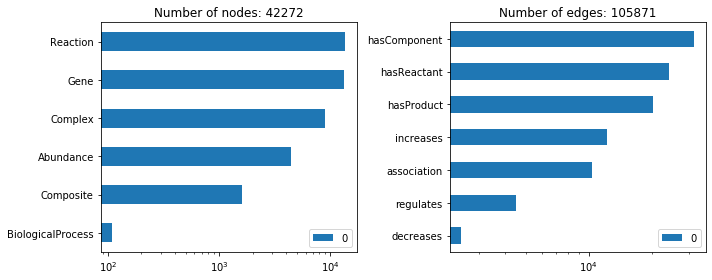

In [3]:
GRAPH_PATH = os.path.join(DEFAULT_DIFFUPATH_DIR, 'pickles', 'universe', 'pathme_universe_non_flatten_collapsed_names_no_isolates_16_03_2020.pickle')

pathme_universe_graph_no_flatten = pybel.from_pickle(GRAPH_PATH)
pathme_universe_graph_no_flatten.summarize()

nx.number_of_isolates(pathme_universe_graph_no_flatten)
pathme_universe_graph_no_flatten.remove_nodes_from({
    node
    for node in nx.isolates(pathme_universe_graph_no_flatten)
})

plot_summary(pathme_universe_graph_no_flatten, plt, figsize=(10, 4))
plt.show()

## 2. Load/import preprocessed datasets mapping 

##### Dataset 1

In [6]:
MAPPING_PATH_DATASET_1 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_1_mapping.json')

dataset1_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET_1)

In [7]:
dataset1_mapping_by_database = reduce_dict_dimension(dataset1_mapping_by_database_and_entity)

dataset1_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset1_mapping_by_database.items() for entity, entity_value in entity_set.items()}


In [8]:
dataset1_mapping_kegg = dataset1_mapping_by_database['kegg']

##### Dataset 2

In [9]:
MAPPING_PATH_DATASET2 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_2_mapping.json')

dataset2_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET2)

In [10]:
dataset2_mapping_by_database = reduce_dict_dimension(dataset2_mapping_by_database_and_entity)

dataset2_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset2_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [11]:
dataset2_mapping_kegg = dataset2_mapping_by_database['kegg']

##### Dataset 3

In [12]:
MAPPING_PATH_DATASET3 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_3_mapping.json')

dataset3_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET3)

In [13]:
dataset3_mapping_by_database = reduce_dict_dimension(dataset3_mapping_by_database_and_entity)

dataset3_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset3_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [14]:
dataset3_mapping_kegg = dataset3_mapping_by_database['kegg']

## 3. Evaluation: random cross-validation by method

In [6]:
from diffupath.views import show_sb_box_plot, preprocess_for_sb_boxplot, fdr_barchart_three_plot, preprocess_for_sb_ttest

from diffupath.cross_validation import cross_validation_by_method, get_p_values, get_wilcoxon_test

from collections import defaultdict

In [17]:
metrics_by_method['auroc']['Dataset 1'], metrics_by_method['auprc']['Dataset 1'] = cross_validation_by_method(dataset1_mapping_kegg, 
                                                                                                              kegg_pathme_graph_no_flatten, 
                                                                                                              kernel_kegg, 
                                                                                                              k = 3)

100%|██████████| 3/3 [00:41<00:00, 13.93s/it]


In [18]:
metrics_by_method['auroc']['Dataset 2'], metrics_by_method['auprc']['Dataset 2'] = cross_validation_by_method(dataset2_mapping_kegg, 
                                                                                                               kegg_pathme_graph_no_flatten, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:40<00:00, 13.42s/it]


In [19]:
metrics_by_method['auroc']['Dataset 3'], metrics_by_method['auprc']['Dataset 3'] =  cross_validation_by_method(dataset3_mapping_kegg, 
                                                                                                               kegg_pathme_graph_no_flatten, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:41<00:00, 13.77s/it]


In [13]:
metrics_by_db =  {"auroc": {"Dataset 1": {"PathMe": {"kegg": [0.7262178448809684, 0.6818085944514837, 0.6925845855720072, 0.6953299209963283, 0.7139898539230132, 0.7182833064115621, 0.6550684058539008, 0.6871628834319186, 0.7019152824710866, 0.6876441766362791, 0.6964827877485927, 0.6967958471406542, 0.7088284891515781, 0.6958797303178624, 0.667673061277547, 0.6905927271529134, 0.7113017338473009, 0.6780672848670324, 0.7074330890492302, 0.710395480941897, 0.7019806460116179, 0.6996919752321737, 0.7189663301968656, 0.6732889385788766, 0.7165044886435732, 0.694887137991238, 0.6648633481887852, 0.7241828008277411, 0.6560551495095003, 0.7028111395276782, 0.6767292576660298, 0.647159867230111, 0.6661456623936706, 0.6559095877625802, 0.6428437086457333, 0.6997191410212205, 0.6903233570647151, 0.6820242142950999, 0.6919429156140293, 0.6790885018886706, 0.6685224837587589, 0.6901209769712072, 0.6973791136467056, 0.672076881566908, 0.6864938719700812, 0.6595335979286797, 0.6846300475944549, 0.6648868893336395, 0.6905389924641574, 0.6808997708095419, 0.6952325529478725, 0.7202684122674629, 0.6851849723093311, 0.6874116857611624, 0.7032925869326958, 0.7060169877155194, 0.6715141916021732, 0.6906799611382224, 0.7299100048830602, 0.68896079691007, 0.7003267001800983, 0.6970446712340095, 0.6943226874268728, 0.7229144238179246, 0.6977410983940692, 0.7018381536802715, 0.7150538320542876, 0.6944638942694354, 0.7216626232835441, 0.6973401329933504, 0.7029854068036698, 0.7203363012037446, 0.6900698734078016, 0.6966224919758248, 0.6775561833961378, 0.7421685762143914, 0.7034165127273866, 0.6678675487033491, 0.6822785137287646, 0.6973898524393845, 0.6966615065002238, 0.6826068341596292, 0.7373902858671892, 0.6903584958827766, 0.7035789446723906, 0.7047622440860921, 0.6868402604637498, 0.6959855487089202, 0.6675964577466451, 0.7003770976786449, 0.6849650237920296, 0.7068387991891238, 0.6704240179903783, 0.7047264329711622, 0.7014092966125627, 0.7105656034748891, 0.678299079936707, 0.710623467978311, 0.7016546622542339, 0.7164821365575109], "reactome": [0.6529653467439468, 0.6416952416400055, 0.68342236349512, 0.7219202572196157, 0.7057515855648007, 0.7059170041172892, 0.6616869054171106, 0.6885999303014462, 0.6868430691807873, 0.6942060814824376, 0.642290664112009, 0.679233268042331, 0.6591299995554418, 0.7325379461970192, 0.6610532046254958, 0.6613132067446661, 0.679485016947005, 0.6624754473168372, 0.6604407034666677, 0.7062803174656707, 0.6719085112627061, 0.6855470184715988, 0.6656484404167939, 0.6618959546397762, 0.6345981109023691, 0.6837116476519682, 0.6635274213221366, 0.6924117930747057, 0.6766995522145569, 0.689687621351944, 0.6885932061477325, 0.690845978603498, 0.6519052870524398, 0.6726658393795807, 0.6923178520854543, 0.6827092223916016, 0.682271284339824, 0.6263845461904364, 0.6837503181427926, 0.680218927310065, 0.6835316263684048, 0.6196030745211073, 0.6688326433212026, 0.6866200883239231, 0.684215707617233, 0.6713285905101527, 0.7067505510852222, 0.6915775218135634, 0.7395392851581538, 0.6527236953272897, 0.6745584632312291, 0.6948826947388744, 0.6645487646277365, 0.6666398080232645, 0.6527568665147374, 0.6838605917722097, 0.6735795983541101, 0.7033730272494993, 0.6731640828939283, 0.6716921400360374, 0.6829467542680026, 0.6424441334750766, 0.6709657076798162, 0.6978805500457828, 0.6899023634595045, 0.6668887292025079, 0.6874469808035992, 0.6761698258241133, 0.6478381332184727, 0.707169744580654, 0.6620382409227741, 0.6390307084328488, 0.6964377104014703, 0.709297831605837, 0.6748010888897649, 0.6863407034376858, 0.7201470211236625, 0.6758433463758149, 0.6569159561694482, 0.7444307419585091, 0.6691545220087947, 0.6770962966190985, 0.6733396176239214, 0.680391264514449, 0.6509540956629175, 0.6953464370539344, 0.6825415491991088, 0.6655848012761769, 0.6682857206183648, 0.6946840376198116, 0.6350008492916556, 0.672330141065105, 0.7174822231371021, 0.6932951205278761, 0.6700509461838264, 0.667714308767779, 0.7024158070487365, 0.6598762375785391, 0.6585409985809489, 0.6768796957330848], "wikipathways": [0.6964499435059772, 0.7358367724491248, 0.7136153977238788, 0.7244244505858709, 0.729105804799393, 0.688880443246922, 0.7434862199553435, 0.6999392049919327, 0.734021241850004, 0.7184927770002609, 0.7242341039238276, 0.7255548130342413, 0.7867849717732328, 0.7249103710279265, 0.6948087626094931, 0.7010190630204609, 0.6537635569782181, 0.695438249059229, 0.7235924293984125, 0.6308084540779341, 0.696054912743358, 0.7047527574598507, 0.6974619510617613, 0.741083034126368, 0.6834235377812495, 0.7771307315921168, 0.6869847599215316, 0.6702754238222053, 0.7139469652290722, 0.7152376306283585, 0.7476892378803848, 0.7325693968286824, 0.7201811528500421, 0.743927527230649, 0.6984598237088278, 0.7344136757158608, 0.6826010164217635, 0.7421683672573057, 0.6734892370161255, 0.7027959628255718, 0.7198851640916692, 0.7142427728823478, 0.6929909004745203, 0.7306967177233188, 0.7050898795542797, 0.7106872279317282, 0.7413642134757672, 0.6815585411561833, 0.7469712621263707, 0.7532840860576736, 0.7602590835863399, 0.6842134427388619, 0.7021155305517855, 0.6746287042968657, 0.6923404101977524, 0.684044042746532, 0.7088619044132132, 0.7150584919148013, 0.7171838272208313, 0.7102768244632736, 0.8206644224234665, 0.6815520627010087, 0.7727319202898876, 0.7176007629270122, 0.7559465217538628, 0.6955369068933737, 0.7339806550748659, 0.7232323871162691, 0.736362525830075, 0.7268236177563271, 0.7190871818379847, 0.7535876789810396, 0.7469247549772206, 0.6959950319369737, 0.7594168165215553, 0.683056771849798, 0.7266169063836352, 0.7335851664639579, 0.7091149478406482, 0.7086246974661684, 0.7177070401316799, 0.6954078176193106, 0.7327293855384542, 0.7325882486931798, 0.7383744124570955, 0.6472503091982981, 0.7720110497682565, 0.7229136749593559, 0.7614641023816822, 0.7882035637307097, 0.7600705613707135, 0.7534490115046474, 0.6793595613648685, 0.7030251901160463, 0.7236331286730037, 0.6605669755592659, 0.7587518035618428, 0.7188599385055909, 0.7711520235833395, 0.7117790009148821]}, "subgraph": {"kegg": [0.6673834429845841, 0.6559332991967559, 0.6501321313744898, 0.6572617671009235, 0.641725891381477, 0.6665602015474258, 0.6479492240215925, 0.6691417890287643, 0.6335698983898996, 0.649263218872355, 0.6482429786043569, 0.6585179352995268, 0.6501253887146003, 0.6617629395107681, 0.6830362768295928, 0.6427921090079601, 0.6465782813016789, 0.6550026958330124, 0.673609134190047, 0.6474579772364315, 0.6515227395249501, 0.6628134974846757, 0.6324418149510412, 0.6518550149255544, 0.6534707832103781, 0.6653296488610908, 0.6458179824561403, 0.6545675167152198, 0.6481025398876683, 0.6623069353527575, 0.6687100592854942, 0.6547334610527183, 0.6588413562683069, 0.6602719298245614, 0.6747225002566472, 0.6592528728041849, 0.6554815274726441, 0.6631303926336768, 0.6557403979009471, 0.6585678982656411, 0.6288019725689629, 0.6713995915472497, 0.6661976296594762, 0.6716042786919656, 0.6631141887383225, 0.6710624133148406, 0.6511707661037822, 0.6491489873820656, 0.6688076669980259, 0.6603594658269799, 0.6500562167308062, 0.662439434697754, 0.6363186614137573, 0.6565239133779779, 0.6469500005206984, 0.6311535633145607, 0.6507963709240927, 0.6531531150698967, 0.6380501012145748, 0.6642355204245638, 0.6648750771230377, 0.6528382922295497, 0.648681342780027, 0.6863379889085894, 0.674799820268531, 0.6601361920242966, 0.661072157445022, 0.665625258995276, 0.6278146395174083, 0.6379411457730066, 0.6469265438731088, 0.6535635917231413, 0.6131103421760861, 0.6453356055977735, 0.6687404113091759, 0.6785308349667812, 0.6329846065270749, 0.6781905628615704, 0.641060667053433, 0.6580093045191273, 0.6605234903356434, 0.6361202304223935, 0.6607974136536832, 0.6760133214505426, 0.6675784633224454, 0.6806742149145419, 0.6451323369792101, 0.6416398843784736, 0.6638775454493366, 0.6434360865351161, 0.662686909546436, 0.642507103004258, 0.6561426794335204, 0.6549837801369314, 0.6578280592341649, 0.661318037352368, 0.6473365315405786, 0.6391259761512764, 0.6537329452259059, 0.6557774145236703], "reactome": [0.5675314154000535, 0.5505581738664388, 0.5760799928060802, 0.5708386109502063, 0.5189842003210035, 0.5720991771678952, 0.5733020596277301, 0.5860952433630429, 0.5550128150776446, 0.5581697529396511, 0.6061649002443615, 0.5488541723569265, 0.5628181973027748, 0.5955548427864237, 0.5843937102778213, 0.5765241593382229, 0.5313311677510337, 0.56598128782478, 0.5577830215371382, 0.5636726669858076, 0.5837749835989968, 0.5238334901918833, 0.594752069159171, 0.5717779358724697, 0.6176514045383901, 0.5992811522689634, 0.5387336316236877, 0.564475859190811, 0.5864953759472434, 0.5997328533749902, 0.5638374562180205, 0.5574899419070329, 0.5816827782124739, 0.5773573519381288, 0.594386265791597, 0.5376260137418337, 0.5265358531177229, 0.5626652018766933, 0.585602186991324, 0.5567473435868533, 0.5674965350279599, 0.5426047668086132, 0.5507157634965255, 0.5657559974724173, 0.5277246376127278, 0.5626354795021824, 0.5558874368204458, 0.5801944380700951, 0.5635097596877137, 0.5837865518391714, 0.5503274442956552, 0.5713001659936663, 0.5883328378128039, 0.5708026481684422, 0.5141288864297234, 0.5932188164285547, 0.5525513341414117, 0.5500372942055737, 0.5449251518866725, 0.5370535543880182, 0.5511362615356638, 0.5905949168725554, 0.5818983723811668, 0.5969427566818517, 0.5600933047534989, 0.5791203103767306, 0.5542967848498662, 0.5787761531596954, 0.534953113488758, 0.5660956306265464, 0.5470987797088042, 0.5429864718553477, 0.5527614680171611, 0.5922471228373043, 0.5868724966414967, 0.5547449647225546, 0.5762600514818932, 0.559315409492881, 0.5333181687363808, 0.576884595927546, 0.5466891347884713, 0.5828626828838357, 0.6192069238356402, 0.5639443169212773, 0.5937707891700641, 0.5959391206731794, 0.5504045573362714, 0.5700973158153001, 0.5750643398554557, 0.5697092687565805, 0.6138347601163354, 0.5718200590316714, 0.5775136117463862, 0.5376915500198172, 0.5402899912101011, 0.5742782843441941, 0.5939068204870026, 0.5791884865065176, 0.5483693344583268, 0.5166258184738097], "wikipathways": [0.6423734669200207, 0.6428905726997516, 0.6702004089419539, 0.6452861545234427, 0.6684131827816929, 0.646004842615012, 0.6686671802773496, 0.6353383124684917, 0.6782368478978649, 0.6730382459030627, 0.6706358800773695, 0.6352689917474836, 0.641330108827086, 0.657852248517303, 0.6451716611318599, 0.6458517941098741, 0.6713588937658087, 0.6469426517631305, 0.6494351356020038, 0.6391454680721379, 0.6682816127563322, 0.6775667015654714, 0.6561520746026352, 0.672729468068758, 0.654125027514858, 0.6444976815764076, 0.6297786472338747, 0.636321211125412, 0.6435417125247634, 0.6688695652173913, 0.6538414929714009, 0.6308408868928627, 0.653321588270863, 0.6692258589897938, 0.6882166390171427, 0.6569519097485251, 0.6291036842512866, 0.6624482822550932, 0.6228286006238571, 0.6803274575132168, 0.6569645608628659, 0.6393539511336122, 0.6565705480959718, 0.6730180036476799, 0.6545946636726274, 0.6588335569734645, 0.6744051154602434, 0.6574376440373839, 0.6574721739065521, 0.6560799351256701, 0.6810029473364987, 0.6207153863086067, 0.6443260733900538, 0.6743014397452914, 0.6515959211137331, 0.6387077733860343, 0.6273943655659531, 0.664742327402545, 0.6593882388963708, 0.6598477107310603, 0.6803695348998537, 0.6405089728552099, 0.6429945744147086, 0.6516435858262284, 0.6379403200335917, 0.659342988648948, 0.636024154589372, 0.6571316540149168, 0.6358380026605727, 0.6604260844018612, 0.6507512864981662, 0.6497742616426126, 0.6559509849328433, 0.6283918873679513, 0.597694224607717, 0.6564921978464905, 0.6166200469890171, 0.6328758529605987, 0.6759292872252698, 0.6142367481812123, 0.6736472421505195, 0.6631830483100133, 0.6682456049280177, 0.6292714065595422, 0.6665081926052671, 0.6480440698100787, 0.6789251224897885, 0.6485339793185538, 0.6681446392125772, 0.6377945673682317, 0.6794262170793886, 0.6090845022789804, 0.6509199924070352, 0.6552611274255773, 0.6304710748987128, 0.6646497352574751, 0.6368183284930623, 0.6663550724637681, 0.6486773283676096, 0.6549472660283958]}}, "Dataset 2": {"PathMe": {"kegg": [0.9433933938375615, 0.9528779936577054, 0.9582522304524802, 0.9447149517228323, 0.9099846767322983, 0.9792233647292692, 0.9684231233434305, 0.9408782184778494, 0.9257575847216962, 0.9222795283510034, 0.9685895198315032, 0.9678314913858387, 0.9507525558500568, 0.9645316641423703, 0.9469439251230595, 0.9224059896819387, 0.9396483635460053, 0.9525858753786445, 0.9217551945285877, 0.929613546005301, 0.9598703438564937, 0.8785150333680425, 0.9559973731541083, 0.9641633732487694, 0.9787471010034079, 0.956739131720939, 0.9637847287959106, 0.9283163929382809, 0.9394819670579326, 0.9240603405433548, 0.9641596755490344, 0.9409706609712231, 0.9809191298277168, 0.9749576983150321, 0.9725364445285877, 0.9709634430613404, 0.9421768506247633, 0.9300069812570996, 0.9519949829609997, 0.9598385436387732, 0.9327469767606967, 0.9424563967247255, 0.9490826746497539, 0.969611564038243, 0.9404936577054146, 0.9496210597311624, 0.9318085005679667, 0.944802956976524, 0.9269630348352896, 0.9378150440174177, 0.9516192966679288, 0.9096119485990155, 0.9658731896062098, 0.9536892689795532, 0.9651380868989019, 0.9136742415278304, 0.9482995018458917, 0.8707054915278303, 0.9336839738735327, 0.9237556500851949, 0.9473247881957592, 0.9434044869367664, 0.9323742486274138, 0.9669921135460053, 0.958988072699735, 0.9162116030859523, 0.9629453509560773, 0.9728270837277546, 0.9504404699924272, 0.9272004271582734, 0.9542557565789473, 0.9376479079893979, 0.9621828852707308, 0.9165118563044301, 0.911099902972359, 0.9606298513820523, 0.957101506294964, 0.9653895304808785, 0.9423913172093904, 0.9597586733244983, 0.9239412746118895, 0.9199041260412723, 0.961878194812571, 0.9471132797709201, 0.9655004614729269, 0.9151392701628172, 0.9613161444528587, 0.9086690351666035, 0.9367848648712609, 0.9484814286728511, 0.9425932116149186, 0.9499716016660356, 0.9205209023570617, 0.9673433950208254, 0.9452067457875805, 0.8919073622680803, 0.9348827681276032, 0.9550418875425974, 0.9219578284740628, 0.9294501076770163], "reactome": [0.8452073918084376, 0.8253844313518259, 0.7786453609277355, 0.7493552279771905, 0.7544739685619415, 0.7147044827758454, 0.8477207539034668, 0.81064077588224, 0.7946404393651394, 0.7759689983621081, 0.8227816819019526, 0.8204970462737303, 0.7049638901376828, 0.8021621223712888, 0.7779302620889825, 0.8592122870806354, 0.7705978699519149, 0.8677435213885537, 0.7621218454808119, 0.7747517529123189, 0.7045853083995194, 0.7792500400928577, 0.6929570651502365, 0.817187085104649, 0.8429490465786988, 0.822395213044244, 0.8381300165366607, 0.7708108221796317, 0.8480362386852698, 0.7194998514592486, 0.7879600491104644, 0.7983184661129907, 0.8775209205845933, 0.7766735810414678, 0.6546098899221016, 0.8268593227067542, 0.7349139120901655, 0.8330980342669054, 0.9133100400402768, 0.8481492873987491, 0.7422463042272331, 0.723574863224202, 0.7536326758104672, 0.9273990645876219, 0.7463660096696086, 0.8484384817820683, 0.8139375918520797, 0.7555545039396162, 0.7488951460037281, 0.8164272925884737, 0.7464738003033912, 0.8828736457158481, 0.9026571705747344, 0.7309756103973268, 0.8181414265696025, 0.8054010994644646, 0.9033643822939424, 0.7863484476834215, 0.7626949761677537, 0.7655080488054957, 0.8951302294888883, 0.7018879135151052, 0.7444310363412179, 0.9034853181269669, 0.7297373326287506, 0.883344243848704, 0.7447412630433239, 0.7929000149855271, 0.8062318760565454, 0.7387786006672503, 0.8140979632828295, 0.7778908264912571, 0.8097994831307659, 0.912655409118036, 0.7987706609669083, 0.7294639124845215, 0.8368049804530887, 0.7937728562151816, 0.9017370066278094, 0.7824679848672466, 0.7750251730565481, 0.7745624620432372, 0.8114031974382635, 0.7695278507336336, 0.820707369461599, 0.7569768144975774, 0.8990921925403623, 0.7695357378531786, 0.7150699193147669, 0.8323724192687589, 0.7417704480146806, 0.8068470713810609, 0.8623645058588153, 0.698028483017717, 0.857258910473306, 0.8181756040876311, 0.8174342148503946, 0.5965449158312892, 0.7705479181947961, 0.837793499436071], "wikipathways": [0.9726483260947661, 0.9456042644088359, 0.9522684787822858, 0.9556393063882238, 0.9209135437573004, 0.9453977555063663, 0.9591241441174003, 0.959078970294985, 0.9438726012162514, 0.9639771033254386, 0.9247382607217917, 0.9203757601571189, 0.9459527481817537, 0.9566546418253666, 0.9348937662276201, 0.9162692445861325, 0.9406717132279708, 0.9442834678867901, 0.9187495025501698, 0.9605180792090708, 0.9501517625319712, 0.9338483149088671, 0.9501947852199858, 0.9292233759473059, 0.9278122317804294, 0.969333427983247, 0.9796717799131371, 0.9673522332001782, 0.9040228364427981, 0.9182052655467862, 0.908910213801248, 0.9519802267725885, 0.949925893419895, 0.9585971161892224, 0.9597372174216072, 0.9129844623562235, 0.9256309814980931, 0.9477274340623528, 0.9383334301343814, 0.9852668804894261, 0.9518791234557544, 0.910403101075352, 0.9320843847002717, 0.9180052100475186, 0.9625724125617644, 0.9178051545482511, 0.9598813434264559, 0.9420118699596232, 0.8892703567226177, 0.9179923032411142, 0.9801622385565028, 0.9497903719526493, 0.9854949007359031, 0.9827263907621684, 0.9618754450159291, 0.9334869243295452, 0.9544497290646222, 0.9426400012046353, 0.9559275583979211, 0.9431175530415964, 0.9475790057887027, 0.951552151026844, 0.91774277165063, 0.9462990808202706, 0.9416655373211064, 0.8688345799157184, 0.9385786594560641, 0.9430229031279646, 0.9361457264488428, 0.937102981257166, 0.9676082181938646, 0.955308031690512, 0.9453719418935576, 0.9116443056245711, 0.9074237799303463, 0.9392153952386791, 0.9056899656033609, 0.9247382607217917, 0.9319230496202172, 0.9289093103247997, 0.9525115569695679, 0.9310088174999086, 0.9644266904151905, 0.9351045773988913, 0.9577065465473217, 0.9390196420082131, 0.942618489860628, 0.9307162632214099, 0.9190377545598671, 0.9561340673003909, 0.9017254249028226, 0.9422506458781038, 0.9439027170978616, 0.9347410356851685, 0.9293223281297391, 0.9212405161862108, 0.9816787883090148, 0.9353412021829712, 0.9309012607798722, 0.9629875815011046]}, "subgraph": {"kegg": [0.9302480699364215, 0.8942391386618225, 0.8790162352406903, 0.8656051316984559, 0.8496631849833485, 0.9327221465334544, 0.8637341999697246, 0.8478206365425371, 0.8511107326672722, 0.8582373032092038, 0.8905682334241598, 0.8724384082652133, 0.8928838366636391, 0.74223007493188, 0.7700078527096579, 0.9079056917953375, 0.8245368793521042, 0.9365751778686043, 0.8973896836209506, 0.8710854715410232, 0.8431042801998183, 0.914738968362095, 0.8747847600666061, 0.9279703110808356, 0.8294117090523767, 0.874860448834393, 0.8949014153799576, 0.9169978050257341, 0.8949368944898577, 0.8543629844081138, 0.8439368566454737, 0.913170791704511, 0.8149173100211928, 0.8800072850438995, 0.9230221578867696, 0.8283071260974872, 0.8677196866485013, 0.8673459733575537, 0.915978371934605, 0.8584501778686044, 0.8196691454738118, 0.9478102293369665, 0.820967680896155, 0.7764011883136542, 0.9170782243415078, 0.7739176506206479, 0.9069217378141083, 0.8834582198001817, 0.8511840561610657, 0.8376357667272177, 0.8850713366636391, 0.8674476801392673, 0.904549367998789, 0.7892919315773539, 0.8654206403269754, 0.8664897441719648, 0.8635780918861641, 0.9425616863457463, 0.8713858613381773, 0.8676936686345746, 0.93359020208901, 0.9395081176203451, 0.8884489479261277, 0.8553138245534363, 0.8716838858613383, 0.8862728958522555, 0.8903009574629126, 0.7678105131698456, 0.8667002535573721, 0.9221233537693005, 0.8349819293066909, 0.8661917196488041, 0.9344606229185589, 0.8603542234332424, 0.8420162541628822, 0.9236442249470178, 0.8715325083257645, 0.9241574894035725, 0.8984493263699668, 0.9246778496821072, 0.8434094005449592, 0.867688938086588, 0.8775899750227066, 0.8350457917045111, 0.8569695163487738, 0.9232042839842567, 0.8629867733878293, 0.8316823720859825, 0.8906817665758401, 0.8739971238268242, 0.918731550862852, 0.8763789547381169, 0.833617166212534, 0.8744015856796852, 0.9080807220708447, 0.9224450310323948, 0.8752105093854072, 0.8764191643960036, 0.8433597297910991, 0.9297253443838934], "reactome": [0.6441867704863924, 0.6432790980286254, 0.616913463558076, 0.601385513247517, 0.7407769976295496, 0.5212252828037327, 0.46024619677738765, 0.7413621088006721, 0.7686110360968583, 0.6252325441833948, 0.5741647162960962, 0.7330505296006242, 0.5201675818405497, 0.742976790590212, 0.7504969694241905, 0.7224022564287215, 0.5527781528490412, 0.6431065652473971, 0.7550615867014732, 0.6416381612506376, 0.6981351456776788, 0.6586307648453206, 0.6581319200648122, 0.6504710895070063, 0.5836127614246707, 0.5826919614726798, 0.6973868785069163, 0.5093392744621478, 0.7723617487322592, 0.7958787169562216, 0.6587751672817835, 0.6457508176553546, 0.7779034266510636, 0.601848726257989, 0.6890284153989258, 0.6528209109730849, 0.6423095388123743, 0.679413463558076, 0.6509230503795721, 0.6033865184385032, 0.6430240495694182, 0.5068619287664656, 0.5468445254598373, 0.7637332343145198, 0.6541130314759804, 0.6564365979536112, 0.518869835268701, 0.6246042998169652, 0.6200453086086356, 0.6751432772226723, 0.7721029495604164, 0.6242592342545084, 0.7178545173582981, 0.708905317010232, 0.7738489062921956, 0.5830032706214181, 0.6497959612326343, 0.5955437783178803, 0.6696072253728209, 0.6543380742341045, 0.5025036006841299, 0.5816436372910853, 0.8629414588771867, 0.6823296426321, 0.5393543523269422, 0.5963501815344915, 0.6164296216281093, 0.5793181954571369, 0.6400253548174153, 0.5495075314309719, 0.6483275572358748, 0.5533388843880338, 0.6714582020583911, 0.7705651573799022, 0.8308072283733909, 0.7708895940228643, 0.5191736429921685, 0.5945910973084886, 0.6800904671887659, 0.7231223932547184, 0.6907874996249288, 0.4821147267980916, 0.6980957631950071, 0.6461783988957903, 0.6523689501005191, 0.6499741200828157, 0.7248514717796382, 0.6477930806853303, 0.7961262639901582, 0.6984577069643232, 0.7126072703813724, 0.6807787229573619, 0.6249362378851981, 0.8357112851441775, 0.9224240105620067, 0.6750120022804333, 0.5971603354637381, 0.7578614936838, 0.7454616377111651, 0.6564403486662466], "wikipathways": [0.735194221715858, 0.7443195253552313, 0.7386766697478451, 0.8120337926438659, 0.8274146047851416, 0.739654764719792, 0.8076054945291171, 0.7435993894967647, 0.7996302586040113, 0.5416603968271029, 0.6945764096390722, 0.7518648294245363, 0.7096455211848922, 0.7848083578752769, 0.8363894322749843, 0.8011780132848942, 0.8319611341602355, 0.6571615898880027, 0.7617532621079559, 0.7826479502998775, 0.45713579397665466, 0.8574131000236462, 0.794965497968572, 0.7491670070293859, 0.5712397085062018, 0.7884950235387692, 0.7414282336249705, 0.7986414153356693, 0.8962144500096735, 0.7527246931361379, 0.7328403448053483, 0.7915367914185601, 0.651282271759926, 0.8089060383929148, 0.772297340871472, 0.8617446634708398, 0.7563898622068402, 0.7021539585975624, 0.8258023603258884, 0.7295513661084718, 0.7238547690191105, 0.8224703884434317, 0.7986629119284594, 0.7040241621702961, 0.6742513811560867, 0.8538661622132891, 0.7373438809948624, 0.886906425331585, 0.6687375051054407, 0.6319890797308626, 0.6466390077172768, 0.6306777875706701, 0.7377308196650831, 0.8129473978374426, 0.4985704765794622, 0.7539714955179604, 0.7978567896988327, 0.7775962509942174, 0.8008340678002537, 0.861819901545605, 0.6725531503256733, 0.7436961241643201, 0.7301962638921732, 0.6540660805262366, 0.8143554246651906, 0.7492852382897311, 0.7439218383886154, 0.6890410369956362, 0.7685891786151895, 0.7438251037210603, 0.7136331391474451, 0.8574560932092263, 0.7008211698445797, 0.7279176250564285, 0.5841484124766224, 0.7660633289623595, 0.7710505384896493, 0.8973322728347557, 0.7159225262795846, 0.6735204970012253, 0.6738859390786559, 0.497990068574131, 0.7067434811582364, 0.5983469120144457, 0.557288419785464, 0.8481265719383477, 0.7787033255229046, 0.6204131645134247, 0.7282830671338594, 0.6978653883359487, 0.5875771190266342, 0.7074743653130979, 0.7071734130140372, 0.7399772136116427, 0.7394397987918915, 0.6705217223070143, 0.7302285087813581, 0.7535845568477397, 0.5979599733442249, 0.7805090393172682]}}, "Dataset 3": {"PathMe": {"kegg": [0.7172108990893156, 0.6951436835485204, 0.8092950614070376, 0.8426771174824844, 0.7714005391659856, 0.7666696397854258, 0.7853493202176323, 0.7599692009166914, 0.8919247060708052, 0.7504800980037025, 0.7615746850466082, 0.7988812578840738, 0.9301031914912982, 0.7823549648959622, 0.7080057593557676, 0.8204988650574205, 0.8326564937464391, 0.7437559955366813, 0.7708489952982251, 0.8284006866084057, 0.8626783188651667, 0.7660489253995963, 0.7789546878498345, 0.8537862667397205, 0.9338456805741882, 0.7828792046118533, 0.6938421856427489, 0.8794576303272675, 0.7390833450134429, 0.8490371645912478, 0.8085960751191825, 0.8329113324972196, 0.8062970655317847, 0.7775021069703859, 0.7148135945551881, 0.7010668642273744, 0.8802640129458086, 0.8673473288348226, 0.8324398808082758, 0.8940435082558655, 0.7251109003635093, 0.8925071946440176, 0.854363294482559, 0.86669384946675, 0.7579195692497002, 0.7701354467960397, 0.7606081180704338, 0.8176082655128538, 0.7919296208181417, 0.7775639963812897, 0.823418589030648, 0.7197137796773379, 0.8828979534628035, 0.8047844155182238, 0.7192750929706371, 0.6565119492069964, 0.7689231424530414, 0.7920697821310709, 0.812669854578087, 0.7975906816390501, 0.7141855990621934, 0.7920333765952451, 0.8291105945570083, 0.742827654373124, 0.9453170649128907, 0.8986542693682001, 0.8765670307827008, 0.8094588863182536, 0.8051466505996903, 0.7918458880857424, 0.8657072594458713, 0.8031024797630728, 0.8915915954179994, 0.8902591528067758, 0.7864669701674837, 0.8212287960507274, 0.7656575658894691, 0.766462128231219, 0.902504154781776, 0.7373049345883534, 0.8328985905596805, 0.8306760325975168, 0.8744063622314409, 0.7988594145625785, 0.8181725513181535, 0.773022405787024, 0.7968989764583603, 0.8122202462106388, 0.725720693088591, 0.8793356717822512, 0.9164765994317097, 0.8554008522535937, 0.8152328043002219, 0.6850793731694842, 0.774591484381115, 0.7758365537063566, 0.8380663563701496, 0.8045987472855123, 0.7913798972271724, 0.825635686162438], "reactome": [0.8472681419579049, 0.8277037991115799, 0.8460984564207623, 0.8141121207818638, 0.8120617904978262, 0.9042066421911659, 0.7976029897973673, 0.6485720370783554, 0.9191294294233382, 0.7919066888433635, 0.7222909609676612, 0.9192181700168354, 0.8194948716388444, 0.8270902212936857, 0.8573178028843228, 0.7804126691142168, 0.8070120281535872, 0.9017066929000765, 0.8840397084575703, 0.7330742108003219, 0.7655329844560286, 0.8516451660885851, 0.8493953807563065, 0.7853779166075063, 0.907857683752189, 0.8730891192200294, 0.8330256992758768, 0.8661436887689905, 0.7968694008911246, 0.7824004584085515, 0.7602660189448489, 0.8117414792127272, 0.7729381756962334, 0.8125832471281853, 0.7340883890117171, 0.7738222010371663, 0.7703883626430836, 0.8016816765041953, 0.7080417570975572, 0.7955949169388046, 0.8892517393156325, 0.848113290467401, 0.9143594112357424, 0.8463427043400067, 0.8541129997363137, 0.8874591793269913, 0.8334558798672103, 0.710690452526318, 0.9242391973117516, 0.8569290345699547, 0.8304048937479294, 0.8116180875303409, 0.6799929683644009, 0.8611159002859983, 0.8204608763851984, 0.881475527879759, 0.9108520449213336, 0.8205563781667715, 0.896397469963422, 0.7524450146379722, 0.8180462870935681, 0.793638398139321, 0.8533878623151661, 0.7635722399139977, 0.7803264639662482, 0.6888475892983915, 0.757455055002265, 0.8611556222659447, 0.7199549704874141, 0.8190858197602483, 0.7472490416015902, 0.7278376706354841, 0.8012675537345423, 0.8793854756157752, 0.7714642366956722, 0.8873983286343077, 0.7160039012055199, 0.7349495953428937, 0.8934597337444136, 0.8029215093676261, 0.8275263179245858, 0.8158472106718593, 0.7996803648337085, 0.9180924322021865, 0.7557571516466873, 0.8237679425028567, 0.8528959858826393, 0.7446468293408518, 0.8678999073717234, 0.8962673170929596, 0.8755561077192484, 0.8519392777698898, 0.8351715313414874, 0.7559380134277195, 0.8886711222896088, 0.8850200807285857, 0.8280486197034542, 0.8620844404778807, 0.8514169759910211, 0.8097486190273354], "wikipathways": [0.8496715014709478, 0.8753388175104571, 0.8910341854051482, 0.8642574145496323, 0.8884708715530001, 0.8459750714441578, 0.711762587185534, 0.8079512681173708, 0.797067043145173, 0.9014478122444902, 0.8370652553980761, 0.8862151553631098, 0.858591833676423, 0.8975831236674054, 0.9295022964663076, 0.8183096851198974, 0.8355009766883036, 0.8635843803484529, 0.8534967544503071, 0.8639787363257065, 0.8686926047738106, 0.9002962927909098, 0.8531155436722954, 0.8810832695791171, 0.895164407006917, 0.8417896400055735, 0.8767611280684181, 0.8547849839760021, 0.854887516530088, 0.8762642395370787, 0.8773579201139952, 0.9659933695615024, 0.834767474570612, 0.8776839210551914, 0.8298590571737297, 0.8862756232796221, 0.9157287567007653, 0.8752678334345514, 0.8857445572302539, 0.9158707248525766, 0.9153843524806305, 0.9213470148567042, 0.8282684880654736, 0.8677146019502218, 0.8716423874836671, 0.9105258868408669, 0.8918886233558643, 0.8570354420861956, 0.8711428699124792, 0.9087933495807996, 0.8964132009348865, 0.8984480777775149, 0.8502078256000125, 0.8942310978607503, 0.9211813853462577, 0.8807204620800436, 0.8598406276043926, 0.8066262320337989, 0.9607195156256984, 0.8594594168263808, 0.8673149878932715, 0.8015942497640436, 0.8598774341622696, 0.8534599478924303, 0.893389805109276, 0.9005223902178685, 0.8727308099808868, 0.8872352228242724, 0.869602252561342, 0.84251525500372, 0.9049733546811369, 0.9269232083750694, 0.7910938646097059, 0.8611446313691776, 0.872452131756961, 0.9442617261749836, 0.86789337665991, 0.811818585734304, 0.8489642897517398, 0.7660995827713761, 0.8527290748145869, 0.9009614398725441, 0.8901850055341288, 0.81654559938165, 0.8882447741260414, 0.8716765650016957, 0.8538569329095321, 0.8459750714441578, 0.9131838461275558, 0.8285760857277313, 0.899420822521407, 0.8271327428509834, 0.8422050283016139, 0.9038665289049786, 0.8832469693743148, 0.819014267799257, 0.8775340657838351, 0.9171168897406978, 0.9164543716989119, 0.826606934881312]}, "subgraph": {"kegg": [0.7845571757036003, 0.7840827730725575, 0.685535085421578, 0.7622398789254634, 0.6666841293402019, 0.720876626211473, 0.6591286125905876, 0.8077476061585029, 0.7565033906691114, 0.7829622515207079, 0.715698943508251, 0.715550510783201, 0.6058849209814022, 0.627724904682907, 0.685575831659827, 0.6453389213888646, 0.6757006897756046, 0.7580779417328793, 0.730679006955965, 0.6732966617189091, 0.7485898891120231, 0.5941761983759715, 0.7170173753601676, 0.7232806542681685, 0.7090805902383654, 0.7186472248901307, 0.4874123228266247, 0.7733053930556769, 0.5903780668820396, 0.7327046770860619, 0.7500800372537035, 0.7587357024360429, 0.6464216071480544, 0.7349573619721179, 0.7441107133502141, 0.7907738874821736, 0.8119008120143194, 0.6232835647137578, 0.5257196076719346, 0.6788643441310864, 0.5508134695421869, 0.6121860356820629, 0.6242672953229139, 0.8110771559125702, 0.7902383654937571, 0.8365843010564917, 0.7825547891382171, 0.6694723362146744, 0.7797724031549231, 0.7270060246223697, 0.7155708839023254, 0.6400360895253063, 0.8159259582642103, 0.8220204313280364, 0.6791000902238133, 0.7303850519514539, 0.7360487790680753, 0.7380511656334585, 0.7799994179108822, 0.591839110567828, 0.658139061090253, 0.9256206525219011, 0.7777816583718968, 0.805524025728339, 0.7394569108530515, 0.7462993684333071, 0.5781018073867109, 0.7396431793707616, 0.730693559183911, 0.7513839168776739, 0.6636339823626998, 0.6705724846473995, 0.7114438720568119, 0.7500916790360604, 0.6063796967315696, 0.5801041939520941, 0.7330975872406066, 0.6396635524898862, 0.7910270962484356, 0.8257225181175237, 0.7998661195028959, 0.7786082249192351, 0.7786606129398411, 0.608254023691027, 0.7491807095666345, 0.6882447102651416, 0.7520940656014437, 0.6444454145929741, 0.7244390116126779, 0.6031549230187142, 0.7715678570389126, 0.7092115602898804, 0.6920457522046625, 0.7270147559591373, 0.7193253587124189, 0.7364940772432259, 0.7599726418114613, 0.8245292354259437, 0.5963241072208155, 0.7596641345790041], "reactome": [0.7466430814197451, 0.8145953610857894, 0.7299489227474643, 0.7617926234608094, 0.7089283905601134, 0.5986733901501449, 0.653773157191571, 0.8050225964993513, 0.723374957194465, 0.6678748679660256, 0.7849052008122199, 0.7294051115837807, 0.5760105723642642, 0.6008317537488002, 0.7755193336323691, 0.7216711763202192, 0.7768758470672783, 0.7111470436447647, 0.7120755017291025, 0.7685981006400332, 0.7280775371021497, 0.7355944302161257, 0.6802655631279151, 0.7517025750845259, 0.5354936261955405, 0.766916023980746, 0.7885937115654527, 0.6471979858488519, 0.632832207125735, 0.7050373071339343, 0.7867199143406983, 0.5637332214360473, 0.7712894232948928, 0.626864753801855, 0.7592616708386991, 0.6414668673100761, 0.6333398445978209, 0.9225967405092291, 0.7214866904930716, 0.765989977475848, 0.765885073770215, 0.6521043442192029, 0.626132839441864, 0.8604189878118775, 0.7911138120800838, 0.7760667621652125, 0.7827793935360025, 0.8935167098339386, 0.6138904564155248, 0.7831785099332957, 0.5537938967747537, 0.6126219656301698, 0.7585116696329093, 0.7108468020045048, 0.7018323180583892, 0.8538293469925193, 0.684189202876532, 0.7376237743147497, 0.721329937829482, 0.8928378502216241, 0.8587429401011899, 0.8527151972913141, 0.7213528478341605, 0.6418069000110933, 0.8031427703259972, 0.6442823863060874, 0.6975819092956741, 0.7689019596494527, 0.7733718221411932, 0.6985766858146074, 0.736619351478057, 0.8606601457558614, 0.7978867329368697, 0.6205464156694785, 0.7573854620345049, 0.6727691684391776, 0.6066858628390077, 0.7433295712694071, 0.8089534709862878, 0.757831604230875, 0.6653740600869134, 0.7073053975971022, 0.8759893504651937, 0.8418811766578402, 0.6970248344450715, 0.7685776022147945, 0.8006069945450073, 0.791350146865188, 0.775297468323904, 0.7319637973694492, 0.8879676655428707, 0.6458812634747001, 0.7678782441772414, 0.6928757120188296, 0.8134932692817833, 0.8092609473648671, 0.6688141781578427, 0.8032175292886323, 0.7937243468237087, 0.7684485827147631], "wikipathways": [0.6436224690774441, 0.722261614012973, 0.6852858530948817, 0.7004779537277764, 0.6848919351873736, 0.7570051734551853, 0.7305076288768086, 0.5997400141810447, 0.5796633314950498, 0.7905013261902886, 0.7460805168202946, 0.7191365319467423, 0.7317419049870006, 0.7441634496704219, 0.6126473909503927, 0.7266997557708973, 0.6305969169358439, 0.698311405236482, 0.6388560623965964, 0.6804144016386985, 0.7192678379159115, 0.6770660994248798, 0.6711967226030096, 0.6975498306152997, 0.6675201554662675, 0.7077654350166759, 0.8977389112109037, 0.5936342866146695, 0.56097849208225, 0.5786916673231965, 0.8725806875180545, 0.7036424275847579, 0.6381864019538328, 0.7671682554688936, 0.6990598492607474, 0.7435857034060769, 0.5931221933349089, 0.6179915438955854, 0.7192415767220779, 0.5386170855327084, 0.6890149426192914, 0.7979201134483573, 0.6903805246986527, 0.620341920743717, 0.6943328343706504, 0.5735313427348407, 0.5588513353817064, 0.4933033955723627, 0.676002521074608, 0.6527482339347146, 0.5917697418524646, 0.7443210168334252, 0.6248982378738936, 0.8496415347041676, 0.6413640064077313, 0.7611150502901862, 0.6389217153811813, 0.6723784763255338, 0.6895664276898028, 0.7090653641114524, 0.717337640169122, 0.8250216654849128, 0.6195540849287008, 0.75869902045747, 0.6917329761810972, 0.5488589511279182, 0.73024501693847, 0.6438456892250322, 0.708330050684104, 0.5286640930696709, 0.7508206623073085, 0.6362430736101262, 0.5339951154179469, 0.6941096142230625, 0.6059245253289214, 0.6410226108878909, 0.834042385566848, 0.7497045615693689, 0.6508836891725098, 0.41392893720948554, 0.5729535964704955, 0.6197116520917041, 0.7063210693558128, 0.7237847632553376, 0.6319099766275376, 0.6325665064733843, 0.7725780613986712, 0.7059796738359726, 0.7036030357940072, 0.749074292917356, 0.6477323459124451, 0.71918905433441, 0.6620709577457391, 0.7473410541243205, 0.6729693531867958, 0.7280653378502586, 0.8075842327792221, 0.806166128312193, 0.7440452742981696, 0.6711835920060926]}}}, "auprc": {"Dataset 1": {"PathMe": {"kegg": [0.015211767100934661, 0.014864637149855038, 0.013458331959433058, 0.015780305976430636, 0.016054336291448368, 0.017012436604889603, 0.015229606167018066, 0.01529195947311627, 0.016752328305689766, 0.014882524741504671, 0.015256528789084022, 0.015574278435381816, 0.016930306161165302, 0.015733269714659756, 0.014628643115541436, 0.016217123892175278, 0.017631616098573194, 0.015019439480238353, 0.014541882398751173, 0.01597245683717711, 0.015994428436946886, 0.015816768998162086, 0.017304402587433088, 0.015793651962990984, 0.01655535237556893, 0.015546755288456636, 0.014408492943150606, 0.016270510591878954, 0.013916768666718472, 0.015494938050459293, 0.014857925079117651, 0.014484380791961002, 0.014449534336441845, 0.014619440252594998, 0.013874933878907272, 0.016000175892388165, 0.014579975504409088, 0.014275196369359795, 0.01496966782931651, 0.016771871779290074, 0.015685927787787556, 0.016620264409345817, 0.015632768184684658, 0.015920628141527754, 0.014908822795630841, 0.014483253644434408, 0.014491788167492916, 0.01401726968812956, 0.015518860363211073, 0.015382694809276534, 0.01622171535549405, 0.015521189844377423, 0.01759266487681623, 0.014847325517124884, 0.017914272792560984, 0.015139150355740337, 0.015076719271470685, 0.013731132598753897, 0.016001232510601107, 0.015004251941824464, 0.016327802168764134, 0.016886534908569693, 0.014245561083589991, 0.016865866744018937, 0.015235558349995102, 0.015231792308118608, 0.015137861680134876, 0.01477805191313223, 0.016712049588257227, 0.015334968350021246, 0.016041259612840416, 0.017710367542075393, 0.015994308313899502, 0.01542236780366217, 0.015680829252491656, 0.017373094649988232, 0.016658763694200506, 0.015152425172723517, 0.014544287122207105, 0.014427185532737228, 0.014673910953705429, 0.013422704627040379, 0.01793462542511629, 0.015204455866173486, 0.01745876989786092, 0.01622328799701274, 0.015971278013060218, 0.015231821021819988, 0.01497475449300292, 0.01593010470357199, 0.014731501157204924, 0.015497516574163747, 0.01421305732603263, 0.014675012937412663, 0.0158043055179051, 0.017400875653792683, 0.014005211263164579, 0.015436628726402536, 0.016917657002664004, 0.015959234847024724], "reactome": [0.009770283588504881, 0.009499232681153736, 0.0108789821773611, 0.011353460350666037, 0.011248203174196593, 0.011087088009773555, 0.009993053114524912, 0.011056720646090517, 0.010998244850912147, 0.01071555099464033, 0.009556907069717053, 0.010267362059660437, 0.009789110769123973, 0.012299628669748689, 0.010242741307871095, 0.010144554819578058, 0.010374105401265214, 0.00976608948720847, 0.010604769411680672, 0.010430896043189909, 0.010073174897814882, 0.009606048217348196, 0.009816144481907528, 0.009329123585718264, 0.008919180132301738, 0.010283159055844784, 0.010093425259096196, 0.010290438952039169, 0.011174780555634502, 0.011229061682540594, 0.010378652572882289, 0.010740017580189058, 0.010009401472524953, 0.010629039832337163, 0.011391986786854762, 0.01194279532300632, 0.00971375516213433, 0.009756042933609415, 0.00959062569921414, 0.010281083932180444, 0.009521416758227989, 0.00931724990411066, 0.011173652915403258, 0.010772044357305426, 0.010420738669494174, 0.011233650384836614, 0.00988679141079873, 0.010360398086493564, 0.014265365730775718, 0.010034270375307927, 0.01078842270536436, 0.012373367824914064, 0.011311197047563872, 0.010305374480628656, 0.009994073329947992, 0.011207275280198985, 0.010459397151863935, 0.010884285326206715, 0.011250796548655323, 0.010790536094206622, 0.010284482065201599, 0.009254810225842397, 0.011128453057684756, 0.011547195322715675, 0.011064800344787091, 0.010230498007337642, 0.011229187590815138, 0.010724938292416617, 0.010451788160834299, 0.010968742482112204, 0.010541513374833647, 0.010330940782598975, 0.010392330882390539, 0.011070600405368938, 0.010307509366983332, 0.01119253703335234, 0.011562079740268422, 0.009869903061377663, 0.010509282702638324, 0.01293058142166727, 0.011148826618651629, 0.010342145814688035, 0.010466578378221184, 0.010103235332366046, 0.009572230376040838, 0.011215379270445514, 0.010287368671370395, 0.010095540000201974, 0.010090814832052356, 0.011628318460221228, 0.010789706456248235, 0.00964685961564779, 0.012127315846397976, 0.010269186947441396, 0.010659627341850648, 0.010588302941985336, 0.01109936823618439, 0.009287588003353765, 0.010261442867108835, 0.011270214021094075], "wikipathways": [0.009131980052153436, 0.011306897047823495, 0.011494241295944308, 0.012864513745676754, 0.010083418529471016, 0.010675515335421498, 0.011700340657768813, 0.00946064203907015, 0.008794589133591643, 0.01279138790367267, 0.011669975319159606, 0.011710839502578792, 0.012735453615225954, 0.011394980004780989, 0.010108347606015405, 0.00939817341653799, 0.009378543744601562, 0.010077284161364159, 0.008499184478422317, 0.008178340808544113, 0.010656927665395676, 0.010839470879167966, 0.010608057963721244, 0.011976270316078522, 0.00999913129652739, 0.010766716086259662, 0.0102341431108101, 0.009709552908350173, 0.009597639773157612, 0.009678595258656282, 0.010170938009396339, 0.01257262423681784, 0.009917626239572812, 0.011515128490794958, 0.009921871763801576, 0.01055561304842171, 0.009658777384535081, 0.011125680694879271, 0.010109170580694792, 0.010454952089764512, 0.010351182730206888, 0.0106761631527654, 0.012194011695709174, 0.012202094412935491, 0.010852849046268284, 0.010298547580206516, 0.01173814324605958, 0.00977072577853911, 0.012375365676763835, 0.011085759102777476, 0.010657338449237512, 0.011347562383084351, 0.009387880891142248, 0.013073494415186163, 0.008490767522973537, 0.011764025140842526, 0.012221699459418664, 0.010560980399282945, 0.009638983656762148, 0.011113326332900996, 0.013292532353194761, 0.00862124466913419, 0.00999495375265998, 0.010217340220054393, 0.012902596040734807, 0.010168338052783242, 0.011828796690428123, 0.009794492584930358, 0.011341292821734742, 0.011143470739169858, 0.013440078338647056, 0.010722985188793568, 0.012473114297422504, 0.009671999917112829, 0.011398487026933933, 0.009833658520802872, 0.010391998001145623, 0.009867627642449382, 0.010414894296119947, 0.009418976046642416, 0.010070296890809198, 0.00974003100192248, 0.011186410424295187, 0.010582717279711574, 0.012890578160386057, 0.008086949474983379, 0.012511059758106758, 0.011659423312964042, 0.011805682563802072, 0.013519450727247213, 0.011225068473530617, 0.011639666573000414, 0.010274519560614443, 0.011220110485909459, 0.01184416206560039, 0.008880950215153022, 0.012394402574583156, 0.010575049859994006, 0.011779016868874701, 0.011689089938876787]}, "subgraph": {"kegg": [0.02892785329971129, 0.02644245705468875, 0.02728316604232677, 0.027382493510454207, 0.02756400898884641, 0.027690009150336314, 0.026206602948091462, 0.02581323521006145, 0.024416987250971654, 0.024518408276611496, 0.027477208701763935, 0.0272242523898131, 0.02787089444064151, 0.02803750174893433, 0.03080045635135855, 0.026320121205962943, 0.025622981443143074, 0.028584409261263113, 0.02988427032768635, 0.02601010725347027, 0.027046712870137483, 0.029081214450051872, 0.02709884811664287, 0.02839425042972133, 0.029187298335908933, 0.027392318169046328, 0.026233804862649573, 0.028828051568462847, 0.02798953626730709, 0.030001622238012608, 0.028465239036032916, 0.02898502057193219, 0.028096473051638995, 0.026832912484692717, 0.028834565659829406, 0.02941659724412881, 0.027177179075743484, 0.027851103805433867, 0.027269268031328633, 0.02862075005836813, 0.02725087179056811, 0.027460454975925634, 0.02924073297134057, 0.029882939365293647, 0.028616571711465748, 0.030806631925037305, 0.026942273360255096, 0.027022834526763347, 0.029551988034251485, 0.030453556575961903, 0.02841365165768627, 0.029003124745194703, 0.026033047756914673, 0.026629306059843243, 0.025537685372368196, 0.025853748665048967, 0.02682325311034582, 0.02801009479990168, 0.025806248734296718, 0.028713602309928445, 0.027788496707279738, 0.027767052689746982, 0.026766553025701974, 0.030369478885744924, 0.031790490232947756, 0.027412896807096392, 0.027328324752105337, 0.02795269900933417, 0.025590224382970678, 0.026218668741122855, 0.029166999889303016, 0.02703273758536791, 0.02282176522606856, 0.027637158306259627, 0.02961493893823477, 0.029641730920050156, 0.026940414203085912, 0.02764785170963205, 0.025894800483153915, 0.027104115409288393, 0.02768343206420644, 0.02488476433084638, 0.02789730871246785, 0.027761604695988984, 0.031668230301947764, 0.03213515727334121, 0.026762690830814236, 0.027703816159452034, 0.03034891942739841, 0.02787446636893327, 0.02746534965560521, 0.027589148524980796, 0.027858237234615054, 0.02820835339223005, 0.02834934064216863, 0.028908241124211538, 0.026662702094647352, 0.026565710650712934, 0.029048452770261763, 0.028494630659936883], "reactome": [0.009175429958355314, 0.009274741757748771, 0.010070508397165615, 0.008918268377739286, 0.008165349562665326, 0.009317491546311299, 0.009579942594172216, 0.009902664897199303, 0.008979301094918325, 0.008465042096453967, 0.01121077824871997, 0.008478817856098293, 0.009515837068585453, 0.010345147767551015, 0.009304702410031746, 0.009212464368592058, 0.008927608897013179, 0.009515469398121593, 0.008368058881953511, 0.009858129962658793, 0.01050757283573198, 0.007674795882169307, 0.009527960784142817, 0.009416067845501537, 0.010702485506568857, 0.009989927355330394, 0.00837318339217326, 0.0092142890938101, 0.009307765200844023, 0.01032830029680966, 0.008861273672771574, 0.008922228052522805, 0.009406354895394271, 0.010096715505122335, 0.010568090238657664, 0.008712448818324694, 0.008551595052201872, 0.009859332127437868, 0.010289045883606192, 0.00924977347992568, 0.009673956550527567, 0.008869370975663494, 0.009743017105637145, 0.00929650362273192, 0.008746265920466548, 0.009144245684923804, 0.008627431407035518, 0.010414153307335118, 0.009177066603126258, 0.010101759757758035, 0.009441820729792074, 0.009346646329595112, 0.010868991443439686, 0.009624321909979099, 0.008243555897908676, 0.009887449161870404, 0.008406221487817014, 0.008838341211164735, 0.00947063436124202, 0.008977067857740781, 0.008582989128497047, 0.009643429974971612, 0.01002451361806206, 0.009671479177073823, 0.008734159045765733, 0.00950843161563599, 0.00899109270822564, 0.010206568848907048, 0.009153840251139666, 0.00895881161466561, 0.008855794335626296, 0.009274713778791965, 0.010250200031083519, 0.010232535736790662, 0.009241349534202744, 0.009324451330081678, 0.009875843570345924, 0.00866463004491497, 0.009176882776060508, 0.009351270305140678, 0.00886883725000081, 0.009443477202546211, 0.010749729801405445, 0.00867127322279435, 0.009717868872302483, 0.011151822337652433, 0.007979985255988394, 0.010290299058809344, 0.009424930285900562, 0.009585974759239977, 0.011530906787808565, 0.010499306944424568, 0.009451166116297422, 0.007747343375626987, 0.00892602385285109, 0.01072871853335208, 0.009685808497715487, 0.009913626986080098, 0.008988619112018054, 0.007460398932784841], "wikipathways": [0.03741801794640892, 0.04631861380631368, 0.04030232807732055, 0.039847810053135826, 0.0410965179854479, 0.04095717841314348, 0.04224789144442772, 0.0394474513751541, 0.04479725354844113, 0.04116198698207859, 0.04102784344666792, 0.04314480456644544, 0.03812564526365764, 0.038118061531658656, 0.03427902798127708, 0.04067385058132007, 0.041672869625195584, 0.037866834209726516, 0.03754500126506033, 0.03851776615223888, 0.03770343042108811, 0.042836885958316376, 0.04133646300178341, 0.0399970196306128, 0.04170992739081832, 0.042903421527519935, 0.03760422793632069, 0.040335001244498916, 0.03983555245160627, 0.04511060712426322, 0.042488391910669956, 0.03657598511237628, 0.035381076813559995, 0.042008358770948134, 0.04462856739533769, 0.040232498134956426, 0.0366327267573659, 0.03940991970912676, 0.03839249447329539, 0.044560765254162665, 0.04352625806378135, 0.03835382632816727, 0.04355256188082164, 0.04772302747348131, 0.039692560698850465, 0.040611798383815935, 0.04645707983842308, 0.04572880289818307, 0.037677231205172614, 0.035737351252702075, 0.04206676971008688, 0.037064267384993674, 0.04049618946740702, 0.04161898888455266, 0.03791839892315965, 0.04102447530992028, 0.03677127687447529, 0.03996021328501971, 0.037728886021811785, 0.04186573493512258, 0.043050455420063576, 0.04206579719965107, 0.039587110928603245, 0.038734212200639585, 0.03844780513740207, 0.04302595044794333, 0.03535685437722973, 0.03814616497653622, 0.0398579727025868, 0.03889307159181881, 0.03662879572871122, 0.04112860301490103, 0.03695420286168151, 0.03658210194738695, 0.036888423237104215, 0.04013254812228996, 0.03693947102291944, 0.04208155556944943, 0.04239690347873558, 0.03689986147423688, 0.040281290825864194, 0.04276497702563869, 0.04439684067716479, 0.0373213326368335, 0.04089803625107928, 0.043554075273874567, 0.04159383287742213, 0.03934360569730749, 0.043946825683463614, 0.03852233045975716, 0.04206180269858302, 0.03743539358180492, 0.041765135107974284, 0.038621111241033235, 0.03979390162592131, 0.045401945353484116, 0.04016709358246967, 0.04085338987094914, 0.03892687294547036, 0.04059432098524807]}}, "Dataset 2": {"PathMe": {"kegg": [0.011843391181900548, 0.01117151836089445, 0.012644795417974024, 0.007954026663535197, 0.007370561473732833, 0.019737103817306662, 0.016008721405011334, 0.00595819254416194, 0.008269038886831875, 0.00712315897498422, 0.014251988185267439, 0.01016860947875255, 0.010298670908154244, 0.010075969177133298, 0.01203292089083372, 0.011044334184605473, 0.010813571680640668, 0.013670498905554338, 0.008957919731228324, 0.009189303466533112, 0.013406607865713367, 0.006381749293253368, 0.01341832318766298, 0.017839262021733967, 0.01531258490114407, 0.010292167478036143, 0.016811423355237547, 0.011581252480495281, 0.007810367331804727, 0.010349040804104492, 0.014222112799681205, 0.011919905670686834, 0.019396850868280646, 0.02256394116846994, 0.016076759889839507, 0.016697338030443334, 0.010535121200815309, 0.00841759224135754, 0.008406909714356668, 0.01011193694089102, 0.010519252946350716, 0.009413922790966143, 0.011527391276797848, 0.013062251450884847, 0.008147486059199393, 0.014078535287586234, 0.012515481765514968, 0.011145115601736208, 0.011382631787655062, 0.010747758929674302, 0.012113556132242846, 0.005918025867443604, 0.014322420471833637, 0.014614316782615157, 0.017399600519061947, 0.008621680012421931, 0.01088358527520607, 0.003402198372165076, 0.008266795573874261, 0.014898906820556826, 0.01048847390899292, 0.009082418003632343, 0.008062707548837776, 0.016345522840772866, 0.013795581045720366, 0.013541936075442225, 0.013639360506217288, 0.016118444885456475, 0.010060589968883878, 0.007919556078507832, 0.014857252714911633, 0.0103513115602283, 0.014663197368636893, 0.008306407415107145, 0.008476973558163473, 0.010031407723990917, 0.011213117146453781, 0.013138404626810343, 0.00811435173834823, 0.011586455062610765, 0.013002398321941812, 0.010476380789625686, 0.014543810155880469, 0.009790956027375309, 0.014855757056098592, 0.005945981089762516, 0.013035648100133409, 0.00844113348764076, 0.01682075729093263, 0.012099241008444653, 0.013794501341816192, 0.011251661523965166, 0.013416416221388101, 0.017563012533839392, 0.01372806286950652, 0.005196163964485214, 0.010018734628927856, 0.015325105863967722, 0.009881631956965762, 0.014606773843053079], "reactome": [0.0030429429094652695, 0.0066560919576338735, 0.010405069182326268, 0.004072467832547899, 0.0023782356641272703, 0.0035008031903415986, 0.010283051759317126, 0.007352285304857559, 0.003908189828103027, 0.007251476851606606, 0.008198112767179766, 0.004254664917168123, 0.002914709623341752, 0.005290479836271351, 0.011772741278200528, 0.00797580279489645, 0.008824465829418565, 0.004935445952343848, 0.0028169874176977145, 0.004122546370883388, 0.002378818553318839, 0.0010378034384576405, 0.004150217933332378, 0.006762234807744328, 0.008470427842986832, 0.010261424444981892, 0.002115304190401428, 0.004954268397012048, 0.004886223547802019, 0.003328890303577323, 0.005068456464166575, 0.004258028093293537, 0.0025808327448891286, 0.006191840041229707, 0.00229245171355241, 0.002596149779310111, 0.007870574708305576, 0.009455189228193104, 0.007984523871368755, 0.005066454541308353, 0.009100127978277417, 0.0022455100030080695, 0.0022955785209231366, 0.0050805668256373535, 0.00505982140890129, 0.005483608463841693, 0.007617943781440084, 0.0008414118787074427, 0.0031893485035429663, 0.007918208436313003, 0.0045968723960391296, 0.00793106243522071, 0.013060918276851855, 0.0020854969666578562, 0.004970487953864557, 0.007917953950483876, 0.007712828379439885, 0.005248039254956467, 0.005884955577474214, 0.008860601430411159, 0.009199464727414744, 0.002038182823808144, 0.007332731227526581, 0.003744226436100185, 0.005997910433279481, 0.008501451786986764, 0.004948861286018335, 0.003858643224952888, 0.0029324829241951693, 0.005495983872258782, 0.004162062474186363, 0.007088916528703432, 0.011089485966324624, 0.0042959208794808475, 0.0065773731772622536, 0.002079710780982797, 0.0028995730150212003, 0.004862220813964352, 0.010087392589393463, 0.008151020762963573, 0.00856992985616428, 0.004314732717388113, 0.01147157069704092, 0.007568765597792499, 0.009299777261821256, 0.004767152252033289, 0.005754180827340591, 0.004767820590760624, 0.0030363647512430523, 0.0036053825344153894, 0.001837692974841007, 0.00460271513308945, 0.005304358411190643, 0.0074189198164563005, 0.005507107927542448, 0.007617466384883753, 0.006040380693166445, 0.00036121135487512317, 0.004737824427348546, 0.007636349796490143], "wikipathways": [0.011699404936586145, 0.010039290877962076, 0.009367941482688377, 0.008990577161774104, 0.010978777013623393, 0.009375212982552488, 0.01252546035325375, 0.016758461021089334, 0.014550655911031435, 0.00927737167135166, 0.007898879852362024, 0.009914889273562127, 0.007073786058775264, 0.014918396818531314, 0.009191853670911748, 0.014128512970581165, 0.008066718916980584, 0.012964998721445917, 0.008930485322739712, 0.0099220666330325, 0.010274105744353581, 0.0060421372280801125, 0.015324208779341928, 0.011481178979621047, 0.008174173872358678, 0.013173090838740556, 0.012520057849434621, 0.013157184765039449, 0.005298928329414451, 0.004499968451628214, 0.005101331735733425, 0.014323525491117626, 0.01410843941718623, 0.011822847337315643, 0.010561649261974278, 0.00612021120141426, 0.006041819845300982, 0.009593068023470213, 0.007867118616274881, 0.013547488365555613, 0.006999440702076664, 0.010652492342863236, 0.011963128113267912, 0.004917156854665848, 0.010530912755733417, 0.0034721451119042327, 0.014810123337870153, 0.010045837130906373, 0.00850804268062178, 0.007566438272419087, 0.017458682374891298, 0.013689745103224338, 0.018741729826415882, 0.013002962330703822, 0.010227754231009032, 0.011477022577741818, 0.01096321401174414, 0.010187801502596617, 0.009937854621900187, 0.007690727198402106, 0.015807726759005745, 0.010276665502063723, 0.00985395574029151, 0.016305979941482883, 0.009248819568925062, 0.005889221493366181, 0.011606122990504182, 0.013891862538424905, 0.00915540184156456, 0.008383994363856707, 0.01958430747239421, 0.013576315321999679, 0.01102231359367407, 0.006088599737529039, 0.009703907111393413, 0.009018970601250809, 0.008296952785841487, 0.010739547882856249, 0.012040178747760952, 0.008073971234090671, 0.011627637210689771, 0.010835173828560021, 0.012663891498145551, 0.010237936187055794, 0.010384485968391397, 0.010171320808492607, 0.021959744213131085, 0.010284111583071503, 0.0031930272889402252, 0.0078096338983002665, 0.004328470900325905, 0.009838655983630517, 0.016447245619520424, 0.008161307281933865, 0.011542442700807511, 0.008106343692919094, 0.013313325984750364, 0.014022849970928354, 0.013026641794528292, 0.013058435727612023]}, "subgraph": {"kegg": [0.02369823183412119, 0.017347654933429824, 0.023869723290374067, 0.01820205452676422, 0.017483270939883697, 0.026843076823303186, 0.022114289500084077, 0.023058458075955947, 0.020266615466634892, 0.026021710725157313, 0.028426982394233465, 0.022096896628689973, 0.012840805697148853, 0.009582368643919266, 0.008585403035325515, 0.0169410059820804, 0.010149747429733787, 0.02665372130560188, 0.018633225983937594, 0.020776730842165664, 0.01625054273293261, 0.02170674816374569, 0.020232111388341675, 0.02633304008093921, 0.010219326595562945, 0.010672857828966724, 0.019526250751076776, 0.018916584647475976, 0.026729515922023012, 0.017392839414935395, 0.014884719796932603, 0.025245453793137942, 0.008426878598079324, 0.02111167832130523, 0.024263518702754422, 0.013566335551008644, 0.019266393060414333, 0.01382045465533273, 0.012010341598935841, 0.016452382370786098, 0.014134868710455785, 0.025288020317942195, 0.01077809011901993, 0.014656317673301677, 0.01674602753564878, 0.01191787057853183, 0.02145638803844278, 0.01810565977792465, 0.01443317962977163, 0.016313792260870597, 0.020305298446156236, 0.012199939901271405, 0.02561962243320308, 0.012624722982839717, 0.02716524659798529, 0.021295630026767886, 0.018639205363295826, 0.028900570924549944, 0.018225948302521038, 0.01714887495180365, 0.024903077801564245, 0.01853926255171998, 0.016287649929990516, 0.018770770199333556, 0.021798595184958056, 0.016857649382886614, 0.011637918366669095, 0.009808944852062573, 0.01907723623981386, 0.02072190062394088, 0.019278043955782757, 0.01809544977915164, 0.017205248516663184, 0.020188264393742716, 0.019676832184381342, 0.023280346700066977, 0.022933525301354365, 0.017772099367580806, 0.011662851752584406, 0.022132404061459894, 0.018541136200122176, 0.020949027788179253, 0.02252030454363194, 0.012195792937517623, 0.00936169581982534, 0.02484020884467648, 0.011246769317629935, 0.008785042239693373, 0.024324499359691325, 0.016477302866875217, 0.01994144457190302, 0.017942733104896122, 0.017496555812530262, 0.02620110900876413, 0.016843763434156254, 0.021261591402415535, 0.02552867643342503, 0.025413942971171447, 0.019862795491265062, 0.014839202405648694], "reactome": [0.002235615263153607, 0.0023397855699192885, 0.0021935233118801746, 0.0023041753219378578, 0.0013251582931843972, 0.0019743236958750894, 0.0018064124255693492, 0.001123546885176749, 0.0011036725276104553, 0.0024888805995321854, 0.0019917668248890827, 0.002115090582636192, 0.0017384686647299785, 0.000905651671746585, 0.0010228801874569277, 0.004932003853874551, 0.0017710167742408412, 0.001160559732068359, 0.001150385450219948, 0.002602892157310196, 0.002193712157886157, 0.002266113290872735, 0.0017928945588894965, 0.0025442815868868176, 0.0022829069588919853, 0.0012455947433138205, 0.0019248138484640742, 0.0020118770098265684, 0.002985036951366897, 0.0023382811469726647, 0.002152039630204323, 0.004018663977685363, 0.003017211391284311, 0.0018156882718083688, 0.005079371578926026, 0.0011697460913766668, 0.0009256467461172496, 0.0026179566601589217, 0.004459945189368857, 0.000891923797053322, 0.002116663502815588, 0.004020546195769088, 0.002136762160917476, 0.0060355680249861935, 0.004148685278917822, 0.0029596121741022824, 0.0018080743012639214, 0.0028544743631768186, 0.0007859986849233628, 0.0021789044692024197, 0.006913059449132819, 0.0052897914983224565, 0.0026870314534143437, 0.0030915148446620257, 0.0025342641599942722, 0.000684906076250899, 0.0022502804340353696, 0.0007513771088758316, 0.0008909115412880677, 0.00578151362847104, 0.002178678304831057, 0.0007607178848605755, 0.0036149537679742282, 0.0024985803480656633, 0.0005418715635784259, 0.0043467413005509005, 0.0008636363084153319, 0.001316071388036408, 0.0006918219931467635, 0.0009799753286033135, 0.0029434038750848998, 0.0037988768629798426, 0.002400765910879301, 0.0036774409292857206, 0.0033017588650050486, 0.0030475284693162194, 0.001811247186485313, 0.0037726731752627824, 0.0033488156659891195, 0.0008067960269962664, 0.0012053651111012579, 0.003972794558139089, 0.0025479967211075962, 0.002840565004493445, 0.0016548253401212501, 0.002320725802335712, 0.0027496020762656373, 0.004556057742520352, 0.002397007709504741, 0.0021066326828166368, 0.005254722706297649, 0.0013032302637873121, 0.0022276945189220777, 0.0033380456505859154, 0.006432997464369342, 0.000966904206236903, 0.0006039890460920033, 0.004588703377674092, 0.0027471780672919132, 0.002453429322862938], "wikipathways": [0.024707443852846536, 0.01443494054166601, 0.01788087306504328, 0.02370314049701005, 0.028509872442252258, 0.024147958126503277, 0.02321084462708262, 0.017873658801788886, 0.04029215054358941, 0.012714433769760676, 0.027805623634628074, 0.014928900205933762, 0.023697659555918668, 0.018728832216789552, 0.017749771434440568, 0.020595263917565484, 0.030210138115381525, 0.032166536389588524, 0.03619707077000137, 0.02031331717351932, 0.011311993011137328, 0.031094686682283473, 0.017953913921002485, 0.0240568433470003, 0.007723943954008714, 0.033982712462335175, 0.027249157844496903, 0.03032207995525887, 0.018716465177631612, 0.024040888982506444, 0.010608173226223514, 0.02468524404053403, 0.011899700115511207, 0.012201607051725145, 0.022757404023085143, 0.02582388422642095, 0.03479458240178241, 0.02135766011012116, 0.018465184449572975, 0.02384922460499804, 0.013745131077403987, 0.03281983824090829, 0.01709764642799921, 0.021802053229007957, 0.019415798307763108, 0.035973184245626316, 0.022123491970080185, 0.03728532732922141, 0.013331311620001488, 0.012902233023870233, 0.012007080101907503, 0.015700176829295098, 0.034763020594124984, 0.011867165808630745, 0.009230666512717941, 0.020086523371118156, 0.016764972944085063, 0.020303058321756065, 0.01277321696145601, 0.03163756037018383, 0.030167315495597074, 0.024403975252819243, 0.016671536245230184, 0.010937349261773914, 0.03430544854102385, 0.03143352390130052, 0.014675202914640563, 0.010445751112899849, 0.03467159629183851, 0.01487605985234048, 0.024287800417206497, 0.02332708145302769, 0.02687798566557332, 0.022417658483386317, 0.012410388564486346, 0.0254315091283582, 0.03516433185288776, 0.02295247480157889, 0.025119458090585682, 0.016685209094356623, 0.01147631568371934, 0.008736715937189471, 0.032275959735156, 0.009622204949279786, 0.007015617106443188, 0.027505052174197773, 0.029547164054803947, 0.016782761193189236, 0.020512410688713095, 0.024197629199305647, 0.01044843165269159, 0.014016044557261182, 0.02440392045889267, 0.020378452870241693, 0.010422391564308098, 0.012902768810448979, 0.023997710618823814, 0.031764688548700654, 0.00996944023506094, 0.01649794925073032]}}, "Dataset 3": {"PathMe": {"kegg": [0.0026573776246155705, 0.002873206522239277, 0.0039195392974140176, 0.0028690893351031883, 0.004451492474095988, 0.0039679024255863705, 0.0030724692416166832, 0.003200022552091636, 0.0050379095285789325, 0.0026651657509718816, 0.0031231960514732896, 0.0030567493077558855, 0.004407672284217207, 0.0031595745273446585, 0.0018775157411442065, 0.004593147147665702, 0.004242852036822535, 0.002084019985896146, 0.003377546117262126, 0.0027084174938951234, 0.0034378403814351623, 0.003890958114977094, 0.004666674988388772, 0.003139783254614267, 0.00383960143084344, 0.00341672376239061, 0.003388599585287747, 0.003961600718126439, 0.003311537223760208, 0.005055366877528778, 0.00403941090087395, 0.0033035947849556734, 0.002715212299331314, 0.0036218839857170364, 0.002949646621618926, 0.004249979378122497, 0.002454058044841259, 0.0049189035736814934, 0.0023530619813619553, 0.006654151797528334, 0.003665902343936127, 0.0053295826816341105, 0.00564666826672973, 0.004300610525550436, 0.00354024814231674, 0.004065756015460393, 0.0030405536467689185, 0.004630662335801007, 0.003160437294909292, 0.0026780197949788226, 0.0026646650628601018, 0.0010415456912274506, 0.0031036783500926436, 0.0028243229168392735, 0.002988252496997559, 0.0025811717464583796, 0.0032275583032145574, 0.0027690139183110894, 0.0031052990689794595, 0.0046815165045277045, 0.0022007471618693732, 0.0028589352987959536, 0.00416174036494872, 0.00215379908364134, 0.005444800312178347, 0.0038373769223350833, 0.004411081373583323, 0.0030689298641471234, 0.0034196738149335, 0.0034470314460826003, 0.0038234691993800423, 0.002700116659604506, 0.0044029127972870785, 0.006524031092536673, 0.00392694547171543, 0.004999765056397187, 0.003317423382897289, 0.004051358105099623, 0.0039283259944800615, 0.003038733448842824, 0.003292268786667372, 0.0038482745881855403, 0.002953682480246118, 0.003449187698795258, 0.00268801215446923, 0.002705431429284532, 0.002634162990140732, 0.0038641018229630527, 0.0023593143661352965, 0.004377315453999687, 0.0049382217614252245, 0.002313262239370344, 0.0029801928333282237, 0.0035891913750063942, 0.003702378315084837, 0.003284097276240642, 0.0032953048312360836, 0.002767254449848099, 0.0025955379382076233, 0.0034505593378983774], "reactome": [0.005557053967218038, 0.005677391487608746, 0.004471010371881119, 0.005885737915281149, 0.004736743153699279, 0.009726223840430079, 0.0052800090271558475, 0.0037961718701897363, 0.011090224500261515, 0.004103054070530128, 0.005917260810065806, 0.007565133938677961, 0.010524254581757589, 0.0027017369133653293, 0.009747663051591094, 0.0052106722996074885, 0.006700267784068598, 0.010760185634736893, 0.009374157811068217, 0.0032807149058728304, 0.00572288843975953, 0.006960304079261924, 0.004477080621503206, 0.008336116323420208, 0.010566376536442438, 0.005838876002392994, 0.003760986775691124, 0.006960567001807716, 0.0048680490234045155, 0.008976524786944787, 0.003631904609629746, 0.0065334135271347005, 0.005936874464197656, 0.0065760717791395066, 0.00548373983625329, 0.0030681338717081833, 0.005202420073797551, 0.006244697829309419, 0.0020411493745696933, 0.006870174623393352, 0.008893489281266369, 0.007309155530558326, 0.00821976340503888, 0.006409375688684295, 0.007287240776148979, 0.010131389807826352, 0.006749200780569081, 0.004131025195986001, 0.008443593598390422, 0.004580108470283772, 0.0075703872766971474, 0.004367091957639973, 0.004071833885388458, 0.005115135185807897, 0.003837858128652893, 0.008966607914351398, 0.007284863373368163, 0.008249404583824423, 0.009360388951072371, 0.006829386866193092, 0.0072201009055550235, 0.007888722591951908, 0.0060247245959108384, 0.0038514036497912883, 0.004478074243121672, 0.005163962106152601, 0.00434948683223798, 0.006478563336546839, 0.004439669432989254, 0.006766767113216818, 0.003939221414019973, 0.005333151883550498, 0.003519460074568281, 0.005531770846546376, 0.006608234961679271, 0.009372029642472132, 0.005566605416807997, 0.0036810676392024875, 0.006322375947856745, 0.005209979425189939, 0.009570896308389054, 0.005572739762454781, 0.0053173515325770394, 0.0073778379131489435, 0.0047718065868462296, 0.008307405776725407, 0.006958662730698078, 0.003233234199644634, 0.004909939305711655, 0.00821360280438913, 0.006464115286948733, 0.008542887334880721, 0.006969195790171022, 0.00484040797180658, 0.006516262374035796, 0.009811508928827506, 0.00968960666865946, 0.004567464570141565, 0.004339978591774668, 0.006838012361997903], "wikipathways": [0.002203944321253825, 0.0035286143488233246, 0.0041696149037640205, 0.002136738856928897, 0.0036731465999951304, 0.0031935049058929342, 0.0014654716826742532, 0.00208148966543691, 0.002069850961119594, 0.003985748677781729, 0.0023966480102139472, 0.0033176008612709083, 0.003521560498697074, 0.0037575926799650293, 0.005704426327729169, 0.0022232373300933948, 0.003065094384345572, 0.0034938408312568266, 0.003223926234970894, 0.002596665802908959, 0.003449015557037737, 0.004210213074447975, 0.0031303944775740496, 0.0037295864721434546, 0.005370843435528452, 0.002363566589301274, 0.003597109779282207, 0.002731177683794164, 0.0033230175924989116, 0.0052353695328102206, 0.003583239340279277, 0.00539370880993383, 0.0024582203608161284, 0.004058523911300172, 0.002751722555931611, 0.004721301109156546, 0.005146796701021466, 0.0038887811686553397, 0.0033000129655031485, 0.0038991915740246783, 0.004493433199173832, 0.0048102311544074615, 0.003367846256692587, 0.002718436080678234, 0.003695295587719411, 0.0056063316365354485, 0.004407307672301564, 0.0027069956135298305, 0.0037847798931333167, 0.003397695064606722, 0.0031916974037820875, 0.005278305445999361, 0.002532728779247045, 0.0041830701149301154, 0.0038174187021281364, 0.004317695545679429, 0.003069347687027095, 0.0027830762402989016, 0.0058519234020670795, 0.0032812477870662014, 0.002871914058528488, 0.0013928574459378144, 0.003877239280269208, 0.0016665928832456799, 0.003458388521573259, 0.002659774789086004, 0.004070460882393734, 0.002733974321216823, 0.003399603857295555, 0.0029885483979174574, 0.004725430993862022, 0.0038076647018412467, 0.0014049496213710674, 0.004008639903784791, 0.0026419019784942317, 0.0031785966851517002, 0.0029576741984403934, 0.003243939331253313, 0.0023150295723906762, 0.0013013935882100144, 0.0034624532586487226, 0.003223080070797435, 0.005010806565455919, 0.0027791146341030297, 0.003877363991446102, 0.004365333360194714, 0.0036773659119005778, 0.0018487660447719058, 0.004780185063957693, 0.0030219407728572225, 0.003737083221322369, 0.0019814322173210045, 0.002514583076713317, 0.004613198938166211, 0.0035317524967123197, 0.002612028946178275, 0.0035672805186687017, 0.004117291264929784, 0.004460028563384797, 0.0016344052529466688]}, "subgraph": {"kegg": [0.010072685954950766, 0.005129393778726329, 0.01064654231657165, 0.005565060172030876, 0.004903276964830025, 0.005726611660521214, 0.007928072052777648, 0.011072764400003892, 0.010129971591144373, 0.01085182213779938, 0.004117957448172835, 0.009581987912392249, 0.006650635797490222, 0.0043970966797173845, 0.008184325713450891, 0.0057004830314865106, 0.0048894096563377705, 0.00878318400152261, 0.005967165864942741, 0.0034050751535963514, 0.00681198994569095, 0.0030298876020746018, 0.00894987331818472, 0.009790539790946594, 0.00615681292612543, 0.005077425337718965, 0.002557186080836684, 0.01000059566732308, 0.004455309508360895, 0.007524201113446142, 0.013063959151756437, 0.009455629733207297, 0.00586935326486662, 0.007675725105573989, 0.009194689612464809, 0.005337335565242789, 0.007461337116573542, 0.006301707458899712, 0.0037151445513785887, 0.005042112602637422, 0.0049253305390620505, 0.005197977105834939, 0.007684736944069379, 0.008370755459028843, 0.012643006402755144, 0.007770128281483423, 0.005786029119548815, 0.007675172482458692, 0.008562953845652527, 0.006561355313573424, 0.010069358587577596, 0.004761407258959642, 0.006849342252561889, 0.011019553786977117, 0.0059787130728946244, 0.007641641347028289, 0.008193674850975066, 0.007096641207718446, 0.013990175544493529, 0.003017486250674352, 0.004135475368282892, 0.009784218475593968, 0.009494941222598724, 0.009554055714951713, 0.007996906435659729, 0.009165312366353918, 0.003798859757760992, 0.011772740764228084, 0.009744075343686922, 0.008581524937325844, 0.004799752755512956, 0.01127538127044788, 0.006927564570567159, 0.010041878465133615, 0.004828652369437186, 0.00756734212982646, 0.006987029535148042, 0.00364385530105825, 0.009507247638119071, 0.007995010051072022, 0.010209900593634188, 0.0086722740831509, 0.012561745096625561, 0.004133561563743159, 0.01094422434570428, 0.008834057685867777, 0.008531572970294929, 0.0038842458351186914, 0.007093433906700422, 0.006885243663153458, 0.010695227680290537, 0.003344915226578154, 0.008133508460837243, 0.008857346788769076, 0.007243091156472397, 0.007129480380027498, 0.007347920501200053, 0.012606874593906687, 0.00435188169383682, 0.009192647272381442], "reactome": [0.007202127949477041, 0.00774699496334623, 0.005606255307043173, 0.009189609082126555, 0.004766067339385134, 0.004814293160948889, 0.0029476385548416967, 0.007157210682898776, 0.009757281373737166, 0.0021530079903448987, 0.006631916979927672, 0.009473857834248093, 0.004382963097397381, 0.004548434968906501, 0.00751120003550993, 0.0039513325422163076, 0.00901046366812169, 0.007309279797181254, 0.006274408852101732, 0.004129016397774722, 0.010557068027805507, 0.010687918786396498, 0.009189298374346384, 0.00586466853568585, 0.0017470141475986849, 0.005169114020634046, 0.012272336710033263, 0.005924291204966363, 0.003513476088530106, 0.006293884656782045, 0.010172872206459417, 0.0019826487575824235, 0.004567847838925754, 0.0017814995336070149, 0.0036482566797635405, 0.002497983468499273, 0.006112249498744914, 0.00788390749469586, 0.002574593168405085, 0.005586939094114065, 0.005745226551912956, 0.002034317091370626, 0.005912056365243239, 0.012556886681612167, 0.007744370122801171, 0.007731640213391498, 0.007377890985364457, 0.007744419211702269, 0.006254821199090246, 0.0078960345604574, 0.0033300994169645657, 0.0023250206693773328, 0.002130637482770111, 0.0036344283050192953, 0.007407791115218396, 0.007986575581159392, 0.004088816128378124, 0.00189895126156158, 0.003497827478218663, 0.012298975377056248, 0.009607321922008055, 0.005946344459118916, 0.009981102470004034, 0.00501584588618758, 0.006046061148210026, 0.0027983653064674145, 0.004048674968264261, 0.009804901064330589, 0.005551507136464199, 0.0039039000114898447, 0.007475389106926219, 0.009717323639067573, 0.007866721788914564, 0.0042078435629906465, 0.0062227004383268725, 0.003636747491283979, 0.0016942867169179527, 0.005274608281049713, 0.0036612538733066776, 0.007335690368344682, 0.003613165958955879, 0.0053886203145496825, 0.008923147507944528, 0.008229422542206414, 0.005594875556550949, 0.0044339917612313765, 0.007008969002758226, 0.009993054811297657, 0.006951879139369639, 0.008837306802796775, 0.012422604304363438, 0.0025591475290498815, 0.00679811361605776, 0.004820419959733368, 0.006294921017218456, 0.011150732332215373, 0.004297148093901603, 0.006623236932292171, 0.0034455500725768117, 0.006012509369738253], "wikipathways": [0.008055952063412036, 0.005121708007150762, 0.01122986753702838, 0.012289610360376502, 0.01114852202972981, 0.016560500799999545, 0.011417212709388716, 0.007750025994031737, 0.006633072004552033, 0.01538598946867401, 0.01774162817361124, 0.012114170671784611, 0.015522127043606601, 0.016678604784498043, 0.00748206125949317, 0.009292921311920438, 0.007538552142198217, 0.012212631701966448, 0.011535217120626853, 0.012956146027607217, 0.013946265312044582, 0.01087689646241202, 0.015142291018717115, 0.011362489470076361, 0.011635923810961535, 0.01506566034629836, 0.01825624963932668, 0.007940614522197997, 0.004030373634187644, 0.004907678198883345, 0.01837723836287808, 0.008504114111330513, 0.006497362188187037, 0.019118102208980678, 0.00975179529705742, 0.006041996084470645, 0.00807142021492804, 0.006660688411553439, 0.01679959744493315, 0.006652970473002883, 0.0161516023248157, 0.014989100480032973, 0.006626439707521574, 0.008120088071590892, 0.015001674032680882, 0.006621371973874113, 0.004686015307278009, 0.00470920476904926, 0.010573260111372927, 0.011883317006383154, 0.00511651715910729, 0.010519824403435117, 0.011618043558349013, 0.02436888877375017, 0.011439721797098214, 0.016540215175998314, 0.0061746119237338455, 0.010655348155403355, 0.015812807293067114, 0.015673625079070132, 0.007133458891168587, 0.016728526405630217, 0.003941173807725721, 0.014168776821394762, 0.013950340127079599, 0.004489584965970871, 0.007651233602054083, 0.010727158407681098, 0.01264746896813911, 0.003726293986892201, 0.01679145175936734, 0.007389204672626749, 0.0038051294315999775, 0.013065489622265346, 0.0068992401325772435, 0.008286448320156372, 0.017045100420656132, 0.011109865099393943, 0.006824563456618273, 0.0019475387800050549, 0.00664512607556959, 0.006705299961584023, 0.011010356773598535, 0.018267432525205865, 0.011643570536757691, 0.007383708466257908, 0.014612547891674708, 0.00856542009138674, 0.006543942765655911, 0.01448921762463391, 0.006458380806784516, 0.009182032409051296, 0.011100214726364603, 0.013773314386726203, 0.009951431268144757, 0.012740850195895959, 0.014494749998142707, 0.017425308545967893, 0.0144336663883838, 0.010022480363973709]}}}}


### 3.1. Result metrics AUROC

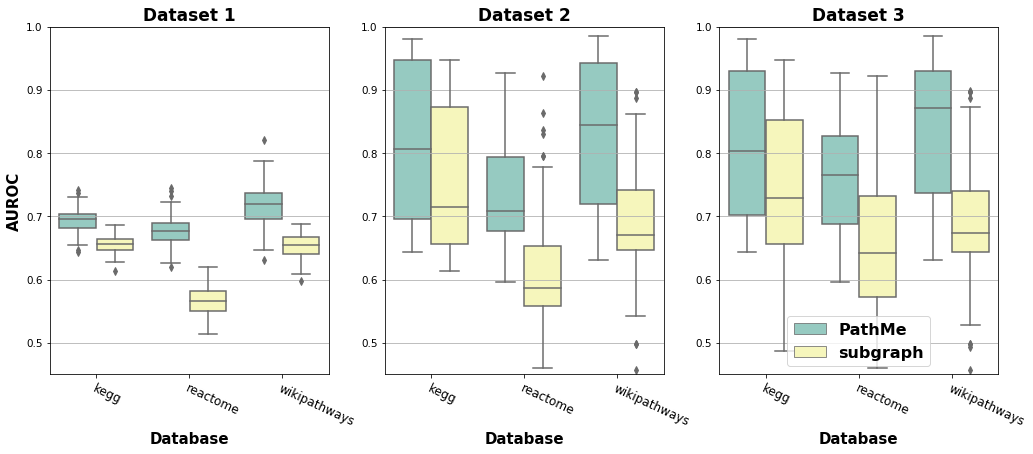

In [16]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_db['auroc']),
                 x_label='Database',
                 y_label='AUROC',
                 y_lim = [0.45, 1]
                )


##### Wilcoxon test

In [17]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_db['auroc']), True, "AUROC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUROC,p_value,Significant difference
Dataset 1,"('kegg_on_PathMe', 'reactome_on_PathMe')",1.16328e-06,True
Dataset 1,"('kegg_on_PathMe', 'wikipathways_on_PathMe')",1.92932e-08,True
Dataset 1,"('kegg_on_PathMe', 'kegg_on_subgraph')",4.3423e-17,True
Dataset 1,"('kegg_on_PathMe', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMe', 'wikipathways_on_subgraph')",6.92802e-17,True
Dataset 1,"('reactome_on_PathMe', 'wikipathways_on_PathMe')",1.3693e-13,True
Dataset 1,"('reactome_on_PathMe', 'kegg_on_subgraph')",6.74782e-12,True
Dataset 1,"('reactome_on_PathMe', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMe', 'wikipathways_on_subgraph')",7.42937e-12,True
Dataset 1,"('wikipathways_on_PathMe', 'kegg_on_subgraph')",9.04445e-18,True


### 3.2. Result metrics AUPRC

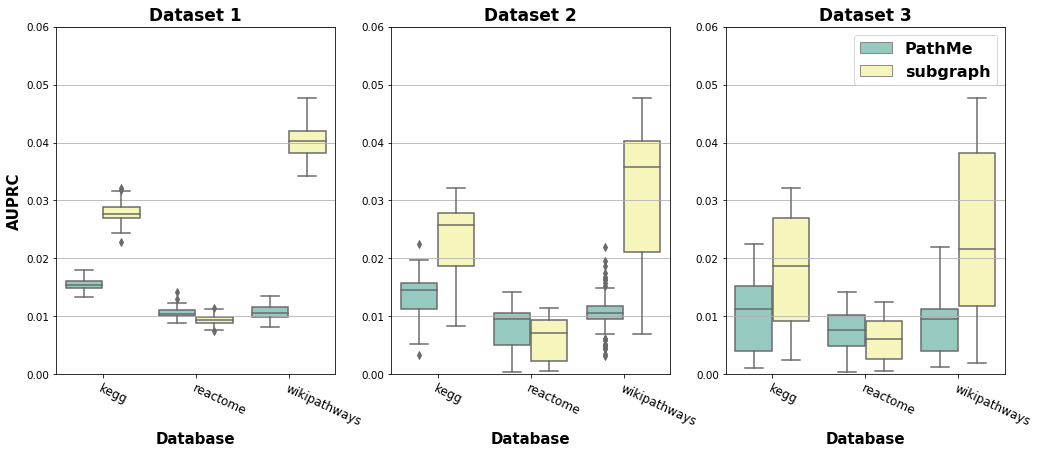

In [18]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_db['auprc']),
                 x_label='Database',
                 y_label='AUPRC',
                 y_lim = [0, 0.06]
                )


##### Wilcoxon test

In [19]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_db['auprc']), 
                                True, 
                                "AUPRC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUPRC,p_value,Significant difference
Dataset 1,"('kegg_on_PathMe', 'reactome_on_PathMe')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMe', 'wikipathways_on_PathMe')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMe', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMe', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMe', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMe', 'wikipathways_on_PathMe')",0.120155,False
Dataset 1,"('reactome_on_PathMe', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMe', 'reactome_on_subgraph')",8.13971e-14,True
Dataset 1,"('reactome_on_PathMe', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('wikipathways_on_PathMe', 'kegg_on_subgraph')",3.89656e-18,True


## 4. Evaluation stratified by entity: random cross-validation by method

In [20]:
from diffupath.views import show_sb_box_plot, preprocess_for_sb_boxplot, fdr_barchart_three_plot, preprocess_for_sb_ttest


In [21]:
metrics_by_db_entity =  {"gene_nodes": {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.6843003544918158, 0.7210007935610985, 0.7161875995909339, 0.7206804200928985, 0.7172570727683689, 0.7024650672183856, 0.6942124669126699, 0.6871594360645856, 0.6871588672396537, 0.6968396895484583, 0.7405494091829496, 0.7112839586462297, 0.7059055288678442, 0.6713332099740605, 0.7218783704479127, 0.6938964025165343, 0.7343303232799607, 0.6776771004059945, 0.6771056028775169, 0.7005120603088608, 0.6743615256081732, 0.6660978386262653, 0.6791914139224399, 0.6643675814554413, 0.7061857398421014, 0.6904008237771123, 0.6664475370925096, 0.7131096129543335, 0.6936383887871509, 0.7214092234771206, 0.648144079442692, 0.6643896626376673, 0.6808262999279255, 0.6864265217858707, 0.7097072384998604, 0.6471385879359115, 0.6794279964823391, 0.6733021968870352, 0.6944175300506904, 0.6829870787632635, 0.6408629669322985, 0.6802385687167255, 0.6989671523814027, 0.6835058810080012, 0.714029229141376, 0.6778931825751808, 0.7130498313793988, 0.701750209072172, 0.7046353327494915, 0.7041067628024149, 0.7139596686982945, 0.7085548889714746, 0.7101070648555172, 0.7196823956184535, 0.7057972232162244, 0.7084759165240346, 0.6728301756267132, 0.6879628296810966, 0.7190241140478686, 0.6911503618809036, 0.6797681648231075, 0.6591442201690649, 0.7068979560357026, 0.6708638187418516, 0.6973991419945609, 0.692993427089635, 0.7100778053797265, 0.6940119058020648, 0.7028452138668114, 0.6915088077324038, 0.7004981427202682, 0.6893991671624033, 0.6881184062256285, 0.6950379792247314, 0.7164950818719826, 0.7151038576788546, 0.7286048797612432, 0.6580029451948263, 0.7000234567966068, 0.6757263927600825, 0.6956972633991267, 0.6777805214561504, 0.7145194795693728, 0.6841577413075175, 0.6726669688412013, 0.6694912507137419, 0.720783393026897, 0.6438608099251746, 0.6939506401005521, 0.6812648952743929, 0.7140848098724096, 0.6743179019259855, 0.7105277785145578, 0.702327495192569, 0.6753225034994447, 0.6993373465308842, 0.7392130026264029, 0.6907879904774316, 0.6970730093760411, 0.7307759908735889], "reactome": [0.695267255970038, 0.6916793182215437, 0.7120057165703066, 0.679863967084324, 0.7061201917492899, 0.6990866187201971, 0.6800115765517838, 0.6569503067663522, 0.6331135906289207, 0.6428744493459184, 0.6900577319393919, 0.6881127450980392, 0.6391670664177614, 0.6706985756068717, 0.7278728808752585, 0.628794928051889, 0.6739982015966495, 0.6891533726216723, 0.6470261527766934, 0.6692450423208736, 0.7153970374544781, 0.6393201837390312, 0.6776686621690762, 0.6602340173544772, 0.689384740870564, 0.617480503810657, 0.626533582516192, 0.6850449511130752, 0.6748512646148517, 0.7130522634101102, 0.6527382105624855, 0.6984444615546757, 0.6602265341532512, 0.6441494543840385, 0.6984475149873882, 0.6906753642230155, 0.7172209237844362, 0.6518449665811398, 0.6707901511510759, 0.6829310619039662, 0.7252791516019272, 0.6955745780830688, 0.6895669083121656, 0.7142679446293936, 0.6125888591906246, 0.666147199729463, 0.7314417517548489, 0.6870000675373144, 0.6757175337278482, 0.6737191837403023, 0.7049229175893401, 0.6379965875042382, 0.6478147428547161, 0.6786129392492979, 0.6474775848582065, 0.6903481266913056, 0.6528870580906685, 0.7039924120822998, 0.666504053327222, 0.6738828350592493, 0.6985765796231178, 0.7042734090270489, 0.647821722769494, 0.7007974384750919, 0.6382212730072159, 0.6687794844323289, 0.65964654802487, 0.6553136101004806, 0.6873362986418498, 0.6543570027373545, 0.6917226484054114, 0.6738156894421743, 0.6931788649156283, 0.6578007155675097, 0.6863179397153197, 0.6995941627383531, 0.7310686750661649, 0.6797170922114486, 0.6543996879850487, 0.6679969869363269, 0.6447716328615205, 0.6476242453699494, 0.6737531717322282, 0.6837412721010983, 0.7083400287104891, 0.6733706421874632, 0.6496139945910432, 0.6621604109155379, 0.6594871536843971, 0.7075986743033574, 0.6949567939773972, 0.6570837784172243, 0.6881332036960284, 0.6805755897848742, 0.70869282715572, 0.6734483496807306, 0.6656029566283365, 0.6815569334896048, 0.6592634971622875, 0.6564233577132166], "wikipathways": [0.7585237010235377, 0.7248668171657628, 0.7428610997504026, 0.7129201719756463, 0.7182124487187417, 0.7342440855960839, 0.7287760041565798, 0.6697539038951441, 0.7310756587153514, 0.8038408494562469, 0.7385708155987081, 0.7903040170999402, 0.6800476664769494, 0.7595102185910738, 0.7619467717364177, 0.7121170647652468, 0.697236394519773, 0.7359961715227681, 0.73058711746972, 0.7588067712670454, 0.6555475083065752, 0.7315329641460568, 0.7750260873689703, 0.6451010337399622, 0.7680987095552364, 0.7428426578490112, 0.718730851365376, 0.6950017406494904, 0.6938545457920754, 0.7725516204413116, 0.7516527923816487, 0.7248267316417734, 0.7251803226653823, 0.7320270299776652, 0.7879408997363495, 0.7437312621074438, 0.7084454988204729, 0.7395336701534666, 0.7590460706769466, 0.7098583406643464, 0.6966880228101152, 0.775923819512994, 0.691989606957881, 0.7269606611021531, 0.778243938166747, 0.7418248227428479, 0.7244792500565268, 0.6481142322085374, 0.7468566182750344, 0.8104230294982453, 0.7540098921570909, 0.7651886907407395, 0.7396991622943461, 0.6944740779460543, 0.7231048207994273, 0.7742118111427274, 0.7361226409873263, 0.7625729329728191, 0.811778538780938, 0.7836409875875595, 0.7510705305765727, 0.7373567319030057, 0.6992354665943352, 0.7415882278589134, 0.7487235982849456, 0.7062896707584622, 0.7352379134628645, 0.7566445055973194, 0.8002724556577825, 0.7500821887252883, 0.7178057316317092, 0.7706616053013453, 0.7018003371268415, 0.6915099713112658, 0.7282184154508207, 0.6978523314833263, 0.7253537239118382, 0.6824114495911736, 0.6941041685723546, 0.7557382380941088, 0.7496041475125139, 0.7279370063575294, 0.724898956148021, 0.7783935514217295, 0.7703542269965235, 0.7631749683313334, 0.7750311442921725, 0.6871671965982225, 0.7873320340499583, 0.74907344084241, 0.7463370251017603, 0.772656664273885, 0.8194079151144622, 0.7495216569909227, 0.7348921498881744, 0.7693503652350198, 0.7316726247390586, 0.7211485604342747, 0.7407009929481707, 0.7341694269201383]}, "subgraph": {"kegg": [0.6658864058085382, 0.659755726771078, 0.6510570576960618, 0.6796558086076169, 0.6618260811520089, 0.6560277591412278, 0.6692920849385782, 0.671758402824163, 0.6617787761755972, 0.6566421499058744, 0.6422492694265028, 0.6865294078153376, 0.6328351671432746, 0.6370499866607047, 0.6535990215924425, 0.6657744553434753, 0.6537719217136694, 0.6481874294220306, 0.6669936839967838, 0.6440320726694505, 0.6410131434758185, 0.665959478715789, 0.6753582492976651, 0.6568272709351548, 0.6379363001745201, 0.6634516286423979, 0.6617429071297317, 0.6673209038655755, 0.6389135551056437, 0.6461257959295968, 0.6639278060160729, 0.6461767236325625, 0.6441700407177213, 0.6717417048997173, 0.6626357702434322, 0.6487884330383236, 0.669102761061759, 0.6674994841128792, 0.6353049932523617, 0.6516890950215907, 0.6701659322286468, 0.6810947115017292, 0.6749166557583884, 0.6662845657077547, 0.6657318293809671, 0.6842468349558458, 0.665904424597064, 0.6383432638302102, 0.670338580517404, 0.6884911470361816, 0.6652523465148484, 0.6571340378043169, 0.6684235980829087, 0.6830604853197824, 0.6364128688425539, 0.6532640300974053, 0.6751945115302019, 0.648198150272839, 0.6661922169686163, 0.6529218871058469, 0.6617364579971335, 0.6597873947952154, 0.659152369352761, 0.6852668690958165, 0.6668839189590017, 0.6572181360843125, 0.6530753895248098, 0.6464310183080262, 0.643818667844968, 0.6621169541114875, 0.6905133536008403, 0.6681029507753049, 0.6443205117053531, 0.6667967909009062, 0.6602583336812222, 0.6705754398150888, 0.6327454554088863, 0.6550251828733551, 0.6564618171837874, 0.6720490388563802, 0.6718013559738124, 0.6771129526898079, 0.65703412167614, 0.6714488053074632, 0.6707200432135902, 0.6554888699128611, 0.6476743913779377, 0.6640050039119387, 0.6643742702699162, 0.6577801111972171, 0.6725229878962208, 0.6726020407320743, 0.645197567806599, 0.6771392660005786, 0.6650052580533099, 0.6713130187175996, 0.6619360037782772, 0.6613510288965004, 0.6581559718047834, 0.651447337866327], "reactome": [0.5384565830668129, 0.55522170163645, 0.6159046086444354, 0.5776095334692629, 0.5862796848072316, 0.556083380466767, 0.6327664135784685, 0.5631390930820711, 0.6028392950605495, 0.5682686436666993, 0.5347521572382092, 0.5564671945784415, 0.5960251352142292, 0.5817854299178773, 0.5391139005631477, 0.5819444629877226, 0.5591411542735244, 0.595079200297985, 0.5727242866565169, 0.6067381162526794, 0.6163772048235803, 0.5856668683153945, 0.577094680196478, 0.5814644974286198, 0.6055915995133782, 0.5769121477836427, 0.5610808983301554, 0.5924851972217113, 0.5915586429950733, 0.5788660165665207, 0.569268156718498, 0.5528822636693855, 0.5859391388825981, 0.5707261663379903, 0.5791943071102099, 0.6078394715008406, 0.544877099791528, 0.5665751591257151, 0.5860489832105868, 0.5739829142261771, 0.5950801711087748, 0.5729511004285965, 0.5746111407764756, 0.5437178238512257, 0.5924546632124352, 0.6074677221784186, 0.5554786960612202, 0.5988305009574229, 0.6091610369057439, 0.5716861223413288, 0.5637400145320767, 0.5829349277900622, 0.581950327961628, 0.5483473387813241, 0.5854765352452036, 0.6042967803658359, 0.6205022869177174, 0.5613110613370705, 0.5703381264208462, 0.5866094133501614, 0.6207684927875124, 0.5104792303628274, 0.5763901010554995, 0.5727739660341806, 0.5539881018239075, 0.5367978037201061, 0.5588301928804029, 0.5702239116794806, 0.579077148109878, 0.5701810214492171, 0.5798820643580529, 0.5964616515531229, 0.5480801024242254, 0.5844938995530795, 0.5252835216061033, 0.5702964316033903, 0.5557253657676715, 0.6003964988550228, 0.5514074637298744, 0.5823076296819322, 0.5634064570794237, 0.6075408369960152, 0.5972299969582677, 0.5926413834470738, 0.5493912638371741, 0.5848298035631979, 0.5657619513127752, 0.5625260956828646, 0.5736450689063749, 0.5668019068032654, 0.5752718025084622, 0.5656780037655653, 0.579247983925205, 0.5660064770070204, 0.5696573669625664, 0.6163757599945654, 0.5483542688191457, 0.5572587175577431, 0.6128942265764888, 0.5675138672353724], "wikipathways": [0.6527925577934662, 0.6857129091821734, 0.6693894230021831, 0.684663286540123, 0.6582753623188405, 0.6603160517729733, 0.6427575553271847, 0.6373893486909666, 0.6659773370427162, 0.6782946587341662, 0.6533982264329449, 0.6945351995267292, 0.660172741406115, 0.6852957262093634, 0.6432234236995285, 0.6822529722747694, 0.7040387132049766, 0.6630510290057725, 0.6656634069526484, 0.6642727443349742, 0.6413384875573809, 0.6819309365467369, 0.6557177942705533, 0.6948689335569896, 0.6929782787933926, 0.6804738955823293, 0.714241044859396, 0.6658319558549001, 0.6853345806735636, 0.6770557909002171, 0.6642348410652062, 0.6417378384327537, 0.6683217147599126, 0.6405925560631229, 0.6557801845715694, 0.6433200304699975, 0.661188869169266, 0.6626804177446716, 0.6572119548380824, 0.6750366140525054, 0.6881300215741706, 0.6746870919114571, 0.6640605009524351, 0.6878876698576601, 0.6810905797101449, 0.6424376178697676, 0.6543365461112246, 0.7193524720639688, 0.6721893687392791, 0.6790483926441424, 0.6719506006168764, 0.6672952296439711, 0.6491953519365409, 0.6574301665871456, 0.6647457822306675, 0.6838339428489476, 0.6404717963751363, 0.6467426283044504, 0.6528729965199354, 0.6544712109109639, 0.6697694159659867, 0.6467451690821255, 0.6572190121495924, 0.6372755657086004, 0.6920907468186792, 0.6490892635449541, 0.6682564443535187, 0.6564686896718146, 0.6499113325966741, 0.6463036547557195, 0.6723269887964407, 0.6790723181156996, 0.689691586523785, 0.6619955810117959, 0.685699463984798, 0.6472838057334319, 0.6704338590418597, 0.6532896764252696, 0.6932390806588804, 0.6769527188924952, 0.6539012478929731, 0.6359392036764652, 0.6634703164199001, 0.6797929731357998, 0.6751791010948077, 0.694239405184468, 0.7069275953665416, 0.6914235274699251, 0.6843645995278401, 0.6843190903875802, 0.655475531944026, 0.6719052224371374, 0.6707987871957928, 0.7046006794495306, 0.6847077658508788, 0.678522351424862, 0.6696047653545842, 0.6836370584603974, 0.6939468599033818, 0.6838057170542636]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.9794035681065664, 0.9543055917082752, 0.936346740885419, 0.9826582230093909, 0.9212493651784691, 0.9219683745110282, 0.9861240300200048, 0.9461543922368836, 0.9200579940185705, 0.9330629615539339, 0.9788756878370926, 0.9596744981041817, 0.9342625239593932, 0.9336217865288595, 0.9724710439469425, 0.9608513070497501, 0.968563819814441, 0.9798349737061017, 0.9240207365932064, 0.9396159580025739, 0.9765029570396475, 0.9231260705502878, 0.9320326848900644, 0.9272207831922923, 0.9773157106269579, 0.9283957718610694, 0.9481193810330799, 0.9455992078155405, 0.9859401820640846, 0.964329855997903, 0.9816224855151474, 0.9375535843980437, 0.9428269262624076, 0.9340550124051863, 0.9320326848900644, 0.9442167075925565, 0.9228794230450683, 0.9417875482145815, 0.9793899160306316, 0.9571233801811904, 0.9484697843154031, 0.9413725251061676, 0.9434794954920847, 0.9411631932751695, 0.9751404798613678, 0.939280116934581, 0.9367754160697676, 0.9791287063110817, 0.9574128041910053, 0.9300968205225286, 0.9785061716484609, 0.9196839271379607, 0.9354994020390741, 0.968041400375341, 0.9608695098176628, 0.9459414198523028, 0.9708409860803434, 0.9804138217257315, 0.9208525448379681, 0.9273600343668258, 0.9254460133207856, 0.9826063451208391, 0.9907484432082743, 0.943038078370197, 0.9883101824463428, 0.9043863209839689, 0.9360664182595606, 0.9381560960159603, 0.9326752425973894, 0.9372696212186026, 0.9882583045577911, 0.9759450422031174, 0.923051439201845, 0.9221076256855618, 0.9344481921921047, 0.9874719449839543, 0.9640404319880881, 0.9782240287458112, 0.9315521318171641, 0.9310178805789209, 0.9444806477272935, 0.9584339794709184, 0.9386857965622253, 0.929566209837868, 0.9429361428698847, 0.9374571097281054, 0.9532907873971316, 0.9631321138692349, 0.9160561154929219, 0.8776610171342655, 0.9327152886867978, 0.9681196722773665, 0.9253149533918128, 0.9241172112631447, 0.9236175452839359, 0.9821449049542473, 0.9448201293488687, 0.976818775062936, 0.9835428775299573, 0.9643653513953332], "reactome": [0.9470366952942012, 0.7684103437670051, 0.7105259422244304, 0.7838408214446259, 0.8372725767146947, 0.7228144888447252, 0.7933328601509453, 0.8816807438427142, 0.42401873802257084, 0.6692502425059739, 0.7862445879764355, 0.7314642629001349, 0.7154754300044952, 0.8345139233917713, 0.8283294295786311, 0.8908178957579199, 0.8541699197955852, 0.5979179974921334, 0.7329453237750492, 0.785156268483687, 0.6794851775616912, 0.7085858944330093, 0.7681926798684553, 0.7554971963943502, 0.8345139233917713, 0.7475051458584712, 0.8001230274209195, 0.6620247474389004, 0.7001963706910829, 0.8440343530413799, 0.7293491376250976, 0.879116095298933, 0.6511178933920079, 0.7933328601509453, 0.8211891073414248, 0.5928028958762155, 0.8089857335509972, 0.7296709016490406, 0.7767099628551825, 0.6778148437315163, 0.9128776586935434, 0.7491186978020677, 0.7764213215984102, 0.7984432299429816, 0.7838408214446259, 0.6543686563986089, 0.591733503678993, 0.8908178957579199, 0.7025244280407883, 0.6484680720183595, 0.5974353514562187, 0.7397260273972603, 0.8850450706224714, 0.809818534554144, 0.82014337426361, 0.6532046277237561, 0.7023588142049353, 0.5792888068706084, 0.7770601178224146, 0.7484278515153666, 0.7269406392694064, 0.7462180897626991, 0.5979179974921334, 0.7491186978020677, 0.8509617432039179, 0.7790001656138359, 0.7285305320935954, 0.7462180897626991, 0.7748692833652732, 0.5946057207750728, 0.9106442378214683, 0.7508978635815176, 0.8500011829559704, 0.7684103437670051, 0.6656966427709561, 0.7576170534932689, 0.5917902855655712, 0.5770932405895852, 0.7120259303948707, 0.7489483521423332, 0.6108548039841957, 0.809818534554144, 0.5810443135306504, 0.6580878699694797, 0.7974353514562188, 0.77048761445099, 0.6511178933920079, 0.8211891073414248, 0.5921688314760924, 0.7482338467362245, 0.7790001656138359, 0.591733503678993, 0.792495327323917, 0.717107909243618, 0.6737785979605839, 0.8930939030449286, 0.6575247829275794, 0.5810443135306504, 0.82389097877777, 0.9561217971467102], "wikipathways": [0.9895424218047603, 0.9879927128188142, 0.9744475464912696, 0.9928942096878499, 0.9748458177573779, 0.9729767031025726, 0.9856109717818893, 0.9283387750595435, 0.9771526364769161, 0.949384059685484, 0.9891362639789271, 0.9441079512295146, 0.9472822915187937, 0.9765650877774097, 0.9891796400574142, 0.9880045426584015, 0.9579212605877064, 0.9315525481474471, 0.9468012113755737, 0.9639623653369926, 0.9787890976198362, 0.9887931986308933, 0.9739664663480496, 0.9402198772851307, 0.9889390999858042, 0.9479092730169245, 0.9907766684017099, 0.9770619410400795, 0.973883657470938, 0.9734774996451049, 0.9790848436095206, 0.9879927128188142, 0.989849997634032, 0.9617344122147038, 0.9827520938816069, 0.9938287670152526, 0.9784381457120774, 0.9414935566807048, 0.9380076972822915, 0.986726919982965, 0.9490370510575876, 0.9626177069038944, 0.9495930535181943, 0.9813758892096089, 0.9394548809918137, 0.9900077288285305, 0.9721801605703561, 0.9747984983990283, 0.9868846511774634, 0.9596957365258126, 0.9872671493241219, 0.928626634489503, 0.9434415369327592, 0.9739664663480496, 0.9777953910944968, 0.9906544267259736, 0.9598100916418241, 0.9907766684017099, 0.9506932285998202, 0.961324311109008, 0.9762141358696509, 0.9843767251849398, 0.9387450906165712, 0.9868688780580135, 0.9594473098944779, 0.9401843877663686, 0.9907963848010221, 0.9766912727330085, 0.9341708859761195, 0.9370967996340637, 0.9590766415874068, 0.9890652849414029, 0.951509487531349, 0.9709380274136816, 0.9767504219309453, 0.9723930976829288, 0.9767977412892948, 0.9949841480149529, 0.939861038817647, 0.9875944415527058, 0.9704648338301867, 0.9789428855344722, 0.9412017539708828, 0.9359335320746384, 0.9787417782614868, 0.9633432703985868, 0.9747354059212291, 0.9833159829019386, 0.9881110112146879, 0.9729214971844982, 0.9274160475717284, 0.9491119733749743, 0.9794791715957665, 0.9870818151705864, 0.9608826637644127, 0.9721801605703561, 0.9788640199372229, 0.9941915487625987, 0.9495891102383319, 0.9783316771557912]}, "subgraph": {"kegg": [0.9651183096132018, 0.8874530690648739, 0.8644925638115196, 0.9202741639745045, 0.9303501266043831, 0.8809103873803079, 0.9135277510986932, 0.872670915917227, 0.723525131697663, 0.8828836694897989, 0.8649145784219565, 0.8157455106376786, 0.9573794347914666, 0.8997526121249163, 0.8857271748304666, 0.9617945807503129, 0.971148752874065, 0.8963648534590646, 0.9683227102069326, 0.9003870892633661, 0.9432841468028755, 0.9169213306557235, 0.8774178526732443, 0.8918565732413635, 0.9573386885532176, 0.8924328414680288, 0.971559125702145, 0.8899153060333538, 0.9031723856922496, 0.9630926394831049, 0.8551063767862859, 0.9740271835618034, 0.9055647719665881, 0.8891993364184057, 0.9012340289298292, 0.8609010739544225, 0.8242032655199512, 0.82853400855671, 0.8876422480281732, 0.8282487848889666, 0.9788614336854973, 0.9560289880380687, 0.9740126313338572, 0.9116621554760034, 0.9538752583020461, 0.8716697226345353, 0.9588899560522717, 0.9087633516691407, 0.9023894758287494, 0.8846503099624553, 0.9656421898192613, 0.8877295613958498, 0.8859687418143718, 0.8945079891731424, 0.8671090543962281, 0.8957100032014902, 0.9089554410780291, 0.8834221019238045, 0.9644751011379843, 0.822029162664804, 0.9002444774294945, 0.8709741261387118, 0.9785645682353968, 0.7916528420501179, 0.8869379201955819, 0.885203294624407, 0.8322913938123927, 0.965319130358858, 0.8810355365406444, 0.6958846299368434, 0.8901423207893129, 0.8519077970837335, 0.8517360807939696, 0.8718006926860502, 0.9645158473762333, 0.8374719869612038, 0.9626095055152945, 0.8826275502779476, 0.9783433743706161, 0.9685613667452487, 0.9377950464216072, 0.8986786577024943, 0.944058325329608, 0.955755406152682, 0.8834919526179459, 0.8776797927762742, 0.8907971710468874, 0.8997555225705056, 0.9359498239180419, 0.8969585843592655, 0.9487412322826625, 0.8876538898105301, 0.9040193253587124, 0.9029890276201287, 0.9080357402718356, 0.9572601065223085, 0.9420559387642248, 0.8616752524811548, 0.840149596903286, 0.8445531010797753], "reactome": [0.5878122046712569, 0.5143647900634535, 0.6027676522208721, 0.43627649520723644, 0.62813554745511, 0.43607398406912384, 0.4370055353044418, 0.44805589307411914, 0.7994734710409073, 0.5742135817469961, 0.37762926960982857, 0.7616578911840151, 0.5742135817469961, 0.42203321182665055, 0.7219387066288646, 0.5729242608343459, 0.43556770622384233, 0.3000438774132578, 0.4148373160523829, 0.5592007560415824, 0.5860874848116646, 0.6183913865262589, 0.6211320372620495, 0.7136560010800594, 0.4513298231402727, 0.5240313217226947, 0.2363439989199406, 0.6048872687997839, 0.4204434993924666, 0.693600648035642, 0.6527710274065073, 0.662251923855812, 0.4204434993924666, 0.41134737410557587, 0.3852639395166735, 0.6296813824760362, 0.613696503307682, 0.43273592547590123, 0.5742135817469961, 0.4367625219387067, 0.736735520453625, 0.6253746456055084, 0.693600648035642, 0.7832422033211828, 0.566815174834616, 0.6296813824760362, 0.43627649520723644, 0.43273592547590123, 0.6826346699068448, 0.5661806399351965, 0.6209666531659241, 0.620143107870933, 0.566815174834616, 0.6358039692183071, 0.4388011340623734, 0.4182766302146619, 0.62813554745511, 0.4617861482381531, 0.6399081949507224, 0.4174362089914946, 0.37795666261644395, 0.3931044957472661, 0.5678142297826381, 0.2607195895774268, 0.6296813824760362, 0.6253746456055084, 0.6322532739300661, 0.5095990279465371, 0.5726306196840827, 0.5081848251653842, 0.5897461860402322, 0.5316929931146213, 0.6027676522208721, 0.3000438774132578, 0.43627649520723644, 0.5928716079384366, 0.6746996084784663, 0.5899554475496152, 0.5856453354934521, 0.7136560010800594, 0.4513298231402727, 0.42135142432833805, 0.5095990279465371, 0.6013568246253544, 0.5899554475496152, 0.5083063318482517, 0.31527946537059537, 0.5856453354934521, 0.6183913865262589, 0.40691238018091, 0.4255096530309167, 0.49236870527879034, 0.40683812609693537, 0.7511543134872418, 0.6048872687997839, 0.38628999594977725, 0.4367625219387067, 0.4493722154718509, 0.6013568246253544, 0.7372620494127178], "wikipathways": [0.6860927413005826, 0.6975673122342938, 0.5762281530467643, 0.9585301527318533, 0.8237482286254134, 0.8235710911667455, 0.7023697055581797, 0.5880176350181073, 0.9455597543693907, 0.6849315068493151, 0.9701621791843804, 0.5685718784443394, 0.716225791213982, 0.7070540072429539, 0.8301251771374587, 0.7083530152731853, 0.5766217918438041, 0.9290859707132735, 0.8235710911667455, 0.8315816406865061, 0.5563100299165487, 0.6687332703511257, 0.8333136513934813, 0.6954416627302786, 0.5447370492835775, 0.6697173673437254, 0.6831404503227838, 0.6983939537080774, 0.8234136356479296, 0.8147732640529052, 0.8216816249409542, 0.5693788379782712, 0.8114076523382145, 0.7080381042355535, 0.8429971658006613, 0.8353015273185325, 0.6789875610140135, 0.6966225791213981, 0.7062076838293181, 0.6917611399779562, 0.5569792158715163, 0.8201857975122029, 0.5560935285781766, 0.819890568414423, 0.4286136041568257, 0.5867776728074319, 0.8188277436624154, 0.6976263580538498, 0.5894347346874508, 0.7068178239647299, 0.5686899700834515, 0.8338450637694852, 0.5544402456306095, 0.5525507794048181, 0.5616044717367343, 0.8061919382774365, 0.43030625098409697, 0.6797748386080932, 0.6937883797827114, 0.7065619587466541, 0.6852267359470949, 0.94713430955755, 0.5693394740985671, 0.8238466383246734, 0.8166430483388443, 0.7054007242953866, 0.5514289088332546, 0.5686899700834515, 0.6952054794520548, 0.6687332703511257, 0.69703589985829, 0.6807982994803967, 0.673260116517084, 0.8099118249094631, 0.7064241851676901, 0.5777633443552197, 0.5460163753739569, 0.6985120453471894, 0.6991418674224531, 0.6859352857817667, 0.6918989135569201, 0.44622894032435834, 0.5686702881435994, 0.829672492520863, 0.7011297433475043, 0.6845181861124232, 0.9700244056054166, 0.8147339001732012, 0.6701897339001732, 0.834396158085341, 0.6846953235710911, 0.7023697055581797, 0.6690088175090537, 0.6936702881435994, 0.4393008974964572, 0.6598763974177295, 0.5885096835144071, 0.5871122657849157, 0.6845181861124232, 0.5476106125019682]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.8664071742936917, 0.8066489991008471, 0.9494321139557995, 0.6304694524632057, 0.8828545738488477, 0.9762883914627798, 0.9475651885854905, 0.7765463063745208, 0.8925961856987366, 0.8515261937437888, 0.8785433722966258, 0.82546732289054, 0.8035729496947612, 0.7768539113151295, 0.8877525909800768, 0.9636955184326346, 0.8640788415124699, 0.8593464578107994, 0.9389309545217925, 0.9560976763996024, 0.8261842790213431, 0.8022715441768018, 0.8723226539207799, 0.8716175287492309, 0.7227935260990961, 0.955603142302778, 0.9193388859968766, 0.826215039515404, 0.9235530736832143, 0.8794922152288108, 0.8048341299512565, 0.6319767166721878, 0.9795821305191424, 0.7450925181013677, 0.9106265676021013, 0.8642563059012824, 0.7812952534191472, 0.8058705219819222, 0.7568761535185273, 0.8046188064928304, 0.8677298755383087, 0.8811935071695614, 0.9429511144763617, 0.8688869433533672, 0.7786214566277033, 0.780362973829918, 0.8708863754673228, 0.9554446074487719, 0.9698334200937012, 0.6837584591358667, 0.8893000804505229, 0.741237991576357, 0.9527400501632672, 0.8561994226491885, 0.8070133926458758, 0.7502176896502769, 0.7208721783162177, 0.7984288486110455, 0.9444607448771947, 0.8093062325493352, 0.8717263735743694, 0.7277767261369551, 0.6965571908570347, 0.8576711939804079, 0.879416497089584, 0.8684657612039185, 0.780897733188207, 0.641741990440585, 0.8947375893237426, 0.8636884198570821, 0.7202569684350006, 0.889070559840992, 0.8078013345322039, 0.9324783493445649, 0.8069045478207373, 0.7215110501159434, 0.7858762008423643, 0.8862311296199896, 0.86014149827268, 0.852730585395864, 0.8691117315791965, 0.8608915810893947, 0.954367990156642, 0.8922033978514978, 0.8633926458757276, 0.7420756234915528, 0.9423832284321613, 0.8652666698215892, 0.8581467985424258, 0.8618001987601156, 0.7255714353319767, 0.800402252614642, 0.880019876011547, 0.8012682788320478, 0.7935544933983247, 0.7913563011688987, 0.8033244995504236, 0.8816265202782643, 0.8904879087596422, 0.8727343713028253], "reactome": [0.8829705000788769, 0.8739302334753116, 0.8695614450228744, 0.8147381290424357, 0.835420610506389, 0.9318307303991166, 0.8150122259031394, 0.8752149392648683, 0.9398919387916075, 0.7260155387285061, 0.8685459062943681, 0.7545856996371667, 0.8691601593311248, 0.7642717699952675, 0.9263823158226849, 0.9379762186464742, 0.8802117841930903, 0.9212060261870958, 0.7842197113109324, 0.8100883420097807, 0.883312628174791, 0.8349404480201925, 0.9300481148446127, 0.7973517116264395, 0.7728269443129832, 0.8538176368512382, 0.8503815664931378, 0.9023909528316769, 0.7985752879002997, 0.9728279302729137, 0.8124930982804859, 0.9273071462375768, 0.8877277567439659, 0.910118906767629, 0.771219829626124, 0.7795748540779304, 0.8701944312983121, 0.8834141820476415, 0.8850982016090866, 0.9346239548824735, 0.9601672188042277, 0.9333106562549298, 0.8121529421044329, 0.917489943208708, 0.9310705552926328, 0.920908266288058, 0.9033394462849029, 0.8778730872377346, 0.8375354945575013, 0.6623373166114529, 0.9048982489351632, 0.7354649787032654, 0.8807303991165799, 0.8823503312825367, 0.8774905347846663, 0.8628431140558448, 0.8305667297681023, 0.7726682047641584, 0.9225331282536677, 0.895311760530052, 0.9461971525477205, 0.8836517983909133, 0.8719238050165641, 0.7538649629279066, 0.7681170137245623, 0.9539684887206183, 0.8775457485407794, 0.7715777330809276, 0.8166972314245149, 0.8832367092601356, 0.7717966161855182, 0.8283976179208077, 0.7523751774727875, 0.8994281432402587, 0.9298045827417574, 0.7797158463480045, 0.8674948730083609, 0.8589860388073829, 0.8062154914024293, 0.8491284114213599, 0.9585571462375769, 0.7653159015617605, 0.9159045196403218, 0.9183753352263764, 0.8239400930746175, 0.9342680233475311, 0.8935725272124939, 0.8159824104748383, 0.8669910474838303, 0.9799465609717621, 0.8286066414260924, 0.9361945890519009, 0.8856611847294527, 0.8780180233475312, 0.8269916390597886, 0.8056564521217857, 0.9098950938633853, 0.8304119340589998, 0.9661470657832466, 0.9072793421675344], "wikipathways": [0.8778884524992507, 0.9432601460590861, 0.9256455149134845, 0.9385794728623481, 0.8899785485575482, 0.8877939715137463, 0.935499771289768, 0.9329405826590325, 0.8879162131894824, 0.9275067430085648, 0.8831606176753576, 0.903835233994227, 0.9160712314074354, 0.9229443682077004, 0.910337702487421, 0.984128298553605, 0.8693512515970283, 0.9365960030915313, 0.9569551570214041, 0.9471087872048455, 0.873692802725595, 0.9361780154261109, 0.8970961687092857, 0.9686982444518053, 0.9395968390668622, 0.8725019322071326, 0.9470062619284215, 0.8653764254956703, 0.9354721683307308, 0.8630696067761321, 0.8977152636476916, 0.919766084638559, 0.9806779286739538, 0.9763363775453872, 0.9219309452830486, 0.9374753545008596, 0.9355116011293554, 0.9788245871385984, 0.8603921197495229, 0.8928886890960426, 0.970468777110049, 0.9230587233237117, 0.8778056436221392, 0.9634733986340478, 0.9125656556097099, 0.8685547090648118, 0.9217732140885503, 0.8355849461347971, 0.9372939636271865, 0.9408034827047745, 0.8914651650656951, 0.8135656713828294, 0.8721470370195114, 0.9402474802441679, 0.9028809602675121, 0.9136342844524362, 0.8883263142951782, 0.975173109985962, 0.9167100427451537, 0.8790990394170255, 0.9354563952112809, 0.8411449707408635, 0.9345652139623654, 0.9394627675515387, 0.9368878058013533, 0.878337986403571, 0.9376804050537075, 0.8721470370195114, 0.8832276534330195, 0.9124710168930109, 0.8725886843641066, 0.8788939888641777, 0.978339563715516, 0.9134410637391757, 0.9481655862079844, 0.9425464124039812, 0.9221478256754838, 0.9339776652628591, 0.8987562895313806, 0.9274633669300778, 0.9014968690357892, 0.8996987334185083, 0.9278576949163236, 0.893271187242701, 0.8908500134071515, 0.9345652139623654, 0.8559874761431568, 0.9361780154261109, 0.9304405432262338, 0.892995157652329, 0.9869990062934746, 0.8617880408208332, 0.9541199388002966, 0.8789452515023897, 0.9000102525276424, 0.904221675420748, 0.9065403239798735, 0.8875179419233742, 0.8785036041577943, 0.9144702597832773]}, "subgraph": {"kegg": [0.694522620668785, 0.7814041458617038, 0.7233469511272507, 0.7292177333938568, 0.6881752156150702, 0.7665456196096232, 0.5432591920108942, 0.5850242094114086, 0.8126948101074294, 0.8815970646088668, 0.8082841579664095, 0.8846118928733545, 0.7926993493720684, 0.8551142381600848, 0.7161370857921017, 0.7573460432743229, 0.696466939022545, 0.8103343924950824, 0.746727946739295, 0.384241186261159, 0.6141133303071569, 0.7029580874564987, 0.7073271296716599, 0.6915720986533515, 0.8314268421848994, 0.7463761537297624, 0.6936223331820246, 0.5574292631260402, 0.6862157663791799, 0.6532531396580421, 0.7739143592071418, 0.8427598729005901, 0.6736646996519897, 0.691942805265547, 0.7555038583749433, 0.48332955061280075, 0.655795127855954, 0.8135572703888636, 0.8704229081555455, 0.672151611438947, 0.851202905129369, 0.7207179603570888, 0.8455969133000454, 0.6874716295960054, 0.7537411106067484, 0.7392457255257981, 0.7730292026025117, 0.8034347102436072, 0.7828415796640944, 0.632364956876986, 0.7952110758057196, 0.636291420789832, 0.815441065214102, 0.807807535179301, 0.7494477228022394, 0.7854819185958541, 0.7892986836132546, 0.6914813133605688, 0.7451316386745347, 0.7274020275382055, 0.8024890301104555, 0.8283477076713572, 0.870456952640339, 0.8097253744893327, 0.7993985474353155, 0.7901649266152218, 0.871323195642306, 0.7605537902859737, 0.697719019518838, 0.8343924950824633, 0.7364238160084733, 0.8497616886064459, 0.8459978816765017, 0.7891246784687547, 0.7321115146013013, 0.7023982448176729, 0.6610077167498865, 0.7626721137842337, 0.5349296413980935, 0.8625208049629294, 0.6665002269632319, 0.8052352852171282, 0.8694431835376002, 0.9337191708276592, 0.8373808443032229, 0.7003707066121955, 0.5610909366016038, 0.9322136480556816, 0.8454229081555455, 0.8035557573006505, 0.6902859736722651, 0.7466333787259798, 0.6226357996671206, 0.6317748524738992, 0.6349182932364957, 0.6022771977606295, 0.7706763504312302, 0.6655205023452867, 0.8405961567559389, 0.7190422151611439], "reactome": [0.809759123594747, 0.6296883967455522, 0.7884552625952309, 0.7743141127353341, 0.7341174054443356, 0.6230517763298561, 0.6054418036753204, 0.8356669817584371, 0.6126017014955605, 0.7153539718442996, 0.8782282839877114, 0.6812481010094189, 0.4804924434241473, 0.5713106129660264, 0.7992119892418668, 0.794487019344384, 0.8112670627820353, 0.8129663076871139, 0.7611773178938366, 0.6586093199644396, 0.8337919043921542, 0.6968789034806387, 0.7519580702879713, 0.7415347219877788, 0.6555118553278643, 0.7524264879646198, 0.8801751009981658, 0.8712343720108482, 0.8195888615059137, 0.5891822243228341, 0.8312050572229162, 0.8148512316712242, 0.73548608532235, 0.920249428896166, 0.7544619245355211, 0.7106543218212305, 0.6761883461058033, 0.6759323340422898, 0.7919367453270765, 0.8073678021223681, 0.8152872961750111, 0.5947230568403048, 0.6891943215961649, 0.8706393549621327, 0.7346631894039137, 0.5411194760473989, 0.7558517043088799, 0.6926012513644599, 0.7200114220766798, 0.7638837311366936, 0.7885931152448151, 0.6072268548214668, 0.6599034468789035, 0.564817471838673, 0.6897893386448803, 0.6863683422796889, 0.7965660623656641, 0.5602219146326368, 0.7559290705918099, 0.791784826080596, 0.6348339578902356, 0.866164770489405, 0.6137059293519238, 0.8207465424304828, 0.8350339848981017, 0.8315539088259456, 0.8776276403002374, 0.7956475135883325, 0.7535405624388103, 0.7627218302330554, 0.7050642562146224, 0.7386426296658901, 0.7205529860571891, 0.6760533067755984, 0.7531621709822985, 0.8577810787391827, 0.7295992145212293, 0.8679357550386549, 0.6664795809279452, 0.682695553830053, 0.6913436976019265, 0.7807101943441027, 0.462577225616961, 0.7841733904999831, 0.6244570293598011, 0.6433090825202841, 0.780608914846449, 0.8494409934393392, 0.7793161945916749, 0.6945157152020527, 0.8189136648548889, 0.7957094066146766, 0.6140097678448848, 0.5989050560975884, 0.8036457805835949, 0.8737705794312594, 0.7519693235654884, 0.8059442625164579, 0.8386589469182899, 0.7177481066360578], "wikipathways": [0.8138482128798614, 0.7124271768225476, 0.8328609667768856, 0.8002479924421351, 0.7205361360415683, 0.8283341206109274, 0.7392733427806645, 0.8115651078570304, 0.6935325145646356, 0.7844433947409857, 0.8369548102660999, 0.8351047079200125, 0.8326838293182176, 0.7357699574870098, 0.559852779089907, 0.7016808376633601, 0.7807038261691073, 0.7871201385608566, 0.8141631239174933, 0.6285230672335066, 0.5658557707447647, 0.7230947882223272, 0.6330892772791686, 0.576838293182176, 0.6957762557077625, 0.920563690757361, 0.7938119981105338, 0.6879822075263737, 0.5748897811368289, 0.6762320894347347, 0.7064045032278381, 0.692371280113368, 0.6233467170524327, 0.7345299952763344, 0.8083372697213037, 0.6453904896866635, 0.5872697213037317, 0.8348488427019367, 0.6720004723665564, 0.9531963470319635, 0.6937883797827115, 0.954672492520863, 0.7843449850417258, 0.9240473941111635, 0.9446150212564951, 0.8426625728231775, 0.6808376633601008, 0.7621634388285309, 0.8033183750590458, 0.8351047079200125, 0.461502125649504, 0.7168162494095418, 0.6760746339159187, 0.8262084711069123, 0.7064045032278381, 0.9360140135411745, 0.5783931664304833, 0.6915446386395843, 0.7928672649976382, 0.9161155723508109, 0.5996890253503385, 0.6952448433317587, 0.8004251299008032, 0.8130215714060778, 0.9517792473626201, 0.5811289560699102, 0.8308730908518344, 0.576838293182176, 0.6879822075263737, 0.9224531569831522, 0.951838293182176, 0.47632262635805384, 0.7971579278853724, 0.8665367658636435, 0.7116792631081719, 0.7548417572035899, 0.639348134152102, 0.8083372697213037, 0.9538261691072272, 0.8172728704141081, 0.6233467170524327, 0.5707959376476146, 0.7159896079357582, 0.6710163753739569, 0.8511258069595339, 0.7895606991025037, 0.6771768225476303, 0.6720004723665564, 0.7041804440245631, 0.8284915761297433, 0.7061683199496143, 0.7144347346874508, 0.5908124704770903, 0.6183671862698787, 0.9331994961423398, 0.6932176035270036, 0.8314045032278382, 0.7906628877342151, 0.6983545898283734, 0.6748740355849472]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.015460137620302242, 0.016176984620162177, 0.016071535645086746, 0.015925819092169367, 0.017620248796177095, 0.015165719111958563, 0.015377957853342866, 0.016233287575433866, 0.014818136544820764, 0.017258123878764103, 0.017066311383821725, 0.0160840173854, 0.014180222990741516, 0.013288914553635086, 0.017524941472875706, 0.016424336694429748, 0.017110892523973076, 0.012997122189233143, 0.013382235671022022, 0.01694786592980039, 0.016613751783238595, 0.013742069296253202, 0.0132124502934554, 0.015187026638679851, 0.01486529014282867, 0.015160544461258786, 0.014868549627794951, 0.01660320103486765, 0.014342432417187911, 0.01744748596688374, 0.014257232385389212, 0.013317054088368576, 0.015728150208613782, 0.015570536353610751, 0.015899358972774103, 0.014816126896050342, 0.01682815121064534, 0.01657639906623979, 0.013480945052936863, 0.016374648133573783, 0.013583947506463436, 0.013732512135621874, 0.01604253863575031, 0.016386525047102682, 0.015904691939386564, 0.015020940737733853, 0.016722653569784203, 0.016157934275327315, 0.014845410825963625, 0.016270183550906925, 0.016054038712542393, 0.017323497433133286, 0.015887365933543778, 0.017221348597481034, 0.016279104293949187, 0.016887606556411146, 0.013416099398634026, 0.01711407404835593, 0.01665332630212696, 0.0161471694834444, 0.0149531898288707, 0.012788958654904726, 0.01626489446025074, 0.01611767673182579, 0.017067320799573484, 0.015845473598820513, 0.01776945970542897, 0.01526103313001605, 0.017459507900879984, 0.01492045852159279, 0.01688312561748994, 0.016276659857752042, 0.01683241414301395, 0.016055601339769472, 0.015311783942473513, 0.015519822169998674, 0.016846709321461872, 0.013779008629988312, 0.015709959910932894, 0.01537184632801433, 0.01518878689796067, 0.014636295453883808, 0.014673365387756716, 0.014858486611966419, 0.016526913869584676, 0.014806078626610097, 0.015898978360240477, 0.013210978641631291, 0.014695737270471524, 0.015623366204726877, 0.01549849752775416, 0.015117405659728063, 0.016931726957580273, 0.016773189585398657, 0.016105838318558385, 0.015935663608659598, 0.018440011969259016, 0.014961552518270298, 0.018231244536514857, 0.01723518692672399], "reactome": [0.009590702939166888, 0.010571268377665534, 0.010519708964282795, 0.010832297496918546, 0.010829796908075338, 0.011749350512513135, 0.00960491850950995, 0.010926204995563377, 0.011072793161568027, 0.010015789674101001, 0.010982675101065946, 0.011220901239157057, 0.009614973287235592, 0.010225766896566027, 0.012131488745559652, 0.009541406524821813, 0.010057613928446906, 0.010230789053890361, 0.009246008441881632, 0.009709741876463162, 0.012357736624356706, 0.010460939367786061, 0.009781872730231433, 0.00957593292205935, 0.010549964398255176, 0.007758071365396339, 0.009296595508569701, 0.009956809180714114, 0.010547115527660737, 0.012069023029965681, 0.009887051913457016, 0.009908798327433896, 0.010751718108584303, 0.010388444463259795, 0.0109824352505642, 0.010774932574128435, 0.010451304236221903, 0.009813618541376586, 0.009425685530823463, 0.00995442191272055, 0.011461136135565403, 0.010997706762673781, 0.011035815536590766, 0.009831464664096033, 0.008945499399632226, 0.009454061713249674, 0.01285956503987237, 0.01093415865750841, 0.011216720798466352, 0.009877679255637987, 0.01313850427113403, 0.00831053173838676, 0.010470659845632491, 0.011108847600068672, 0.010467477311112321, 0.010992155050797616, 0.00910685106743419, 0.010928272662825757, 0.011404790527825382, 0.009788438874771472, 0.011442209747404413, 0.012036986737824273, 0.010189485029426227, 0.011069334895625421, 0.008838370086377027, 0.009577803774290858, 0.00983118092876508, 0.009177949506274388, 0.010999802406426498, 0.010664007304335553, 0.011295331192419081, 0.010400169568642823, 0.010480406576493708, 0.010182654778046425, 0.010055420745967483, 0.011532098585760906, 0.011946176718719434, 0.010782308088937397, 0.009270559642731052, 0.009849811282802134, 0.008907516744052777, 0.009053326035308257, 0.010568000767706413, 0.010737339128417685, 0.010767278725587068, 0.010486012998655005, 0.009379141596993166, 0.009573892780702954, 0.0098290004088184, 0.010633508935308497, 0.011772091703340159, 0.010449021552689675, 0.011066972527336398, 0.0107486025770078, 0.011793514373286698, 0.010122719755203357, 0.01134474090785218, 0.01039779068934829, 0.010260910026388063, 0.009695605909718862], "wikipathways": [0.011813284307544927, 0.009923726524778798, 0.012015685978593232, 0.011258953859629049, 0.010058008287075114, 0.012229820480680977, 0.011899457663439776, 0.01189864167637324, 0.010448113244227888, 0.013359475159408735, 0.010234988741054472, 0.012378379172294934, 0.010286760340205588, 0.01241794385285111, 0.011527199820559261, 0.010473998795612775, 0.010718998276200018, 0.011573565085213873, 0.010571319525611092, 0.011913017766742893, 0.0087482469682919, 0.010537544696656886, 0.011263702061821531, 0.009050069629670145, 0.010286867500000641, 0.012633869169002901, 0.010433276047783768, 0.01083536824865977, 0.009990292900293121, 0.012714142478194815, 0.010823953791955067, 0.008801817636333205, 0.0103850344941787, 0.011599809324744949, 0.012926361098322237, 0.011130920448447774, 0.012249179357669605, 0.011950020723632318, 0.012032099716472539, 0.009879136887046249, 0.010345857099070195, 0.014906305847406506, 0.010334657434688843, 0.010954671545060898, 0.01095645232026482, 0.013430916728451332, 0.009590254027192251, 0.00918513703620065, 0.011771540384084091, 0.013142803953288932, 0.010979837125401843, 0.012521164711478539, 0.011604678099942443, 0.012083821759611837, 0.011439082494309461, 0.01299351029422921, 0.0112329452279967, 0.012204279473066171, 0.014137394222851988, 0.011565411576230438, 0.011507051829087896, 0.009963527554369215, 0.009799161989219811, 0.011457251359311268, 0.011264539218757936, 0.010020895437416955, 0.01219905144470406, 0.012479903996538269, 0.013091278278892294, 0.013072176289108447, 0.010702131669579366, 0.012634198766210065, 0.009889257736844381, 0.009847852044121329, 0.012920357343221407, 0.010671166063656071, 0.011527180752161227, 0.009991435080524521, 0.009795927753566752, 0.011946241507477164, 0.011007424394794173, 0.009867986089862326, 0.011187764768388564, 0.012505685809974122, 0.013286184618705392, 0.011168805071552813, 0.011536004766899264, 0.008971512180789046, 0.011618412400573907, 0.011827904536250707, 0.013101075904681792, 0.013323471631947631, 0.011939163593226866, 0.012447004442730072, 0.009715911030404556, 0.012214274315402571, 0.009294580693525081, 0.010831042545035995, 0.011633762759073631, 0.010956073341341195]}, "subgraph": {"kegg": [0.03001431923864924, 0.02801614084003631, 0.028326372469893838, 0.02936389933642366, 0.027715136435734915, 0.02600948918864298, 0.028650836688533875, 0.028247204781343592, 0.029307292597392072, 0.027912750008177, 0.02539136448424914, 0.031376113071584597, 0.025810582210864155, 0.026553690436930816, 0.026472082529064238, 0.02881387497373992, 0.030135242296180555, 0.0280327552819747, 0.027889353002128123, 0.0266778090198223, 0.027368630067418423, 0.02713225598502188, 0.027486049770457818, 0.028765635350068305, 0.026129615249656082, 0.02825202731143031, 0.02870390270992531, 0.026901564039150373, 0.02673619738656863, 0.025209740506733722, 0.025774704852073116, 0.027374938049081088, 0.027267034093661383, 0.02969894796587909, 0.02820964102265605, 0.026246578959102373, 0.027870013576751344, 0.026829483275213006, 0.025001431837817185, 0.02842280737975132, 0.029636231590838016, 0.03167892513246002, 0.02806383652345104, 0.027428757185258477, 0.027999808089820055, 0.0298409354793769, 0.028358828883315076, 0.027343097135524352, 0.02795604975710314, 0.0309706263176261, 0.02824195755884687, 0.02694777437948086, 0.03133672549984186, 0.030127468687050962, 0.024538501694403615, 0.029021781806543, 0.028248347179875902, 0.027567955726976016, 0.02731137054244552, 0.02691473148371077, 0.02787858087129507, 0.02736827994182752, 0.02740086742436457, 0.029338073886151922, 0.027209759028096022, 0.028020236597537638, 0.026618237279897223, 0.027649617767046948, 0.02854854492746324, 0.028889271667436385, 0.030919761004792115, 0.027235377483855006, 0.02885832621180958, 0.03103110928965576, 0.028721154980968354, 0.02923583907869602, 0.02552303164920397, 0.028294634861091905, 0.026615048620538526, 0.03067101930147155, 0.03104641851981078, 0.030126400863915857, 0.03238518092685442, 0.030587329067237948, 0.029710847892744578, 0.02841318601702185, 0.026719960170004643, 0.026060135388279077, 0.028386960599208803, 0.029980510306731746, 0.02832646956761815, 0.029527982954950075, 0.026661391234547565, 0.03052549411800486, 0.02968533559455536, 0.028832396688575207, 0.028136915029455478, 0.028010099242443846, 0.02987610457478546, 0.027540506977301746], "reactome": [0.008264275593270292, 0.008000078046117468, 0.010793088532367667, 0.009941352081205205, 0.010276464803587123, 0.008608167398149989, 0.011649877379790556, 0.009080355378272125, 0.010860305304244222, 0.009461339771840072, 0.007928164922036466, 0.009256376838964792, 0.01009817120144104, 0.008730593850136676, 0.009499903213850622, 0.009341504456555405, 0.009152979429696489, 0.009252759152621111, 0.009179030221534946, 0.010380828268003003, 0.010103366392233578, 0.009610608852236507, 0.009938774097133637, 0.009539395311875944, 0.009551233467297505, 0.010402275276594685, 0.008503992941533424, 0.009878245940185512, 0.01011443606577677, 0.009139546308801304, 0.009305437074487647, 0.010182158604536227, 0.009657825995350401, 0.008272801381209546, 0.009329470472828486, 0.010976714848933007, 0.008093485407936012, 0.010350418338662293, 0.009825865201320548, 0.010529268953141085, 0.011118253630358031, 0.009136121210026334, 0.00921735499404863, 0.009050777607032972, 0.010875600517131136, 0.011040176788511399, 0.007923828874139156, 0.01056603065058062, 0.011671156024073747, 0.009450556607780311, 0.010633779987407135, 0.00908181487357704, 0.010198766372310411, 0.008701604604368078, 0.009630375590990189, 0.010309528859568243, 0.010981074648924815, 0.00964588167368435, 0.00988735372496337, 0.009918833501574036, 0.010091834047201768, 0.007526453731679898, 0.010373065130911636, 0.009185483001037682, 0.010421779320912344, 0.00822255567071668, 0.008972885580198198, 0.009029528701619386, 0.008149585305591811, 0.00972334775641817, 0.008339086462755675, 0.009569415196574154, 0.00917710485242486, 0.010389856181582169, 0.007612781276677956, 0.0103220177513362, 0.009200007487720598, 0.009580420752897011, 0.008393886250099385, 0.008903330222378915, 0.009177698860153363, 0.010476552067993214, 0.01038318060949226, 0.009906834974062199, 0.008091640883196614, 0.00933339303116937, 0.00915556006289996, 0.009999401912241924, 0.009676936979709734, 0.009392848225367737, 0.009705300084758558, 0.007988400249871616, 0.010825326752085971, 0.00914178501067552, 0.009925280558398303, 0.011174916170304468, 0.009348528931953905, 0.008934626065230548, 0.010982194764934127, 0.009335120438102005], "wikipathways": [0.0422928929681403, 0.04305261230220555, 0.044893361249369636, 0.048220633404003316, 0.039285736945545116, 0.04418047289376478, 0.043467291809437696, 0.03685122997719638, 0.04089833296778979, 0.039369178543911726, 0.04208241762271768, 0.045903862571908434, 0.04052472119672074, 0.04003041787727387, 0.041410062482450063, 0.04527697897707992, 0.047574390353747165, 0.04392277530208048, 0.040122676186371935, 0.04063172770268263, 0.03783018165520197, 0.04553262539911604, 0.041809289268261336, 0.04227247033608985, 0.04697377361235659, 0.03647339080079638, 0.047818380592773324, 0.04563274154881737, 0.047479281331995735, 0.04274134309656093, 0.04250806471194252, 0.04030214812425578, 0.04224029005081544, 0.04077195896566607, 0.039655222934071845, 0.0408463189507393, 0.04207522051082781, 0.040292173543997944, 0.04319316506946112, 0.04547328232749939, 0.04365558883210316, 0.04574332386780227, 0.038775269389504485, 0.043223659176686025, 0.04025091669694217, 0.03836318821813049, 0.03945941572178577, 0.041668662547235384, 0.04546573446732033, 0.04154075270953248, 0.03991533554902975, 0.04222322278959581, 0.039589963312079576, 0.044589872017239046, 0.04092670848971132, 0.0468542922764616, 0.041978787439511146, 0.03339154183369001, 0.043558905109352175, 0.03614262595340556, 0.04019785994202951, 0.037451763423254604, 0.04196003240335368, 0.04176392928204465, 0.04572891087685766, 0.03807698497748702, 0.043631180689671104, 0.037884369093171374, 0.03725793215371101, 0.03764373056862574, 0.042841871372489695, 0.03615938669395469, 0.04542939535085751, 0.04319906846158849, 0.043263959414631015, 0.047185505091571024, 0.04062861528753963, 0.044198996785643166, 0.04683341140674533, 0.042496978424998735, 0.04424889311572177, 0.036146057910186206, 0.04165948575846874, 0.04250375194974469, 0.0391949801343717, 0.047259815879469196, 0.04669506569040923, 0.044202605365278695, 0.04620870894990347, 0.04645407969179903, 0.04132790881641073, 0.04330612266325547, 0.04185304208476131, 0.04637389197231123, 0.04424179633650956, 0.04189528070244772, 0.04038423465858135, 0.04319788011782476, 0.04186186280227461, 0.04633709403200298]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.020138661921280034, 0.00813906608649771, 0.012856723207852982, 0.018777063573379823, 0.010972315777631785, 0.011177981221053663, 0.018506647486210028, 0.008510551140296621, 0.014965591071888542, 0.017316114780995054, 0.01802215309571179, 0.015014792816223192, 0.015329323164165182, 0.012803234441042793, 0.017441180347084168, 0.011459078964457558, 0.012530338618916094, 0.017670170638852536, 0.012977696053139257, 0.010727410241885678, 0.016158723932657656, 0.011058303221830513, 0.007880612037729587, 0.015501361097983507, 0.0212459711311054, 0.019755158469380342, 0.013168589740735495, 0.020406936630853714, 0.016125547048558404, 0.017539324465131678, 0.024490773630035236, 0.013086308691753118, 0.012424986052440188, 0.01671466154698491, 0.011785558127987997, 0.015233649865031597, 0.008973443689346789, 0.015176633185503705, 0.016687532328469284, 0.008941030758058249, 0.019419775837997866, 0.01365562927666638, 0.012424432767388078, 0.012382538561586382, 0.017430191958691492, 0.01033688592699447, 0.012075097931550163, 0.013337456424679064, 0.013049821669851072, 0.01791633821989294, 0.017472558672775647, 0.012114616607814118, 0.010874341936306145, 0.012769947639608899, 0.017057077949289196, 0.030367169489061287, 0.015242236484903126, 0.01735145476985226, 0.011994305688873096, 0.016500616384617355, 0.011596993501462033, 0.018023860625644213, 0.02039546282335977, 0.018334065547658252, 0.021378252454915793, 0.008155162508018498, 0.012609679627915142, 0.013441904765857755, 0.01054549417354743, 0.008417921248270389, 0.019890725336959247, 0.024905957434455887, 0.011219437920824485, 0.01392494891467161, 0.01522454990035435, 0.01826785351035257, 0.018559507228143923, 0.018413346468061604, 0.017220407408968696, 0.014543436968697818, 0.018627270624454996, 0.012326071615754773, 0.020606472332277057, 0.013549378580522629, 0.01786775442773427, 0.02233355040791957, 0.013286764234353338, 0.012117284360198403, 0.01167162117934972, 0.009357259394141679, 0.016473955714729132, 0.015394270015951759, 0.008956645364055616, 0.007683063737441856, 0.01480373574665059, 0.025470298545324285, 0.012013024528148411, 0.015248134890588076, 0.023607337088386256, 0.011990370674863663], "reactome": [0.012490141926529115, 0.0077478846988766545, 0.006761714966755025, 0.007790841554431233, 0.007762158196413384, 0.012891296355651142, 0.010487275221822134, 0.004617200622535587, 0.00011711158557342028, 0.008443503090931614, 0.005470388999098652, 0.008475585183201713, 0.003865635833530968, 0.01038083399852974, 0.009769056812583578, 0.010761649872491782, 0.004865530149283142, 0.013647292414627529, 0.006043189724610431, 0.007249031208304986, 0.0012936976985767588, 0.004456536576388696, 0.006005135601658611, 0.011785335894409069, 0.01038083399852974, 0.0059518276476024125, 0.009164728676017104, 0.00026443940087353347, 0.00025300121628589505, 0.004194620244377082, 0.004095965933934458, 0.010544351802216594, 0.008155918743369212, 0.010487275221822134, 0.00937529885431211, 0.009260629650835003, 0.008622597532328425, 0.008504212111445607, 0.0076723089181071095, 0.0014653768243030976, 0.012823556219488323, 0.008194478175309881, 0.004521789646049541, 0.012598112295650771, 0.007790841554431233, 0.0067561131945917475, 0.006852301336259086, 0.010761649872491782, 0.00024183408060195509, 0.00021224595702541284, 0.008692254360252895, 0.0010354126645788402, 0.007056509644325909, 0.011627409631683138, 0.0064109969078296825, 0.007726605817867996, 0.003924848328420669, 0.004322327868595369, 0.0065756574424881056, 0.008050443317135487, 0.0012405416315565605, 0.005919266416833608, 0.013647292414627529, 0.008194478175309881, 0.005527875807571821, 0.01136111695896175, 0.006256900562662414, 0.005919266416833608, 0.006355154912071064, 0.0009306824997311113, 0.013407010778027232, 0.013174795621496168, 0.007564351649837067, 0.0077478846988766545, 0.007098371945910243, 0.011031100509451221, 0.00024154392379921298, 0.00662961252340417, 0.006531323934634065, 0.006293655688155155, 0.001318931479476939, 0.011627409631683138, 0.006691848716640107, 0.008455201772170169, 0.007314370412716423, 0.010344043106893883, 0.008155918743369212, 0.00937529885431211, 0.006976602812273143, 0.0060867959847270715, 0.01136111695896175, 0.006852301336259086, 0.00462340625253738, 0.006009273488240558, 0.012648089407062482, 0.014440517457657842, 0.006901760271156321, 0.006691848716640107, 0.013375072586064836, 0.013126909494269806], "wikipathways": [0.013560701204255404, 0.013945272005084084, 0.01488727070128328, 0.01736331140576744, 0.015285894518365036, 0.01054343202721977, 0.012028512440140086, 0.0061994161652857, 0.017528333440101317, 0.002953446283095373, 0.01627628850822638, 0.010579211555556379, 0.0019877197828149467, 0.014762841936517706, 0.016011850171417732, 0.012812088881010703, 0.0026639914241805606, 0.010863467586110486, 0.00904647878624692, 0.0038433996492398866, 0.018438480460921162, 0.011729555032456863, 0.013883048697122641, 0.008553008258943808, 0.015531078704813819, 0.007709940579151585, 0.017542093572119468, 0.013929643176837245, 0.01253586896225587, 0.008010067533855832, 0.017821520047194468, 0.013945272005084084, 0.01734328889769921, 0.01440693218042487, 0.01298017303205667, 0.013666371613022438, 0.014020969676430867, 0.017271114337034037, 0.013726344209280405, 0.009634958073988606, 0.016578496155474305, 0.013655398003668768, 0.016346761164069218, 0.01372769650426612, 0.024006943947884187, 0.013917638065063754, 0.012624654719451029, 0.014778071895263511, 0.011401197233433816, 0.012209684910022698, 0.009311516892341724, 0.012828075741331837, 0.010627940179462765, 0.013883048697122641, 0.010410415472196908, 0.010865887692586208, 0.011711779348622046, 0.017542093572119468, 0.010344220868102364, 0.007732523937613263, 0.01135313764159431, 0.010160234340834457, 0.008515820162722931, 0.013577542114674735, 0.007120382975142419, 0.011965944745937295, 0.013537282655347871, 0.014453735402166481, 0.007917100682243028, 0.008034287669746175, 0.013685412312245957, 0.013196483712077932, 0.016930478652360494, 0.007804610875142931, 0.01079353326297093, 0.00992921366342415, 0.026788706938542763, 0.01592364484421846, 0.009115638743906087, 0.012990623054245382, 0.007750475632044132, 0.020786425871093733, 0.011786016205650018, 0.01203318521875383, 0.013822858639491531, 0.007758866817483175, 0.01563785792669803, 0.0238015035126419, 0.010242429713271054, 0.008212416542865673, 0.01036350331599929, 0.01381812448783294, 0.014509725479798145, 0.014565815971699085, 0.015364685157164222, 0.012624654719451029, 0.018410464760190485, 0.01760357797931206, 0.016449398502668255, 0.0285553701489299]}, "subgraph": {"kegg": [0.028977718643435228, 0.027931036976414966, 0.013744571575946832, 0.026457715271310037, 0.021685662493762053, 0.025432417126491906, 0.02663718215939438, 0.014035241362248745, 0.00884993514551686, 0.020654671353455122, 0.01952414530616085, 0.013415083378326972, 0.025206046608052177, 0.029335685266058356, 0.029849223869259565, 0.027723580363422543, 0.03154903458019975, 0.02016344881453322, 0.03649025330146984, 0.025933230629570377, 0.018649757911471842, 0.02788468988070851, 0.015841077176336735, 0.02502909357669693, 0.02365728068067296, 0.0273684770579521, 0.04103950759400188, 0.016396641582246883, 0.03790578647432522, 0.025513031221250575, 0.01367742695354537, 0.02686884506713938, 0.037696428386497505, 0.027038123116442738, 0.026862702383832343, 0.023771006851081345, 0.012164806483888712, 0.015776908491938677, 0.025067453015487684, 0.014724178133412548, 0.037128586435107705, 0.016671586352286577, 0.04397690154801172, 0.027049211915212756, 0.027253107244454417, 0.012185591578526372, 0.028034373497518757, 0.027923090611134366, 0.025582106524806972, 0.021845460181049863, 0.03007087763080477, 0.024983986964337075, 0.017046825637692904, 0.02915694379508393, 0.006504729076132545, 0.0262495719708799, 0.037192028841949394, 0.020439065209089377, 0.023783052535414528, 0.025906629819252316, 0.03230894145268878, 0.016236859344590952, 0.038181296052941606, 0.008928088024455981, 0.0228357071436101, 0.022339972175022267, 0.022519841138140262, 0.019700651368685065, 0.016749276090288093, 0.007331733395658844, 0.025554603565328182, 0.01470180663660386, 0.0307912078921442, 0.017025038865273075, 0.03132934133927959, 0.02291455915953514, 0.02873376641771227, 0.019800977607960665, 0.03097656058591946, 0.033229116395158374, 0.023419539901045824, 0.021060304244886353, 0.024902866297642476, 0.02259208204046163, 0.025993960767369727, 0.02319360146854091, 0.033422132237363816, 0.030550572825184846, 0.021355878931424734, 0.024056558790159124, 0.02878902073608584, 0.014906030517344897, 0.034788258495106326, 0.03343356811420849, 0.03410413319393253, 0.02485152600364886, 0.026077053795337844, 0.015648785883378567, 0.028246016836977094, 0.008702829232131459], "reactome": [0.006919391520399228, 0.0015285621212042931, 0.006211654380505207, 0.0014028046849826332, 0.002420133879437422, 0.0012023919403606016, 0.000921874692729985, 0.0018922394507340321, 0.006641128959733889, 0.0005465698590499732, 0.005021362732222938, 0.0075599490918286435, 0.0005465698590499732, 0.001177706649254696, 0.005029271704812581, 0.005524539620240831, 0.004330883982596609, 0.00017964212724666436, 0.00021667890073387262, 0.004579592552860921, 0.004438864202870795, 0.006648641435687926, 0.0054108862668126685, 0.0007103494474713091, 0.0010301357985281886, 0.004365528672402384, 0.0001434803692446316, 0.001453213747493826, 0.0012496614536877933, 0.00048464835391671154, 0.0054609200528355035, 0.0005033529980203736, 0.0012496614536877933, 0.00480910273056251, 0.0037239218307335603, 0.006562835072062489, 0.00709169104331666, 0.004421528975401095, 0.0005465698590499732, 0.003753720039000054, 0.006135786295597067, 0.0053809396980174385, 0.00048464835391671154, 0.006639448721431329, 0.0010994693670426082, 0.006562835072062489, 0.0014028046849826332, 0.004421528975401095, 0.0029199210620349933, 0.005401435757819456, 0.0018704341659956454, 0.0017384109831445986, 0.0010994693670426082, 0.002130213263053888, 0.0037830782228221297, 0.0036770261856170585, 0.002420133879437422, 0.0022036289369678054, 0.0066283966242431155, 0.0002474866193760679, 0.00019699274194702893, 0.00019541818258936083, 0.001614548364846008, 0.00016764685476734916, 0.006562835072062489, 0.0053809396980174385, 0.005459198680578996, 0.003648608128867675, 0.005122857169796501, 0.004684524538875508, 0.005110495568717217, 0.0037200684081649736, 0.006211654380505207, 0.00017964212724666436, 0.0014028046849826332, 0.005212591496390312, 0.0018229071550220544, 0.004609829800035326, 0.0015059666509649736, 0.0007103494474713091, 0.0010301357985281886, 0.005025369223687725, 0.003648608128867675, 0.005686907653523865, 0.004609829800035326, 0.0058006942126255885, 0.00017799635699035024, 0.0015059666509649736, 0.006648641435687926, 0.004071642766978683, 0.006405447963493082, 0.0038676405591623318, 0.0009402096539828466, 0.0008183011830787596, 0.001453213747493826, 0.0009437745052666455, 0.003753720039000054, 0.005514603163279379, 0.005686907653523865, 0.005072471907920888], "wikipathways": [0.0133090992435507, 0.01815971663058421, 0.008719562333144672, 0.024904885355183863, 0.020208596075220353, 0.020001060469145057, 0.014595182092322733, 0.018525061425884184, 0.01886081714921856, 0.012325338745439493, 0.03490066876731212, 0.012687442928891447, 0.015815189832025345, 0.026125555212237507, 0.019387008471655354, 0.0290978586091195, 0.009997820939082091, 0.012330375533379945, 0.020001060469145057, 0.026182674208079505, 0.007208887677197529, 0.00690031457617249, 0.028112868861369916, 0.020745517025637032, 0.0043160619618309495, 0.006080632666260222, 0.009568773875085096, 0.019389015707440397, 0.019327011400854643, 0.013150600519631673, 0.019123460472499708, 0.017146410910949105, 0.014776387989518813, 0.02834729385766154, 0.029484981607901823, 0.03585809782452029, 0.010219071726480754, 0.017198081818380166, 0.02392636300608578, 0.01358066003869906, 0.007910312497304131, 0.0204159260093829, 0.005391477000577787, 0.019048245194183386, 0.003278658929923472, 0.0162458485987167, 0.015585883692575245, 0.018077084428665218, 0.02011923147285235, 0.021320383455690022, 0.015824461802885124, 0.03175692058404512, 0.008154200145818092, 0.00352064083573269, 0.0058085149444955155, 0.01166969124827685, 0.004669348758054005, 0.009289269795926721, 0.013549982063863994, 0.024338009115201186, 0.01188785640662167, 0.02199403956421985, 0.016731885100296533, 0.02284173999304347, 0.014670692819227671, 0.018748580508640464, 0.005769256539928991, 0.015824461802885124, 0.020510660288892927, 0.00690031457617249, 0.017398602826764732, 0.0093425194758568, 0.007761436365599128, 0.013169114283954397, 0.02446598820378931, 0.010729710691384233, 0.004616911557806924, 0.019441520482689, 0.020709104271765772, 0.013136935053180192, 0.014373603793009759, 0.00844338212092663, 0.015460072153933357, 0.02192988566517708, 0.011184978247596414, 0.011277599138591173, 0.03458080419277044, 0.01601622919476685, 0.006028031050253047, 0.031841840597528266, 0.011199369198739798, 0.014595182092322733, 0.007389520845753402, 0.017050359933792118, 0.00466837774401582, 0.004935534509563323, 0.01865591237756297, 0.016679052349368274, 0.011277599138591173, 0.006029080392277695]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.0073076626292850255, 0.005437214701756573, 0.00551559208366741, 0.0012851370925895161, 0.007374789859734959, 0.005351285633722138, 0.006055502552100191, 0.003124656485552265, 0.006336346311169629, 0.0069462004813678965, 0.0034260067818853977, 0.0043784025726353705, 0.004190369468396241, 0.0030482917219780757, 0.006109183292173628, 0.0077632538751866735, 0.003981857393367885, 0.00499027305496786, 0.006264349551931188, 0.005868866144479769, 0.004467886655012247, 0.005524908184986402, 0.005303140478684427, 0.006605189968770289, 0.0034977319238442546, 0.006655259363644073, 0.007192827298409237, 0.0049409458044327855, 0.0046784779532468524, 0.006830092229744125, 0.004164966942777525, 0.0028790428526602047, 0.00804070604020786, 0.004424080568337397, 0.005487932072930695, 0.006269971628036779, 0.004365686860839361, 0.004730036893633767, 0.0020882757680784642, 0.0053506643678534384, 0.005572658401885713, 0.0035619322984382835, 0.005624791474565011, 0.005149522283643731, 0.004431977079394923, 0.004957143945178189, 0.004495780371181511, 0.006321890346441056, 0.005935606451490061, 0.002828734395389417, 0.007288998524485841, 0.004109092538823288, 0.008812483530437754, 0.006334517251715577, 0.005738629452266469, 0.0025478707519403813, 0.0035434367128800315, 0.0038308622695541446, 0.00776880343402092, 0.005320411856169512, 0.005358930497540222, 0.004541841776495675, 0.004548298641035909, 0.003962819638187462, 0.004437774780965008, 0.0045493488290077695, 0.005380527338655823, 0.002768646947071023, 0.008199154957539933, 0.004502960204546382, 0.0035783652639595565, 0.004741244521858432, 0.005006981206183179, 0.0037396171887204635, 0.003010715988885546, 0.0021954039968452434, 0.004308348964299526, 0.00523124387539463, 0.005403813278583527, 0.002861129968577023, 0.00490054750952224, 0.005168515788496037, 0.0054154968085173925, 0.00843534772653135, 0.004291801783392154, 0.0030787149266124983, 0.005257686053492104, 0.006207314401761733, 0.005013320254869485, 0.004821594680309855, 0.0050241626809926715, 0.004835972334735346, 0.004979911346844262, 0.005851371952018965, 0.0033386621926277662, 0.00408673163648095, 0.005305485220614781, 0.005099364878188139, 0.00608582624849803, 0.0065113934553090004], "reactome": [0.00944896409635431, 0.011144127927690577, 0.010505746776566622, 0.0058193745831918815, 0.009527786065131829, 0.006367834779065999, 0.005463154523662142, 0.01156203534588, 0.009344709882890656, 0.008601377972459082, 0.010946458051098215, 0.009819741754393754, 0.0040827433893600665, 0.0077357354294126, 0.009688127163079346, 0.00940862597448819, 0.00744336275898991, 0.006245302937962667, 0.00946683512683087, 0.007580170420180648, 0.00458908548403374, 0.009432118781569769, 0.011529057941051113, 0.006095559513696331, 0.004558970327182242, 0.009801606156712274, 0.005256467026539529, 0.006983026859605627, 0.011075581188047155, 0.010739208409731537, 0.007707635464415877, 0.011673113766361168, 0.009382257141293095, 0.009210036937792739, 0.0038369810221186855, 0.01001676836238168, 0.0072902145913647885, 0.00683892807891209, 0.008598319560854028, 0.01161109396265951, 0.013264187949260155, 0.011265551880798847, 0.0073218120436073205, 0.009085331590465335, 0.010195650666923288, 0.011968764809805226, 0.0112398576477763, 0.008701476552749261, 0.007674105058274648, 0.003000136637506512, 0.00736504600422827, 0.011184519354045587, 0.005465072372523133, 0.012103975707271274, 0.006219109644120021, 0.008994254625293853, 0.007856969149538224, 0.005247094020833648, 0.012589081740720362, 0.009953441738399411, 0.007504202812565478, 0.003785080364115099, 0.009697902153906387, 0.006860522539829666, 0.005120830911165724, 0.015008979040760727, 0.00988025389135658, 0.003224060485138127, 0.005894569058404442, 0.007480406267773949, 0.006507129289839609, 0.011601974687955227, 0.006587126207827325, 0.008662106480921703, 0.009962849393554607, 0.0049871633199161875, 0.005623765061135554, 0.006818895370265993, 0.007361669908035059, 0.013815115520281213, 0.010798594644657017, 0.0069354161895974565, 0.005774793570025618, 0.0032857712965677285, 0.010200540054078104, 0.01019306096232716, 0.009169277951619472, 0.010827952339237518, 0.005886250029077996, 0.015673777716415524, 0.004100320863495274, 0.012389267872002174, 0.009389339298878743, 0.006003175174714306, 0.00912079610269741, 0.0037898792386160626, 0.010164403863405912, 0.007561412371848351, 0.010962593613673896, 0.010170788775471652], "wikipathways": [0.0031381024639240583, 0.007612733879624784, 0.0034541478551516707, 0.005713552621305768, 0.005423841538595467, 0.005746788674322648, 0.004381425787999607, 0.009492320137176114, 0.005428198185645214, 0.00429515233508578, 0.002541049662608895, 0.0057688876571295004, 0.006092389495118241, 0.004963770556297735, 0.002607528963059293, 0.006589876875136753, 0.002680660072756876, 0.004289214204450934, 0.004240870908789664, 0.005129393407294048, 0.004815661559183806, 0.0042824453047408595, 0.005710076582221523, 0.00820514907734497, 0.007820716611501187, 0.004152234286168073, 0.005777295615835089, 0.0035783181032524865, 0.0056812723228611564, 0.003847020164696622, 0.004728242699645196, 0.0032609961910091525, 0.005280229096775436, 0.005672899596664014, 0.0051950455118676755, 0.004065267453043568, 0.00524962405247248, 0.004459424016895885, 0.0033397979183926014, 0.003501449699360525, 0.004451776693729545, 0.005551501913340428, 0.0028562718633236253, 0.006786778664224419, 0.004249997000913634, 0.00427214219242078, 0.00687131611685013, 0.0022594148957132054, 0.0040844084069638605, 0.0047266497751797774, 0.006327900272252509, 0.0030761459216775335, 0.003239708267137153, 0.005977772780908285, 0.003570237322759231, 0.004466235411028292, 0.004195106565254667, 0.004592555681759763, 0.005940402272868689, 0.0021246693014492783, 0.0065266190139958045, 0.002704759057872353, 0.004064880885894078, 0.005877358821444392, 0.00505206409463247, 0.003930005694879343, 0.00736017462512029, 0.003239708267137153, 0.007212994250615735, 0.005410855490044718, 0.005225986689230055, 0.004697766369217717, 0.005652160064217953, 0.003999614452820787, 0.004052052364017674, 0.004994431729214945, 0.00701068515418169, 0.007028000379280816, 0.004476891518280192, 0.00434190337734934, 0.0027876545020180917, 0.0022049784115838397, 0.006022635421812172, 0.0028705877970493735, 0.004049125287372688, 0.004064880885894078, 0.002126794985228912, 0.0042824453047408595, 0.004167571106822689, 0.004904431450368654, 0.006880245518857773, 0.003275870464724221, 0.0037820936526620024, 0.004851618874440412, 0.003868086352607337, 0.005121580788099762, 0.003927284709177538, 0.00627112873298269, 0.0041322590140330795, 0.003971649528180027]}, "subgraph": {"kegg": [0.010810133379571398, 0.011843889998736949, 0.006848505632191923, 0.016281409546369544, 0.007947491382064454, 0.009979322412150797, 0.008213707488461394, 0.007904106956428746, 0.013459342541244953, 0.016933652546128244, 0.018576468751529226, 0.013962020207954177, 0.015083916018841275, 0.021277448355391963, 0.011327324551804708, 0.006963434908383332, 0.007342569658543074, 0.01986504153337684, 0.013733681758098032, 0.0011234731307154392, 0.009833101924028271, 0.013343033549174979, 0.017379297044471193, 0.0036420581785650123, 0.01145076881965381, 0.006612392446227759, 0.005952977328945663, 0.008969597024047453, 0.00933717521459373, 0.007327780418470725, 0.013062994588218189, 0.017584229506599287, 0.00944639565677024, 0.011026271862578398, 0.007823823925954747, 0.005938649584343081, 0.008833322042095117, 0.007751174978843165, 0.01362096446168665, 0.00605098664435808, 0.013558271053708795, 0.012582273209339254, 0.008873670827381675, 0.009727547518996288, 0.013424982255154951, 0.007871119317846462, 0.010503630371762942, 0.016144662118285767, 0.017863308590055933, 0.013590974461101574, 0.014215068101390206, 0.009374114411330917, 0.017446334032623113, 0.021878927719775638, 0.007850799655514423, 0.016168783674304698, 0.018935797336038847, 0.012245996815261569, 0.019579536690869166, 0.011248994143003874, 0.014514161277116086, 0.012402025532037224, 0.011248690968417132, 0.008016555995266142, 0.013841699391940286, 0.006323033591525652, 0.013940227683393787, 0.014499068129537902, 0.012260210213118928, 0.00823698086345707, 0.016595131072557907, 0.013558985658759059, 0.011418162737298529, 0.01546483317199314, 0.012270191268115349, 0.00812171188066707, 0.005595813550188258, 0.01066245418074929, 0.00694115918952994, 0.014485622189529411, 0.009742775406450164, 0.007955634987559348, 0.014367418883423978, 0.023472206575044438, 0.012541126563395417, 0.011564254167935219, 0.005072020256063426, 0.018518981687844084, 0.01676685782160465, 0.015733010634284835, 0.01540264648103783, 0.012054485484253013, 0.0077209634485636315, 0.012498671322987976, 0.008806227651351766, 0.004020426277368509, 0.01300793423786757, 0.006328133117086939, 0.014822068538584717, 0.008178584723093449], "reactome": [0.01198535299431322, 0.006092182828186819, 0.00846194266560282, 0.010787393143527512, 0.004579638903434563, 0.004893941861770602, 0.0033397863193405705, 0.016535066084880916, 0.00653327647087167, 0.012641484184267129, 0.005293115695247027, 0.004108341247609187, 0.004734424389160453, 0.006296371541463322, 0.012017362640878507, 0.007591600811774586, 0.00339864022779001, 0.0069526988176839425, 0.005808318572298286, 0.0014586353625200218, 0.008731235200037015, 0.008792250677989904, 0.007696642101257553, 0.008285554265946701, 0.002740623227241242, 0.004795191086159254, 0.011849066805591208, 0.011555135359848295, 0.013035207141196051, 0.008416220180652443, 0.008100536999675867, 0.009424966460314679, 0.014681470063820543, 0.012473005373865559, 0.00835843668438575, 0.006142698787344967, 0.006345760613659502, 0.007545190583898676, 0.010024939925933686, 0.010153260709280102, 0.00979060964075882, 0.009461802392798912, 0.005523958172108805, 0.011721594080219788, 0.011856595889820506, 0.003722139933559179, 0.011483960325507279, 0.011680387506156038, 0.009961172014626426, 0.01363850175228172, 0.014067395571088371, 0.008264164901441613, 0.004365370234429133, 0.004335209748659001, 0.01064585429947171, 0.010775829804886275, 0.009317510900765357, 0.004951736632780359, 0.009191866594722705, 0.010967695619114294, 0.002663332284324769, 0.01174514711445598, 0.004553116974179223, 0.010813256422382775, 0.006796094357837408, 0.009241424898451377, 0.014791484072120508, 0.01361297000120867, 0.008072355175168798, 0.009868334653487, 0.010534040293366308, 0.0108033565622175, 0.006849693237944776, 0.004605134476107777, 0.006722232150699743, 0.007863420747949193, 0.007820651980163575, 0.010886373257346366, 0.004381202327203484, 0.013067130930439316, 0.006772055787682351, 0.004528182333667708, 0.004976753459450313, 0.011241526999910453, 0.005123886739180554, 0.011453929931465896, 0.007030599454320248, 0.009162058174154405, 0.007319376387114822, 0.009854556597707372, 0.011386219608865997, 0.006950974086586092, 0.002351199780639783, 0.006649055855832399, 0.011793997046120167, 0.014993825022686907, 0.00425872633870411, 0.00868920898806123, 0.012114495997594732, 0.007189173764120433], "wikipathways": [0.03147988490639718, 0.017226005240067857, 0.02986876921888611, 0.02392492992081422, 0.01595258430747714, 0.022222523931024658, 0.025743941994609314, 0.02577032743362273, 0.008977293827791905, 0.011757352742516276, 0.020135893976890147, 0.028214392092861713, 0.02407332396871961, 0.022404727917570953, 0.009430780199322353, 0.02365181235372444, 0.024986553798701155, 0.012021432699301988, 0.031977649717517896, 0.011545157183883992, 0.006658596441264243, 0.010965705153761683, 0.013647353582328159, 0.012161774865161916, 0.020907904064527746, 0.018961046576274215, 0.02487856850738998, 0.01327534208564498, 0.007843860595641489, 0.0165591787154151, 0.024749219422149568, 0.019921776838446727, 0.01195461621879483, 0.022000334196402377, 0.024593387195856135, 0.012014422163649488, 0.008252456502813303, 0.015351132741420692, 0.009814076336172874, 0.03653999178867301, 0.013160469095429138, 0.037503164171883194, 0.013691513141556342, 0.018689973581612007, 0.0358459521556048, 0.014754874050845138, 0.016589138810988138, 0.025253796552361343, 0.01604086827193134, 0.028214392092861713, 0.003342997006653103, 0.015088242649568226, 0.006450273949686069, 0.01297589092865692, 0.024749219422149568, 0.02441838719059125, 0.005607069671709549, 0.013316090549693271, 0.019608840841112436, 0.015237513646511717, 0.004849932250114275, 0.015078836963021069, 0.021680621841160465, 0.012883866258995604, 0.02390271885914009, 0.015091509983257511, 0.02329813278742196, 0.012161774865161916, 0.011047908845972306, 0.028462924915563754, 0.03330004553530924, 0.008737565446755616, 0.024309851364287486, 0.03358773627265938, 0.022700474614950887, 0.014520199233704107, 0.013020243170544283, 0.024593387195856135, 0.0334063716386872, 0.019970398923670293, 0.01195461621879483, 0.004772544085601346, 0.013663873606965877, 0.006134809302498992, 0.03278368150728354, 0.02154651371512159, 0.011858871058074271, 0.009814076336172874, 0.013253752274028778, 0.015721272393489215, 0.02231617346923348, 0.0073238922194619775, 0.011590170011372903, 0.00793418643182548, 0.015703819621897527, 0.026634126972606312, 0.02179415713701218, 0.023041415102068842, 0.025434492008066988, 0.014044063455432413]}}}}, "mirna_nodes": {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.02543114664900281, 0.11147122140474552, 0.11147122140474552, 0.02543114664900281, 0, 0, 0, 0.11147122140474552, 0, 0, 0, 0.11147122140474552, 0, 0.11147122140474552, 0.02543114664900281, 0, 0, 0.11147122140474552, 0.11147122140474552, 0.11147122140474552, 0.02543114664900281, 0, 0, 0.02543114664900281, 0.02543114664900281, 0.02543114664900281, 0.02543114664900281, 0.11147122140474552, 0, 0, 0, 0.11147122140474552, 0.11147122140474552, 0, 0.02543114664900281, 0, 0.11147122140474552, 0, 0, 0, 0.02543114664900281, 0, 0.02543114664900281, 0.02543114664900281, 0.02543114664900281, 0.11147122140474552, 0, 0, 0, 0, 0.11147122140474552, 0.02543114664900281, 0, 0.02543114664900281, 0, 0, 0.02543114664900281, 0, 0.11147122140474552, 0, 0.02543114664900281, 0.02543114664900281, 0, 0.11147122140474552, 0, 0, 0.11147122140474552, 0, 0, 0.02543114664900281, 0.11147122140474552, 0.02543114664900281, 0.11147122140474552, 0.11147122140474552, 0, 0, 0.11147122140474552, 0.11147122140474552, 0, 0.11147122140474552, 0, 0.02543114664900281, 0.02543114664900281, 0, 0.02543114664900281, 0, 0, 0.11147122140474552, 0.11147122140474552, 0, 0.11147122140474552, 0, 0.02543114664900281, 0.11147122140474552, 0.02543114664900281, 0.02543114664900281, 0.11147122140474552, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "subgraph": {"kegg": [0.19724805322446515, 0.19724805322446515, 0.19119981855295987, 0.19724805322446515, 0, 0, 0, 0.19724805322446515, 0, 0, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19119981855295987, 0.19724805322446515, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0, 0, 0, 0.19724805322446515, 0.19119981855295987, 0, 0.19119981855295987, 0, 0.19724805322446515, 0, 0, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19724805322446515, 0.19119981855295987, 0.19119981855295987, 0, 0, 0, 0, 0.19119981855295987, 0.19724805322446515, 0, 0.19119981855295987, 0, 0, 0.19724805322446515, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19724805322446515, 0, 0.19119981855295987, 0, 0, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19119981855295987, 0, 0, 0.19724805322446515, 0.19119981855295987, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19119981855295987, 0, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19724805322446515, 0, 0.19119981855295987, 0, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [2.4273612156224968e-05, 2.6624068157614482e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 0, 0, 2.6624068157614482e-05, 0, 0, 0, 2.6624068157614482e-05, 0, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 0, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 0, 2.6624068157614482e-05, 0, 0, 0, 2.4273612156224968e-05, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 0, 0, 0, 0, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 2.4273612156224968e-05, 0, 0, 2.4273612156224968e-05, 0, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 0, 2.6624068157614482e-05, 0, 0, 2.6624068157614482e-05, 0, 0, 2.4273612156224968e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 0, 2.4273612156224968e-05, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "subgraph": {"kegg": [9.417082587814295e-05, 9.417082587814295e-05, 9.346667912889055e-05, 9.417082587814295e-05, 0, 0, 0, 9.417082587814295e-05, 0, 0, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.346667912889055e-05, 9.417082587814295e-05, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 0, 0, 0, 9.417082587814295e-05, 9.346667912889055e-05, 0, 9.346667912889055e-05, 0, 9.417082587814295e-05, 0, 0, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.417082587814295e-05, 9.346667912889055e-05, 9.346667912889055e-05, 0, 0, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 0, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.346667912889055e-05, 0, 0, 9.417082587814295e-05, 9.346667912889055e-05, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.346667912889055e-05, 0, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}}}, "metabolite_nodes": {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.8737757274662882, 0.871954104565886, 0.7918381831085877, 0.8766855926188786, 0.8737757274662882, 0.7918381831085877, 0.9172107877927609, 0.871954104565886, 0.25134259149731475, 0.9873435688770078, 0.871954104565886, 0.769079725573693, 0.6944641589779985, 0.769079725573693, 0.8737757274662882, 0.8964277265199906, 0.77388753518961, 0.8907381121362669, 0.769079725573693, 0.8964277265199906, 0.9873435688770078, 0.9124811721750377, 0.8378992193044712, 0.8378992193044712, 0.8907381121362669, 0.9039862786846463, 0.769079725573693, 0.8766855926188786, 0.8964277265199906, 0.9039862786846463, 0.871954104565886, 0.9039862786846463, 0.77388753518961, 0.6944641589779985, 0.77388753518961, 0.9873435688770078, 0.25134259149731475, 0.8737757274662882, 0.871954104565886, 0.25134259149731475, 0.6674158366651683, 0.9873435688770078, 0.8916844097468654, 0.36582365326835264, 0.769079725573693, 0.871954104565886, 0.25134259149731475, 0.36582365326835264, 0.8378992193044712, 0.77388753518961, 0.8964277265199906, 0.77388753518961, 0.9844810863239574, 0.36582365326835264, 0.8916844097468654, 0.8639256227673819, 0.36582365326835264, 0.8964277265199906, 0.9172107877927609, 0.8964277265199906, 0.7918381831085877, 0.36582365326835264, 0.9172107877927609, 0.8964277265199906, 0.6674158366651683, 0.9124811721750377, 0.8907381121362669, 0.871954104565886, 0.7918381831085877, 0.9039862786846463, 0.8737757274662882, 0.9172107877927609, 0.8766855926188786, 0.8639256227673819, 0.769079725573693, 0.7918381831085877, 0.8378992193044712, 0.36582365326835264, 0.7918381831085877, 0.9039862786846463, 0.9124811721750377, 0.7918381831085877, 0.8639256227673819, 0.8766855926188786, 0.871954104565886, 0.6944641589779985, 0.769079725573693, 0.871954104565886, 0.9873435688770078, 0.8916844097468654, 0.871954104565886, 0.8964277265199906, 0.77388753518961, 0.8639256227673819, 0.9124811721750377, 0.9124811721750377, 0.9873435688770078, 0.8964277265199906, 0.77388753518961, 0.8907381121362669], "reactome": [0.4925952211970665, 0.8725100544121126, 0.3650224745682517, 0.761041849021788, 0.48752070026023187, 0.761041849021788, 0.7961486598377138, 0.4159569434587178, 0, 0, 0.4760113555713272, 0.761041849021788, 0.8381632797899269, 0.37862550272060563, 0.795013129568735, 0.48752070026023187, 0.7961486598377138, 0.4925952211970665, 0.479666430092264, 0.8078588157365569, 0.761041849021788, 0.4760113555713272, 0.37862550272060563, 0.8432968228809349, 0.4159569434587178, 0.8000283882567245, 0, 0.761041849021788, 0, 0.3249272550921436, 0.37862550272060563, 0, 0.761041849021788, 0.4760113555713272, 0.10344854779310289, 0.8078588157365569, 0.47459190915542937, 0.8432968228809349, 0.3650224745682517, 0.48752070026023187, 0.761041849021788, 0.761041849021788, 0.37862550272060563, 0.47459190915542937, 0.4760113555713272, 0, 0.761041849021788, 0.8404816540890918, 0.48752070026023187, 0.8432968228809349, 0, 0.4159569434587178, 0.8404816540890918, 0.8078588157365569, 0.8432968228809349, 0.795013129568735, 0.4159569434587178, 0, 0, 0.8404816540890918, 0.8381632797899269, 0.48752070026023187, 0.8000283882567245, 0.761041849021788, 0.7961486598377138, 0.8000283882567245, 0.3650224745682517, 0.4159569434587178, 0.8404816540890918, 0.761041849021788, 0.3249272550921436, 0.479666430092264, 0.4760113555713272, 0.795013129568735, 0.479666430092264, 0.479666430092264, 0.10344854779310289, 0.7961486598377138, 0.4925952211970665, 0.4925952211970665, 0.4760113555713272, 0.3650224745682517, 0.37862550272060563, 0.4925952211970665, 0.4760113555713272, 0.8000283882567245, 0.8000283882567245, 0.8381632797899269, 0.8381632797899269, 0.7961486598377138, 0.761041849021788, 0.479666430092264, 0.3249272550921436, 0.8404816540890918, 0.37862550272060563, 0.47459190915542937, 0.4925952211970665, 0, 0.795013129568735, 0.48752070026023187], "wikipathways": [0.55492993289014, 0.5062417689875164, 0.24501013350997974, 0.09626440180747116, 0.013319769092457662, 0.10380675231267895, 0.03069231193861536, 0.04461898791076202, 0.46380720307238554, 0.381702037050181, 0.39666579920666845, 0.843860894251242, 0.09411152381177698, 0.27310795145378414, 0.6006214167987571, 0.02670459922399926, 0.06580866986838266, 0.6440890487118219, 0.6820049366359902, 0.2834307254331385, 0.4130825644665247, 0.5104292349791415, 0.4912977990174044, 0.3386800413226399, 0.7432949285134101, 0.47849882104300234, 0.49074577901850835, 0.7727175944545648, 0.4056200908488691, 0.5730990347307656, 0.5049563509900872, 0.13792940285795402, 0.8512420156139106, 0.7420392713508399, 0.3270324193459351, 0.6530281523539153, 0.12512716174974564, 0.03730866592538266, 0.5104292349791415, 0.5646849148706302, 0.46584295448093116, 0.7944453644342457, 0.01704953196590094, 0.652046022695908, 0.5679733768640531, 0.06341921187316157, 0.6332063687335874, 0.6885266586229466, 0.4861482410277035, 0.3309714204599224, 0.5055241429889517, 0.9891414918028908, 0.5976326228047347, 0.4618209993375604, 0.28348592743302814, 0.6251153327497693, 0.445750922683827, 0.4960137213153537, 0.8384395183231209, 0.9058552164655784, 0.47339657905320676, 0.620309912467471, 0.64748002870504, 0.9058552164655784, 0.20222379938490653, 0.15696711615803166, 0.4097171291805658, 0.34253454149711365, 0.5068724863969718, 0.5186657203690561, 0.3974701712050597, 0.7852969008753252, 0.42259285545304, 0.3872965363868648, 0.3064815033870369, 0.5016441920984149, 0.09834863253525122, 0.3550986932898026, 0.04771818590456363, 0.16936361485687246, 0.5375255309249489, 0.26257225547485546, 0.2318593701942414, 0.13136498773726998, 0.13696737407433693, 0.24289668551420662, 0.09626440180747116, 0.5160992689678015, 0.7222143364088006, 0.08287593451310685, 0.060233267879533425, 0.4369558531276616, 0.5928063908143872, 0.6409661927180675, 0.06179469587641062, 0.6239008887521982, 0.4960137213153537, 0.332907489334185, 0.1704894955995079, 0.20022712754631278]}, "subgraph": {"kegg": [0.8695750793890821, 0.8695750793890821, 0.5024572811129593, 0.5066157568425828, 0.5066157568425828, 0.7601874952748167, 0.976638693581311, 0.5066157568425828, 0.5701323251417769, 0.4265840012097384, 0.7601874952748167, 0.4288900650234387, 0.6156773787019534, 0.4265840012097384, 0.6176937618147448, 0.5024572811129593, 0.6176937618147448, 0.776954483592923, 0.2552236925015753, 0.2552236925015753, 0.5024572811129593, 0.5024572811129593, 0.4265840012097384, 0.8808407681838802, 0.7124064413699251, 0.8687433842431574, 0.5701323251417769, 0.4265840012097384, 0.6156773787019534, 0.7124064413699251, 0.5024572811129593, 0.4265840012097384, 0.776954483592923, 0.9677175474408407, 0.4265840012097384, 0.4265840012097384, 0.6176937618147448, 0.8808407681838802, 0.8687433842431574, 0.8808407681838802, 0.8695750793890821, 0.4265840012097384, 0.4265840012097384, 0.5038938454559201, 0.4288900650234387, 0.5701323251417769, 0.976638693581311, 0.5048389535762892, 0.8808407681838802, 0.8695750793890821, 0.2552236925015753, 0.7601874952748167, 0.2552236925015753, 0.5048389535762892, 0.6176937618147448, 0.776954483592923, 0.8687433842431574, 0.4265840012097384, 0.9677175474408407, 0.4265840012097384, 0.8687433842431574, 0.8808407681838802, 0.7124064413699251, 0.7601874952748167, 0.5038938454559201, 0.5024572811129593, 0.2552236925015753, 0.8687433842431574, 0.4265840012097384, 0.8687433842431574, 0.2552236925015753, 0.8814078330561016, 0.7601874952748167, 0.4288900650234387, 0.976638693581311, 0.8814078330561016, 0.5024572811129593, 0.7601874952748167, 0.2552236925015753, 0.6156773787019534, 0.4288900650234387, 0.6156773787019534, 0.7124064413699251, 0.5024572811129593, 0.4288900650234387, 0.4288900650234387, 0.5701323251417769, 0.5066157568425828, 0.8695750793890821, 0.5701323251417769, 0.8814078330561016, 0.8695750793890821, 0.5701323251417769, 0.5066157568425828, 0.6156773787019534, 0.5024572811129593, 0.5066157568425828, 0.4265840012097384, 0.8695750793890821, 0.9677175474408407], "reactome": [0.49048294016401744, 0.5058047315311667, 0.837979211663067, 0.49048294016401744, 0.8998042656587473, 0.8258976781857451, 0.5013499375653876, 0.5013499375653876, 0, 0, 0.42841956059532244, 0.8912324514038876, 0.837979211663067, 0.8912324514038876, 0.49048294016401744, 0.004150917926565856, 0.06112048599392509, 0.9017953563714902, 0.8912324514038876, 0.06112048599392509, 0.5058047315311667, 0.004150917926565856, 0.5013499375653876, 0.8258976781857451, 0.8998042656587473, 0.49048294016401744, 0, 0.8258976781857451, 0, 0.8258976781857451, 0.837979211663067, 0, 0.8998042656587473, 0.5058047315311667, 0.8258976781857451, 0.004150917926565856, 0.3471533191589889, 0.9017953563714902, 0.837979211663067, 0.05985285680537272, 0.9132694384449245, 0.9132694384449245, 0.004150917926565856, 0.49048294016401744, 0.5058047315311667, 0, 0.05985285680537272, 0.42841956059532244, 0.3471533191589889, 0.06112048599392509, 0, 0.5058047315311667, 0.06112048599392509, 0.49048294016401744, 0.8258976781857451, 0.49048294016401744, 0.06112048599392509, 0, 0, 0.8998042656587473, 0.06112048599392509, 0.8998042656587473, 0.8258976781857451, 0.837979211663067, 0.49048294016401744, 0.8998042656587473, 0.04891836252573317, 0.8912324514038876, 0.9132694384449245, 0.004150917926565856, 0.5013499375653876, 0.837979211663067, 0.05985285680537272, 0.837979211663067, 0.9132694384449245, 0.8258976781857451, 0.8258976781857451, 0.04891836252573317, 0.04891836252573317, 0.8258976781857451, 0.837979211663067, 0.04891836252573317, 0.05985285680537272, 0.9155305075593952, 0.837979211663067, 0.525581316864095, 0.8912324514038876, 0.525581316864095, 0.9155305075593952, 0.5058047315311667, 0.02350578785731161, 0.06112048599392509, 0.49048294016401744, 0.3471533191589889, 0.5058047315311667, 0.7796301295896328, 0.49048294016401744, 0, 0.9155305075593952, 0.04891836252573317], "wikipathways": [0.39457949807253556, 0.1386267107126003, 0.8174846625766872, 0.43558282208588955, 0.491778774289985, 0.23656675320588466, 0.9823071479122435, 0.029479461756373906, 0.20290368271954673, 0.1029567988668555, 0.6176262387918829, 0.12632790368271954, 0.18148760330578514, 0.42294075997167807, 0.017461066540821135, 0.8747050495516754, 0.3271954674220963, 0.09794666037290535, 0.3441113995751711, 0.5349697112736999, 0.7853267280018872, 0.27818424986232404, 0.47714577924632207, 0.46034930375265515, 0.8689240207645116, 0.44110009442870635, 0.7931712689796239, 0.9806558150507194, 0.33718826213515846, 0.33140495867768593, 0.5640481245576787, 0.09000236071765819, 0.7836753951403632, 0.3472910764872521, 0.0913007554296506, 0.7921485327668948, 0.2517103090351498, 0.5682873102037604, 0.2135269121813031, 0.4995280792826805, 0.612658327432932, 0.14252005663048606, 0.3501534466477809, 0.5408109065155807, 0.017229171583667657, 0.13084001887682867, 0.34285264731335063, 0.1851948051948052, 0.6008575249783651, 0.5016914483518212, 0.5945467422096318, 0.8984780556866446, 0.5881913303437967, 0.6026276453465502, 0.8727583765927325, 0.49433695139216616, 0.5901187947447093, 0.5041302808590984, 0.7372581406323737, 0.10738730233655887, 0.5488159861537251, 0.025922429391865287, 0.398355754857997, 0.42032577903682716, 0.42451420029895365, 0.4210930122757318, 0.268546927857761, 0.44110009442870635, 0.5423648808118952, 0.5285186059318701, 0.06497875354107649, 0.7888154789995281, 0.5302493902918731, 0.12482302973100518, 0.8696319018404908, 0.25595659353621136, 0.3367949020533396, 0.7408150420895288, 0.1029567988668555, 0.424750216348045, 0.45574699079537406, 0.3441113995751711, 0.5326882227991503, 0.20142823418319172, 0.14252005663048606, 0.5682873102037604, 0.4423984891406988, 0.9818353385232366, 0.27633545747777516, 0.2165958451369216, 0.6200928329793092, 0.5933443474156241, 0.9818353385232366, 0.9804199103562161, 0.2529305326095508, 0.6417020774315392, 0.5993234206592715, 0.541027456533711, 0.31527810557784597, 0.8521708352996695]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.9301142681397715, 0.8842492922315014, 0.8812447262375106, 0.8692422342615155, 0.8812447262375106, 0.8842492922315014, 0.8842492922315014, 0.8178334003643333, 0.9301142681397715, 0.9656328120687344, 0.8178334003643333, 0.9301142681397715, 0.8842492922315014, 0.8574763222850473, 0.8692422342615155, 0.8812447262375106, 0.8178334003643333, 0.9098945641802109, 0.9656328120687344, 0.8178334003643333, 0.9656328120687344, 0.9098945641802109, 0.959497504081005, 0.9301142681397715, 0.8574763222850473, 0.8842492922315014, 0.8178334003643333, 0.9098945641802109, 0.9301142681397715, 0.9098945641802109, 0.9656328120687344, 0.8801249142397501, 0.959497504081005, 0.9656328120687344, 0.9656328120687344, 0.8801249142397501, 0.8801249142397501, 0.8574763222850473, 0.959497504081005, 0.8842492922315014, 0.8812447262375106, 0.8692422342615155, 0.9656328120687344, 0.8178334003643333, 0.8574763222850473, 0.8842492922315014, 0.8842492922315014, 0.8692422342615155, 0.9098945641802109, 0.9301142681397715, 0.959497504081005, 0.8812447262375106, 0.959497504081005, 0.8178334003643333, 0.8812447262375106, 0.8812447262375106, 0.8812447262375106, 0.9098945641802109, 0.8692422342615155, 0.8842492922315014, 0.9098945641802109, 0.8178334003643333, 0.8692422342615155, 0.8574763222850473, 0.9098945641802109, 0.9301142681397715, 0.8178334003643333, 0.959497504081005, 0.9098945641802109, 0.8574763222850473, 0.9098945641802109, 0.9656328120687344, 0.9098945641802109, 0.8842492922315014, 0.959497504081005, 0.8574763222850473, 0.9301142681397715, 0.8692422342615155, 0.8842492922315014, 0.9301142681397715, 0.8692422342615155, 0.9301142681397715, 0.8801249142397501, 0.8692422342615155, 0.8692422342615155, 0.8178334003643333, 0.8178334003643333, 0.8692422342615155, 0.8574763222850473, 0.8692422342615155, 0.959497504081005, 0.9301142681397715, 0.8842492922315014, 0.8801249142397501, 0.8801249142397501, 0.9301142681397715, 0.959497504081005, 0.8178334003643333, 0.8801249142397501, 0.8574763222850473], "reactome": [0.9248781584177156, 0.9198802876880855, 0.9635007570739094, 0.9138177817734456, 0.836105327907637, 0.8273161729913883, 0.8185329327150563, 0.812967256553421, 0.8390922210655816, 0.9260551717611432, 0.8399794170530898, 0.825535866376455, 0.8100690829942273, 0.8185329327150563, 0.8309832497397558, 0.9303196271410996, 0.8374006340493991, 0.8212536670767484, 0.9260551717611432, 0.8273161729913883, 0.9635007570739094, 0.8385007570739094, 0.836105327907637, 0.836105327907637, 0.9085537522475632, 0.8096964606794739, 0.9142495504873663, 0.9200636415255039, 0.9397357338885208, 0.8398966120942557, 0.9198802876880855, 0.8385007570739094, 0.94500567805432, 0.9070810069082994, 0.9134451594586922, 0.8476507050250781, 0.8273161729913883, 0.9489625721586069, 0.9134451594586922, 0.9134451594586922, 0.8374006340493991, 0.9215600454244346, 0.8174505536102963, 0.836105327907637, 0.8309832497397558, 0.94500567805432, 0.836105327907637, 0.8385007570739094, 0.9489625721586069, 0.8100690829942273, 0.9416225040219551, 0.8287948329705688, 0.9416225040219551, 0.9512101353269613, 0.8231995836093499, 0.9211341913504306, 0.9215600454244346, 0.8205912274060755, 0.8096964606794739, 0.8339287404182834, 0.8174505536102963, 0.9070810069082994, 0.9530495883410618, 0.836105327907637, 0.9475134853790101, 0.9200636415255039, 0.7974176682123593, 0.8205912274060755, 0.8273516608308886, 0.8476507050250781, 0.9606617299138828, 0.8081763982208763, 0.8212536670767484, 0.8287948329705688, 0.8096964606794739, 0.9635007570739094, 0.8339287404182834, 0.9739460111668402, 0.8476507050250781, 0.9598632535251254, 0.8312730670956752, 0.825535866376455, 0.9260551717611432, 0.8287948329705688, 0.9248781584177156, 0.9248781584177156, 0.8273161729913883, 0.7990737673890413, 0.8312730670956752, 0.9260551717611432, 0.9397357338885208, 0.9211341913504306, 0.9567817261285133, 0.9138177817734456, 0.8231995836093499, 0.8374006340493991, 0.8386604523516609, 0.8339287404182834, 0.8100690829942273, 0.8155578688369453], "wikipathways": [0.9117562164336244, 0.8390375470224998, 0.8757565003430572, 0.8423167009723898, 0.9177183145243334, 0.8146497267371708, 0.8369886672818038, 0.888991411739655, 0.8121323964322048, 0.9033903518111056, 0.9380367662715594, 0.88582108973904, 0.8635578583765112, 0.8949819007736531, 0.8996664064163532, 0.9243144770151654, 0.834859346535122, 0.8876144509901341, 0.8403340667660351, 0.8678212316937564, 0.8265881183902335, 0.8301417181252514, 0.7980268294414081, 0.8234130645657369, 0.8699268933210307, 0.8595026853100527, 0.7980268294414081, 0.8726666193484279, 0.7968911917098446, 0.8546856885986704, 0.8216291669624056, 0.9092057633614877, 0.8985118413892635, 0.9419215936782832, 0.9102041782004874, 0.9248160503466061, 0.8403340667660351, 0.8951806373766769, 0.9081931530508435, 0.9243144770151654, 0.7828045520145741, 0.8124920150471999, 0.9218018785340809, 0.9024439870348026, 0.8961932476873211, 0.9158918305060685, 0.8471384295076537, 0.8471384295076537, 0.834859346535122, 0.7980268294414081, 0.9059975867698205, 0.8574348782738306, 0.9158918305060685, 0.9075685522984834, 0.8924740341164502, 0.8216291669624056, 0.8265881183902335, 0.9091063950599759, 0.8882958336290723, 0.8661887524546337, 0.8640026498213736, 0.9207277545129771, 0.8301417181252514, 0.9177183145243334, 0.889734308089053, 0.9001348569806232, 0.8726666193484279, 0.9158918305060685, 0.9243144770151654, 0.9207277545129771, 0.8535879054581588, 0.8874583008020441, 0.9164975039629025, 0.6896396716114226, 0.8526699316251449, 0.7977003335935837, 0.885049802446353, 0.8526699316251449, 0.7286914141055669, 0.9419215936782832, 0.8435469751815838, 0.6950481463079944, 0.8764662739252845, 0.8403340667660351, 0.8498213736484728, 0.8951806373766769, 0.8268625641753614, 0.9248160503466061, 0.8390375470224998, 0.8876144509901341, 0.8874583008020441, 0.8390375470224998, 0.8389050559538174, 0.8147774859819717, 0.8419286914141055, 0.8941490997705065, 0.9091063950599759, 0.8193862824425675, 0.9091063950599759, 0.9109707336692928]}, "subgraph": {"kegg": [0.7802646502835539, 0.8090737240075614, 0.8946691871455577, 0.780441083805923, 0.9273345935727788, 0.7959168241965974, 0.780441083805923, 0.7283931947069943, 0.8090737240075614, 0.7283931947069943, 0.7802646502835539, 0.780441083805923, 0.7959168241965974, 0.7858601134215502, 0.586086956521739, 0.7858601134215502, 0.8946691871455577, 0.8090737240075614, 0.8946691871455577, 0.7283931947069943, 0.8090737240075614, 0.7283931947069943, 0.9325015752993068, 0.7858601134215502, 0.9325015752993068, 0.780441083805923, 0.8090737240075614, 0.9273345935727788, 0.7858601134215502, 0.7802646502835539, 0.8090737240075614, 0.7283931947069943, 0.8946691871455577, 0.780441083805923, 0.9273345935727788, 0.7959168241965974, 0.586086956521739, 0.9273345935727788, 0.9325015752993068, 0.586086956521739, 0.7858601134215502, 0.7959168241965974, 0.7959168241965974, 0.7283931947069943, 0.780441083805923, 0.9325015752993068, 0.8946691871455577, 0.7283931947069943, 0.7858601134215502, 0.9325015752993068, 0.8946691871455577, 0.8090737240075614, 0.9273345935727788, 0.9325015752993068, 0.9325015752993068, 0.7858601134215502, 0.8090737240075614, 0.9273345935727788, 0.9325015752993068, 0.7283931947069943, 0.780441083805923, 0.780441083805923, 0.9273345935727788, 0.7283931947069943, 0.780441083805923, 0.7959168241965974, 0.9273345935727788, 0.7802646502835539, 0.8090737240075614, 0.9325015752993068, 0.8946691871455577, 0.7858601134215502, 0.7283931947069943, 0.7858601134215502, 0.9325015752993068, 0.9273345935727788, 0.586086956521739, 0.7959168241965974, 0.7283931947069943, 0.8946691871455577, 0.780441083805923, 0.7858601134215502, 0.8090737240075614, 0.7959168241965974, 0.9325015752993068, 0.7858601134215502, 0.7858601134215502, 0.7802646502835539, 0.586086956521739, 0.8946691871455577, 0.8090737240075614, 0.7283931947069943, 0.8090737240075614, 0.8946691871455577, 0.8946691871455577, 0.780441083805923, 0.7802646502835539, 0.9325015752993068, 0.8090737240075614, 0.9325015752993068], "reactome": [0.8532898511593372, 0.9433831718924027, 0.930886968848088, 0.8379417125113908, 0.8288543319045529, 0.8365326200681764, 0.9472560666914173, 0.930886968848088, 0.9581237976306997, 0.8393592426339059, 0.8461346991123562, 0.9279000303756455, 0.8368405953626514, 0.8432321374329205, 0.837697019811671, 0.9721219075905363, 0.8462022005467617, 0.9546137230416146, 0.9486989098518344, 0.9482854635661008, 0.8412239697593573, 0.9472560666914173, 0.8268377265516893, 0.9721219075905363, 0.9279000303756455, 0.8276266495663033, 0.9583094265753147, 0.9432566067028925, 0.9657008336427149, 0.9583094265753147, 0.8297824766276283, 0.816847514259678, 0.840591143811806, 0.8365326200681764, 0.8374776401498532, 0.8455693745992102, 0.9800533261331803, 0.850210098214587, 0.8462022005467617, 0.837697019811671, 0.8238085996827433, 0.9432566067028925, 0.8368405953626514, 0.816847514259678, 0.8412239697593573, 0.9432566067028925, 0.9430119140031725, 0.8521971716898984, 0.816847514259678, 0.9471126261433055, 0.8268377265516893, 0.8368405953626514, 0.8355875999864997, 0.8433671403017314, 0.8276266495663033, 0.9433831718924027, 0.8365326200681764, 0.8276266495663033, 0.9546137230416146, 0.8487503796955685, 0.841156468324952, 0.8408231799925748, 0.850210098214587, 0.9422187721489081, 0.8532898511593372, 0.8461346991123562, 0.9424719025279288, 0.8456200006750143, 0.9422187721489081, 0.930886968848088, 0.850210098214587, 0.8368405953626514, 0.9669158594620135, 0.9675064970130615, 0.8487503796955685, 0.9430119140031725, 0.9486989098518344, 0.9471126261433055, 0.9650511323365621, 0.8287952681494481, 0.9433831718924027, 0.8287952681494481, 0.948226399810996, 0.946538863950859, 0.8433671403017314, 0.8547158189611529, 0.9749822808734685, 0.9576597252691619, 0.8532898511593372, 0.9721219075905363, 0.837697019811671, 0.8456200006750143, 0.8368405953626514, 0.8547158189611529, 0.9472560666914173, 0.930886968848088, 0.9542171521144824, 0.8287952681494481, 0.8455693745992102, 0.9581237976306997], "wikipathways": [0.7575678866587958, 0.6865879574970484, 0.8340023612750885, 0.6470838252656435, 0.5691617473435655, 0.7392916174734357, 0.5402125147579693, 0.6515230224321134, 0.5231168831168832, 0.569634002361275, 0.7082172373081465, 0.450271546635183, 0.7167414403778041, 0.7298937426210154, 0.6930342384887839, 0.5367178276269186, 0.7653837072018891, 0.5400708382526564, 0.6300354191263282, 0.5374734356552539, 0.7392916174734357, 0.5468949232585597, 0.706517119244392, 0.6035891381345926, 0.6465171192443919, 0.717922077922078, 0.6865879574970484, 0.4195041322314049, 0.7319716646989375, 0.6338134592680047, 0.8006611570247933, 0.6160566706021251, 0.4609681227863046, 0.6546871310507675, 0.5916883116883117, 0.5770484061393153, 0.5214876033057851, 0.5761511216056671, 0.6300354191263282, 0.5333175914994097, 0.6338134592680047, 0.6334592680047226, 0.6465171192443919, 0.7685005903187722, 0.5468949232585597, 0.7633766233766235, 0.6470838252656435, 0.7404958677685951, 0.706517119244392, 0.8114285714285715, 0.7693978748524204, 0.8340023612750885, 0.5283589138134592, 0.6160566706021251, 0.4195041322314049, 0.7082172373081465, 0.450271546635183, 0.7359858323494688, 0.7633766233766235, 0.4816056670602125, 0.5649114521841795, 0.6334592680047226, 0.582172373081464, 0.569634002361275, 0.6315702479338843, 0.7404958677685951, 0.7359858323494688, 0.5283589138134592, 0.569634002361275, 0.8725147579693036, 0.5610861865407321, 0.7450295159386069, 0.706517119244392, 0.7619362455726092, 0.5850059031877214, 0.6260212514757969, 0.6470838252656435, 0.7619362455726092, 0.5916883116883117, 0.7406375442739079, 0.6677213695395514, 0.6391027154663519, 0.7267060212514759, 0.5890909090909091, 0.5400708382526564, 0.5691617473435655, 0.5850059031877214, 0.5367178276269186, 0.6465171192443919, 0.5976151121605666, 0.6300354191263282, 0.5649114521841795, 0.5770484061393153, 0.6938842975206612, 0.6930342384887839, 0.7359858323494688, 0.6470838252656435, 0.5402125147579693, 0.6803778040141677, 0.4609681227863046]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.8598973242802054, 0.9027577341944846, 0.9027577341944846, 0.913947968172104, 0.8566956082866088, 0.913947968172104, 0.8724124062551752, 0.8724124062551752, 0.9042403021915194, 0.8516327962967344, 0.913947968172104, 0.913080508173839, 0.9042403021915194, 0.8516327962967344, 0.904263960191472, 0.8566956082866088, 0.8598973242802054, 0.8566956082866088, 0.8598973242802054, 0.913080508173839, 0.913947968172104, 0.9056282381887435, 0.8724124062551752, 0.8724124062551752, 0.8598973242802054, 0.8566956082866088, 0.913947968172104, 0.9027577341944846, 0.913947968172104, 0.9042403021915194, 0.9042403021915194, 0.9042403021915194, 0.913080508173839, 0.9042403021915194, 0.9027577341944846, 0.913080508173839, 0.8566956082866088, 0.9027577341944846, 0.9027577341944846, 0.913947968172104, 0.8516327962967344, 0.8598973242802054, 0.913080508173839, 0.9027577341944846, 0.8566956082866088, 0.913947968172104, 0.8598973242802054, 0.913947968172104, 0.8566956082866088, 0.8598973242802054, 0.913080508173839, 0.8566956082866088, 0.9056282381887435, 0.8598973242802054, 0.9027577341944846, 0.8724124062551752, 0.9027577341944846, 0.8724124062551752, 0.8516327962967344, 0.904263960191472, 0.8598973242802054, 0.9042403021915194, 0.9042403021915194, 0.9056282381887435, 0.8516327962967344, 0.904263960191472, 0.9027577341944846, 0.8724124062551752, 0.9042403021915194, 0.8566956082866088, 0.8566956082866088, 0.8516327962967344, 0.8516327962967344, 0.8724124062551752, 0.8516327962967344, 0.913947968172104, 0.904263960191472, 0.904263960191472, 0.8516327962967344, 0.9056282381887435, 0.8598973242802054, 0.913947968172104, 0.913080508173839, 0.913080508173839, 0.913947968172104, 0.8724124062551752, 0.904263960191472, 0.9056282381887435, 0.913080508173839, 0.8566956082866088, 0.913080508173839, 0.9056282381887435, 0.8516327962967344, 0.8598973242802054, 0.904263960191472, 0.8566956082866088, 0.8598973242802054, 0.904263960191472, 0.913947968172104, 0.8724124062551752], "reactome": [0.8516327962967344, 0.9056282381887435, 0.904263960191472, 0.8724124062551752, 0.8724124062551752, 0.8724124062551752, 0.8598973242802054, 0.8566956082866088, 0.913947968172104, 0.8566956082866088, 0.9027577341944846, 0.8724124062551752, 0.8516327962967344, 0.913947968172104, 0.913947968172104, 0.9042403021915194, 0.8516327962967344, 0.9042403021915194, 0.9027577341944846, 0.904263960191472, 0.8724124062551752, 0.9027577341944846, 0.9056282381887435, 0.904263960191472, 0.9042403021915194, 0.904263960191472, 0.913947968172104, 0.913947968172104, 0.913080508173839, 0.9027577341944846, 0.8724124062551752, 0.9027577341944846, 0.913080508173839, 0.9042403021915194, 0.8598973242802054, 0.904263960191472, 0.9056282381887435, 0.9042403021915194, 0.913947968172104, 0.9027577341944846, 0.913947968172104, 0.904263960191472, 0.8598973242802054, 0.9056282381887435, 0.913080508173839, 0.913947968172104, 0.8516327962967344, 0.9056282381887435, 0.9027577341944846, 0.904263960191472, 0.904263960191472, 0.904263960191472, 0.904263960191472, 0.8566956082866088, 0.8516327962967344, 0.8516327962967344, 0.913947968172104, 0.9042403021915194, 0.8598973242802054, 0.8724124062551752, 0.9027577341944846, 0.8598973242802054, 0.9027577341944846, 0.913947968172104, 0.8598973242802054, 0.9027577341944846, 0.8516327962967344, 0.8516327962967344, 0.913080508173839, 0.8566956082866088, 0.9056282381887435, 0.8516327962967344, 0.8566956082866088, 0.8566956082866088, 0.8566956082866088, 0.8516327962967344, 0.8516327962967344, 0.8516327962967344, 0.9042403021915194, 0.9042403021915194, 0.8516327962967344, 0.9027577341944846, 0.8598973242802054, 0.8516327962967344, 0.904263960191472, 0.9042403021915194, 0.8724124062551752, 0.9042403021915194, 0.9042403021915194, 0.9042403021915194, 0.904263960191472, 0.8724124062551752, 0.8598973242802054, 0.9027577341944846, 0.8598973242802054, 0.8598973242802054, 0.9056282381887435, 0.9056282381887435, 0.8598973242802054, 0.8598973242802054], "wikipathways": [0.8527526082944947, 0.813677478372645, 0.9643631660712737, 0.813677478372645, 0.8527526082944947, 0.7325226525349546, 0.9508938780982122, 0.8527526082944947, 0.7325226525349546, 0.941856522116287, 0.9137823621724352, 0.8385578083228844, 0.9508938780982122, 0.9137823621724352, 0.9137823621724352, 0.9137823621724352, 0.8842729502314541, 0.7325226525349546, 0.9643631660712737, 0.8914097802171804, 0.813677478372645, 0.772449470455101, 0.9802219120395562, 0.7386658465226683, 0.9376769421246461, 0.9137823621724352, 0.7325226525349546, 0.9508938780982122, 0.941856522116287, 0.985056030029888, 0.9802219120395562, 0.7386658465226683, 0.772449470455101, 0.941856522116287, 0.813677478372645, 0.9643631660712737, 0.8385578083228844, 0.772449470455101, 0.985056030029888, 0.985056030029888, 0.6763112446473775, 0.8385578083228844, 0.9643631660712737, 0.9137823621724352, 0.6763112446473775, 0.9376769421246461, 0.9137823621724352, 0.6763112446473775, 0.772449470455101, 0.8645106342709787, 0.7386658465226683, 0.6995828306008343, 0.9376769421246461, 0.941856522116287, 0.6763112446473775, 0.772449470455101, 0.8658512542682975, 0.8658512542682975, 0.813677478372645, 0.985056030029888, 0.7386658465226683, 0.6763112446473775, 0.941856522116287, 0.8385578083228844, 0.6763112446473775, 0.772449470455101, 0.8645106342709787, 0.9137823621724352, 0.6995828306008343, 0.9643631660712737, 0.9643631660712737, 0.9643631660712737, 0.8527526082944947, 0.985056030029888, 0.9508938780982122, 0.772449470455101, 0.6995828306008343, 0.6995828306008343, 0.9643631660712737, 0.7325226525349546, 0.7325226525349546, 0.7325226525349546, 0.941856522116287, 0.6763112446473775, 0.8527526082944947, 0.9137823621724352, 0.7386658465226683, 0.8658512542682975, 0.8842729502314541, 0.8658512542682975, 0.813677478372645, 0.9643631660712737, 0.9161560481676879, 0.813677478372645, 0.9137823621724352, 0.9137823621724352, 0.6995828306008343, 0.772449470455101, 0.7325226525349546, 0.8914097802171804]}, "subgraph": {"kegg": [0.7803654694391935, 0.7803654694391935, 0.7697290485192186, 0.8230371770636421, 0.7632514177693761, 0.6438311279143037, 0.8249023314429742, 0.7213358538122243, 0.7697290485192186, 0.7708632640201638, 0.7918588531821046, 0.7632514177693761, 0.8249023314429742, 0.7697290485192186, 0.6496786389413989, 0.7213358538122243, 0.7632514177693761, 0.7708632640201638, 0.7697290485192186, 0.6438311279143037, 0.8230371770636421, 0.7632514177693761, 0.7918588531821046, 0.7803654694391935, 0.7708632640201638, 0.7918588531821046, 0.7708632640201638, 0.8249023314429742, 0.6438311279143037, 0.7697290485192186, 0.8249023314429742, 0.8249023314429742, 0.6496786389413989, 0.7918588531821046, 0.7632514177693761, 0.8230371770636421, 0.7697290485192186, 0.8230371770636421, 0.7632514177693761, 0.7918588531821046, 0.6496786389413989, 0.6438311279143037, 0.7697290485192186, 0.6496786389413989, 0.6438311279143037, 0.6438311279143037, 0.7632514177693761, 0.7697290485192186, 0.6496786389413989, 0.7697290485192186, 0.7918588531821046, 0.7632514177693761, 0.7803654694391935, 0.7632514177693761, 0.8249023314429742, 0.6496786389413989, 0.8249023314429742, 0.6496786389413989, 0.7803654694391935, 0.7708632640201638, 0.7213358538122243, 0.7697290485192186, 0.8230371770636421, 0.7803654694391935, 0.8249023314429742, 0.8249023314429742, 0.7708632640201638, 0.7213358538122243, 0.6496786389413989, 0.7213358538122243, 0.7632514177693761, 0.6496786389413989, 0.7803654694391935, 0.7213358538122243, 0.7213358538122243, 0.7632514177693761, 0.6438311279143037, 0.6496786389413989, 0.7918588531821046, 0.7697290485192186, 0.7803654694391935, 0.7708632640201638, 0.7632514177693761, 0.8249023314429742, 0.7213358538122243, 0.7918588531821046, 0.7708632640201638, 0.7803654694391935, 0.7708632640201638, 0.7918588531821046, 0.7708632640201638, 0.7697290485192186, 0.8249023314429742, 0.6496786389413989, 0.7213358538122243, 0.7803654694391935, 0.7918588531821046, 0.7918588531821046, 0.8249023314429742, 0.7803654694391935], "reactome": [0.9156260546743166, 0.909427382157723, 0.9344920688491394, 0.909427382157723, 0.9156260546743166, 0.9160760490493869, 0.9221622229722128, 0.9016087298908764, 0.9016087298908764, 0.9167960400494994, 0.9167960400494994, 0.9156260546743166, 0.9160760490493869, 0.9344920688491394, 0.9016087298908764, 0.9167960400494994, 0.9160760490493869, 0.9222972212847339, 0.9344920688491394, 0.909427382157723, 0.9175047811902352, 0.9221622229722128, 0.9344920688491394, 0.9221622229722128, 0.9175047811902352, 0.909427382157723, 0.9167960400494994, 0.9160760490493869, 0.9344920688491394, 0.9160760490493869, 0.9344920688491394, 0.9156260546743166, 0.9344920688491394, 0.9160760490493869, 0.9146473169085386, 0.9016087298908764, 0.9160760490493869, 0.9146473169085386, 0.9344920688491394, 0.9221622229722128, 0.9175047811902352, 0.9175047811902352, 0.9160760490493869, 0.9160760490493869, 0.9167960400494994, 0.9160760490493869, 0.9156260546743166, 0.9167960400494994, 0.9344920688491394, 0.9016087298908764, 0.9175047811902352, 0.9175047811902352, 0.9156260546743166, 0.9175047811902352, 0.9156260546743166, 0.9175047811902352, 0.9222972212847339, 0.909427382157723, 0.9221622229722128, 0.9175047811902352, 0.9344920688491394, 0.9175047811902352, 0.9221622229722128, 0.9167960400494994, 0.9221622229722128, 0.9222972212847339, 0.9167960400494994, 0.9167960400494994, 0.9160760490493869, 0.9222972212847339, 0.9221622229722128, 0.9016087298908764, 0.9167960400494994, 0.9016087298908764, 0.9175047811902352, 0.9146473169085386, 0.9146473169085386, 0.9146473169085386, 0.9221622229722128, 0.9222972212847339, 0.9167960400494994, 0.9156260546743166, 0.9156260546743166, 0.9016087298908764, 0.9160760490493869, 0.9167960400494994, 0.9160760490493869, 0.9167960400494994, 0.9016087298908764, 0.9344920688491394, 0.9344920688491394, 0.9175047811902352, 0.9016087298908764, 0.9167960400494994, 0.9175047811902352, 0.9146473169085386, 0.9222972212847339, 0.9160760490493869, 0.9221622229722128, 0.9160760490493869], "wikipathways": [0.8122885689560223, 0.8203131146251278, 0.7000236016049091, 0.71607269294312, 0.7773975296986861, 0.6182833766029423, 0.8203131146251278, 0.7976949099205413, 0.8505231689088192, 0.8653135079852097, 0.7000236016049091, 0.9084257729525607, 0.7773975296986861, 0.7976949099205413, 0.8203131146251278, 0.6182833766029423, 0.9084257729525607, 0.8566989221933758, 0.8505231689088192, 0.6182833766029423, 0.6084493745574697, 0.6084493745574697, 0.7746440091259539, 0.827393596097868, 0.8171662339705766, 0.827393596097868, 0.8367949020533397, 0.7773975296986861, 0.8066241837778302, 0.7000236016049091, 0.8566989221933758, 0.827393596097868, 0.8203131146251278, 0.7000236016049091, 0.8728660215561325, 0.8203131146251278, 0.8728660215561325, 0.7976949099205413, 0.8122885689560223, 0.8653135079852097, 0.7746440091259539, 0.7655573912359372, 0.8203131146251278, 0.8203131146251278, 0.7746440091259539, 0.827393596097868, 0.8367949020533397, 0.8203131146251278, 0.8066241837778302, 0.8367949020533397, 0.8171662339705766, 0.827393596097868, 0.8841947919125168, 0.8203131146251278, 0.71607269294312, 0.8066241837778302, 0.9084257729525607, 0.8203131146251278, 0.827393596097868, 0.7976949099205413, 0.8122885689560223, 0.71607269294312, 0.8653135079852097, 0.8171662339705766, 0.827393596097868, 0.827393596097868, 0.8203131146251278, 0.71607269294312, 0.8171662339705766, 0.8171662339705766, 0.8566989221933758, 0.8203131146251278, 0.7000236016049091, 0.8066241837778302, 0.8728660215561325, 0.7000236016049091, 0.9084257729525607, 0.7655573912359372, 0.8066241837778302, 0.8367949020533397, 0.6084493745574697, 0.8066241837778302, 0.6084493745574697, 0.7773975296986861, 0.8122885689560223, 0.8122885689560223, 0.7746440091259539, 0.7655573912359372, 0.7655573912359372, 0.8367949020533397, 0.8653135079852097, 0.8122885689560223, 0.7976949099205413, 0.7746440091259539, 0.8505231689088192, 0.8171662339705766, 0.71607269294312, 0.6084493745574697, 0.9084257729525607, 0.8367949020533397]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.00030187113783661083, 0.0002929139908455031, 0.0008177502499377955, 0.0016327326302390465, 0.00030187113783661083, 0.0008177502499377955, 0.0017469432672113914, 0.0002929139908455031, 6.525478947192335e-05, 0.0018656716417910447, 0.0002929139908455031, 0.0008163529492671836, 0.0001257345688647637, 0.0008163529492671836, 0.00030187113783661083, 0.0017576314636198987, 0.0001046134532900931, 0.0009864736311798845, 0.0008163529492671836, 0.0017576314636198987, 0.0018656716417910447, 0.0013457751448554519, 0.00021667474809908727, 0.00021667474809908727, 0.0009864736311798845, 0.0017461475580657765, 0.0008163529492671836, 0.0016327326302390465, 0.0017576314636198987, 0.0017461475580657765, 0.0002929139908455031, 0.0017461475580657765, 0.0001046134532900931, 0.0001257345688647637, 0.0001046134532900931, 0.0018656716417910447, 6.525478947192335e-05, 0.00030187113783661083, 0.0002929139908455031, 6.525478947192335e-05, 0.0013650084404329128, 0.0018656716417910447, 0.0010385454283876792, 0.00015014735217250386, 0.0008163529492671836, 0.0002929139908455031, 6.525478947192335e-05, 0.00015014735217250386, 0.00021667474809908727, 0.0001046134532900931, 0.0017576314636198987, 0.0001046134532900931, 0.0015220700152207, 0.00015014735217250386, 0.0010385454283876792, 0.00017382235355466714, 0.00015014735217250386, 0.0017576314636198987, 0.0017469432672113914, 0.0017576314636198987, 0.0008177502499377955, 0.00015014735217250386, 0.0017469432672113914, 0.0017576314636198987, 0.0013650084404329128, 0.0013457751448554519, 0.0009864736311798845, 0.0002929139908455031, 0.0008177502499377955, 0.0017461475580657765, 0.00030187113783661083, 0.0017469432672113914, 0.0016327326302390465, 0.00017382235355466714, 0.0008163529492671836, 0.0008177502499377955, 0.00021667474809908727, 0.00015014735217250386, 0.0008177502499377955, 0.0017461475580657765, 0.0013457751448554519, 0.0008177502499377955, 0.00017382235355466714, 0.0016327326302390465, 0.0002929139908455031, 0.0001257345688647637, 0.0008163529492671836, 0.0002929139908455031, 0.0018656716417910447, 0.0010385454283876792, 0.0002929139908455031, 0.0017576314636198987, 0.0001046134532900931, 0.00017382235355466714, 0.0013457751448554519, 0.0013457751448554519, 0.0018656716417910447, 0.0017576314636198987, 0.0001046134532900931, 0.0009864736311798845], "reactome": [0.00018600647197566098, 0.00027230339415260335, 6.152471759615854e-05, 9.899029895070283e-05, 0.00018426914257769486, 9.899029895070283e-05, 0.00011603620329542818, 7.371657012363274e-05, 0, 0, 0.00018263352689303408, 9.899029895070283e-05, 0.00014615609470914936, 6.495046420964008e-05, 0.00011539349180706209, 0.00018426914257769486, 0.00011603620329542818, 0.00018600647197566098, 0.0001585684639333934, 0.00012310722639418935, 9.899029895070283e-05, 0.00018263352689303408, 6.495046420964008e-05, 0.0001509433962264151, 7.371657012363274e-05, 0.00011828720132481665, 0, 9.899029895070283e-05, 0, 3.5042225882188036e-05, 6.495046420964008e-05, 0, 9.899029895070283e-05, 0.00018263352689303408, 5.160098658386989e-05, 0.00012310722639418935, 0.00017912326032031164, 0.0001509433962264151, 6.152471759615854e-05, 0.00018426914257769486, 9.899029895070283e-05, 9.899029895070283e-05, 6.495046420964008e-05, 0.00017912326032031164, 0.00018263352689303408, 0, 9.899029895070283e-05, 0.0001482799525504152, 0.00018426914257769486, 0.0001509433962264151, 0, 7.371657012363274e-05, 0.0001482799525504152, 0.00012310722639418935, 0.0001509433962264151, 0.00011539349180706209, 7.371657012363274e-05, 0, 0, 0.0001482799525504152, 0.00014615609470914936, 0.00018426914257769486, 0.00011828720132481665, 9.899029895070283e-05, 0.00011603620329542818, 0.00011828720132481665, 6.152471759615854e-05, 7.371657012363274e-05, 0.0001482799525504152, 9.899029895070283e-05, 3.5042225882188036e-05, 0.0001585684639333934, 0.00018263352689303408, 0.00011539349180706209, 0.0001585684639333934, 0.0001585684639333934, 5.160098658386989e-05, 0.00011603620329542818, 0.00018600647197566098, 0.00018600647197566098, 0.00018263352689303408, 6.152471759615854e-05, 6.495046420964008e-05, 0.00018600647197566098, 0.00018263352689303408, 0.00011828720132481665, 0.00011828720132481665, 0.00014615609470914936, 0.00014615609470914936, 0.00011603620329542818, 9.899029895070283e-05, 0.0001585684639333934, 3.5042225882188036e-05, 0.0001482799525504152, 6.495046420964008e-05, 0.00017912326032031164, 0.00018600647197566098, 0, 0.00011539349180706209, 0.00018426914257769486], "wikipathways": [0.0010621902248833897, 0.00011052049793701892, 6.0736708542055874e-05, 5.0608206996153e-05, 5.954385434653377e-05, 7.561081089570993e-05, 4.8185481783529026e-05, 4.879719279336967e-05, 0.0008471325315688995, 0.0008635074585195416, 0.0010443150803219389, 0.0013700171297506025, 5.0515767515063535e-05, 6.3331203695743e-05, 0.0008947207324696943, 6.012833153549648e-05, 4.9431747564963405e-05, 0.0011565952099651814, 0.0011335780738020123, 6.366735074010235e-05, 5.876669057817597e-05, 0.0008390631555853801, 0.0008631210514186445, 0.0009359047678987064, 0.00017949007744705274, 0.0010235918099645463, 0.00011343171164134722, 0.0012020416650928606, 0.00011814109770808946, 0.00016868176397799405, 0.00011821779431398104, 6.595227319684469e-05, 0.0013673814981726771, 0.00133533859696992, 0.00011174333426926708, 0.0012752573992502057, 5.205042373112401e-05, 4.8364781044551015e-05, 0.0008390631555853801, 0.0009417936634683029, 0.000748020028399003, 0.00011507479861910241, 4.78103865403722e-05, 0.0009661891530856491, 0.0008761241024814315, 4.93355591146908e-05, 0.001107516607226444, 0.0008581606195996066, 0.0008480236369142277, 0.000865479451199481, 0.00012681086958404874, 0.002173913043478261, 0.0010251799166470935, 0.0009084233980728505, 8.042894227092974e-05, 0.001024575105605577, 0.0007871992518530897, 0.0013713836977859721, 0.001071762060643282, 0.001382240148108966, 0.00010806759644005286, 9.093078527453341e-05, 0.0009729677254543274, 0.001382240148108966, 4.35113626038564e-05, 4.089635500267386e-05, 0.0009651319822555397, 9.960307296301478e-05, 7.250067240804251e-05, 7.370151024420438e-05, 0.0009693161779854651, 0.00016378928885468888, 8.208333591878494e-05, 0.0008297496603272216, 7.224011745855459e-05, 0.0011277445062209859, 6.294190723090094e-05, 7.302149732545156e-05, 4.888020948224895e-05, 4.1541269189654414e-05, 0.00014208492343173457, 6.935430329400665e-05, 8.856280791666679e-05, 5.24246755525755e-05, 7.787527879042325e-05, 6.399545841644575e-05, 5.0608206996153e-05, 0.0008541559258723008, 0.00125107016985158, 6.242524311675499e-05, 4.92353684944323e-05, 0.0007963132685247766, 0.0009548845057024247, 0.001111980427414552, 4.931599825141766e-05, 0.0009294573449378124, 0.0013713836977859721, 0.0010527119381657367, 6.808890397715706e-05, 0.00010697183585165756]}, "subgraph": {"kegg": [0.0030087002547222867, 0.0030087002547222867, 0.0017783803498089212, 0.0021527345314810912, 0.0021527345314810912, 0.0003151591553734636, 0.0032258064516129032, 0.0021527345314810912, 0.000548886834164893, 0.0002972330933026043, 0.0003151591553734636, 0.0002963437314785168, 0.0029331414094730425, 0.0002972330933026043, 0.002962510965187699, 0.0017783803498089212, 0.002962510965187699, 0.0004936871148608329, 0.0001980216464386737, 0.0001980216464386737, 0.0017783803498089212, 0.0017783803498089212, 0.0002972330933026043, 0.002461227144192636, 0.00026281208935611036, 0.002963803248127698, 0.000548886834164893, 0.0002972330933026043, 0.0029331414094730425, 0.00026281208935611036, 0.0017783803498089212, 0.0002972330933026043, 0.0004936871148608329, 0.002336448598130841, 0.0002972330933026043, 0.0002972330933026043, 0.002962510965187699, 0.002461227144192636, 0.002963803248127698, 0.002461227144192636, 0.0030087002547222867, 0.0002972330933026043, 0.0002972330933026043, 0.0021437313497938374, 0.0002963437314785168, 0.000548886834164893, 0.0032258064516129032, 0.0017787625708517185, 0.002461227144192636, 0.0030087002547222867, 0.0001980216464386737, 0.0003151591553734636, 0.0001980216464386737, 0.0017787625708517185, 0.002962510965187699, 0.0004936871148608329, 0.002963803248127698, 0.0002972330933026043, 0.002336448598130841, 0.0002972330933026043, 0.002963803248127698, 0.002461227144192636, 0.00026281208935611036, 0.0003151591553734636, 0.0021437313497938374, 0.0017783803498089212, 0.0001980216464386737, 0.002963803248127698, 0.0002972330933026043, 0.002963803248127698, 0.0001980216464386737, 0.0024990513684010813, 0.0003151591553734636, 0.0002963437314785168, 0.0032258064516129032, 0.0024990513684010813, 0.0017783803498089212, 0.0003151591553734636, 0.0001980216464386737, 0.0029331414094730425, 0.0002963437314785168, 0.0029331414094730425, 0.00026281208935611036, 0.0017783803498089212, 0.0002963437314785168, 0.0002963437314785168, 0.000548886834164893, 0.0021527345314810912, 0.0030087002547222867, 0.000548886834164893, 0.0024990513684010813, 0.0030087002547222867, 0.000548886834164893, 0.0021527345314810912, 0.0029331414094730425, 0.0017783803498089212, 0.0021527345314810912, 0.0002972330933026043, 0.0030087002547222867, 0.002336448598130841], "reactome": [0.0004684559262319539, 0.00048593661084789545, 0.00020824656393169514, 0.0004684559262319539, 0.0003367003367003367, 0.0001937984496124031, 0.00047610359597223306, 0.00047610359597223306, 0, 0, 0.00014245066538308356, 0.00031017369727047146, 0.00020824656393169514, 0.00031017369727047146, 0.0004684559262319539, 3.388681802778719e-05, 7.08493607586564e-05, 0.00034352456200618345, 0.00031017369727047146, 7.08493607586564e-05, 0.00048593661084789545, 3.388681802778719e-05, 0.00047610359597223306, 0.0001937984496124031, 0.0003367003367003367, 0.0004684559262319539, 0, 0.0001937984496124031, 0, 0.0001937984496124031, 0.00020824656393169514, 0, 0.0003367003367003367, 0.00048593661084789545, 0.0001937984496124031, 3.388681802778719e-05, 7.921646605715577e-05, 0.00034352456200618345, 0.00020824656393169514, 5.298316114095756e-05, 0.00038895371450797355, 0.00038895371450797355, 3.388681802778719e-05, 0.0004684559262319539, 0.00048593661084789545, 0, 5.298316114095756e-05, 0.00014245066538308356, 7.921646605715577e-05, 7.08493607586564e-05, 0, 0.00048593661084789545, 7.08493607586564e-05, 0.0004684559262319539, 0.0001937984496124031, 0.0004684559262319539, 7.08493607586564e-05, 0, 0, 0.0003367003367003367, 7.08493607586564e-05, 0.0003367003367003367, 0.0001937984496124031, 0.00020824656393169514, 0.0004684559262319539, 0.0003367003367003367, 5.250326692286777e-05, 0.00031017369727047146, 0.00038895371450797355, 3.388681802778719e-05, 0.00047610359597223306, 0.00020824656393169514, 5.298316114095756e-05, 0.00020824656393169514, 0.00038895371450797355, 0.0001937984496124031, 0.0001937984496124031, 5.250326692286777e-05, 5.250326692286777e-05, 0.0001937984496124031, 0.00020824656393169514, 5.250326692286777e-05, 5.298316114095756e-05, 0.00039936102236421724, 0.00020824656393169514, 0.000706774970919971, 0.00031017369727047146, 0.000706774970919971, 0.00039936102236421724, 0.00048593661084789545, 5.161227845359443e-05, 7.08493607586564e-05, 0.0004684559262319539, 7.921646605715577e-05, 0.00048593661084789545, 0.0001531159087429184, 0.0004684559262319539, 0, 0.00039936102236421724, 5.250326692286777e-05], "wikipathways": [0.0009191450037344276, 0.0003992179987833356, 0.0018815435288676218, 0.0010098286522445753, 0.0010797566392467242, 0.0006478423720746814, 0.013157894736842105, 0.0006030053104679387, 0.0007673060626046438, 0.0006336911602570941, 0.007667802637427767, 0.0006456784972202637, 0.0008991535360741696, 0.006864614567013272, 0.00035861832196944893, 0.008576758576758577, 0.006266710195748501, 0.0005049582654569728, 0.008530176360643417, 0.007444788063299945, 0.0010976948408342481, 0.0006299315010181969, 0.006265540952388046, 0.0016624387517234717, 0.00901508647123758, 0.007106967750066535, 0.007930234430464981, 0.012048192771084338, 0.006807953870910361, 0.0012628890174413599, 0.0005408328826392645, 0.0006239375514229136, 0.0010893246187363835, 0.000950786368928429, 0.0006250439839656578, 0.006759942042978478, 0.0003151591553734636, 0.00168088193468188, 0.0008383869266865738, 0.008435727047613077, 0.009142245750692507, 0.0004009993291783875, 0.0062866355929798385, 0.007646895012184241, 0.00047748903943643697, 0.00039573261438274134, 0.007344620592996132, 0.000898217222801169, 0.007788606676044056, 0.0011209830755439857, 0.006874837008255358, 0.010493827160493827, 0.009253079833155495, 0.007801743701991112, 0.010968992248062016, 0.008301090531681892, 0.007864714240613956, 0.0011333122357553036, 0.008794162826420891, 0.0005095113326459906, 0.007097304836967862, 0.00048154148839128384, 0.0009564204515805637, 0.0058626385553900906, 0.005920514497552729, 0.006728778833150215, 0.0007217350613118799, 0.007106967750066535, 0.0014607087339412815, 0.0013166440596108116, 0.0006128184066700367, 0.001629967832856589, 0.006797689049586022, 0.00039311792174794263, 0.010381829562729141, 0.0003169572107765452, 0.007200020679508703, 0.008696366191081922, 0.0006336911602570941, 0.005832432221791152, 0.0009567371421043357, 0.008530176360643417, 0.005922921539711604, 0.0007599238849889705, 0.0004009993291783875, 0.00168088193468188, 0.008431797005427281, 0.01282051282051282, 0.0007885120251917112, 0.0008502914840927482, 0.009643117483778068, 0.00907983730124936, 0.01282051282051282, 0.011904761904761904, 0.0006740906608793364, 0.007627212902417253, 0.007914821391452016, 0.006210042999730639, 0.0014716358464594004, 0.008902037067055708]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.0009944597165842698, 0.0005525401328996223, 0.0005383863304495464, 0.0009409660243980184, 0.0005383863304495464, 0.0005525401328996223, 0.0005525401328996223, 0.0002624399765121392, 0.0009944597165842698, 0.0016646019520888448, 0.0002624399765121392, 0.0009944597165842698, 0.0005525401328996223, 0.0006268095050231578, 0.0009409660243980184, 0.0005383863304495464, 0.0002624399765121392, 0.0009710508352696613, 0.0016646019520888448, 0.0002624399765121392, 0.0016646019520888448, 0.0009710508352696613, 0.0015825932015144893, 0.0009944597165842698, 0.0006268095050231578, 0.0005525401328996223, 0.0002624399765121392, 0.0009710508352696613, 0.0009944597165842698, 0.0009710508352696613, 0.0016646019520888448, 0.0007479843244138466, 0.0015825932015144893, 0.0016646019520888448, 0.0016646019520888448, 0.0007479843244138466, 0.0007479843244138466, 0.0006268095050231578, 0.0015825932015144893, 0.0005525401328996223, 0.0005383863304495464, 0.0009409660243980184, 0.0016646019520888448, 0.0002624399765121392, 0.0006268095050231578, 0.0005525401328996223, 0.0005525401328996223, 0.0009409660243980184, 0.0009710508352696613, 0.0009944597165842698, 0.0015825932015144893, 0.0005383863304495464, 0.0015825932015144893, 0.0002624399765121392, 0.0005383863304495464, 0.0005383863304495464, 0.0005383863304495464, 0.0009710508352696613, 0.0009409660243980184, 0.0005525401328996223, 0.0009710508352696613, 0.0002624399765121392, 0.0009409660243980184, 0.0006268095050231578, 0.0009710508352696613, 0.0009944597165842698, 0.0002624399765121392, 0.0015825932015144893, 0.0009710508352696613, 0.0006268095050231578, 0.0009710508352696613, 0.0016646019520888448, 0.0009710508352696613, 0.0005525401328996223, 0.0015825932015144893, 0.0006268095050231578, 0.0009944597165842698, 0.0009409660243980184, 0.0005525401328996223, 0.0009944597165842698, 0.0009409660243980184, 0.0009944597165842698, 0.0007479843244138466, 0.0009409660243980184, 0.0009409660243980184, 0.0002624399765121392, 0.0002624399765121392, 0.0009409660243980184, 0.0006268095050231578, 0.0009409660243980184, 0.0015825932015144893, 0.0009944597165842698, 0.0005525401328996223, 0.0007479843244138466, 0.0007479843244138466, 0.0009944597165842698, 0.0015825932015144893, 0.0002624399765121392, 0.0007479843244138466, 0.0006268095050231578], "reactome": [0.0007570979068176498, 0.0007380843248888148, 0.00539780050868899, 0.001010469004218331, 0.004624653914816773, 0.003964901542639586, 0.000958900888573246, 0.0007906624335789791, 0.005940640472875574, 0.0008411404681506065, 0.0006891867198465276, 0.0053433070681932655, 0.0032972047279133674, 0.000958900888573246, 0.005717813202666931, 0.001152097019096057, 0.0055260671045829456, 0.005177358746229968, 0.0008411404681506065, 0.003964901542639586, 0.00539780050868899, 0.0012545180718029358, 0.004624653914816773, 0.004624653914816773, 0.005617462396197824, 0.00047693195530553383, 0.0074220176905011575, 0.0010424306625659713, 0.0049070106237248355, 0.004483621491799969, 0.0007380843248888148, 0.0012545180718029358, 0.004499846573501408, 0.0011058221907310707, 0.0012469211615177898, 0.0008329412796744555, 0.003964901542639586, 0.004301523865790068, 0.0012469211615177898, 0.0012469211615177898, 0.0055260671045829456, 0.004546691005674226, 0.004959537335766208, 0.004624653914816773, 0.005717813202666931, 0.004499846573501408, 0.004624653914816773, 0.0012545180718029358, 0.004301523865790068, 0.0032972047279133674, 0.0013698696202513651, 0.001075366810104197, 0.0013698696202513651, 0.0016533954026480453, 0.004400142699338349, 0.0009377402818623312, 0.004546691005674226, 0.0009364802108718207, 0.00047693195530553383, 0.0008164230938284466, 0.004959537335766208, 0.0011058221907310707, 0.006099877274757505, 0.004624653914816773, 0.00428257588697454, 0.0010424306625659713, 0.0006328053145345816, 0.0009364802108718207, 0.0046814727563582745, 0.0008329412796744555, 0.0017189633043291578, 0.004230997281705823, 0.005177358746229968, 0.001075366810104197, 0.00047693195530553383, 0.00539780050868899, 0.0008164230938284466, 0.0054512939587718495, 0.0008329412796744555, 0.005315689329887348, 0.003760157902627115, 0.0053433070681932655, 0.0008411404681506065, 0.001075366810104197, 0.0007570979068176498, 0.0007570979068176498, 0.003964901542639586, 0.0005827938288925472, 0.003760157902627115, 0.0008411404681506065, 0.0049070106237248355, 0.0009377402818623312, 0.0015625680006820142, 0.001010469004218331, 0.004400142699338349, 0.0055260671045829456, 0.000878674531602349, 0.0008164230938284466, 0.0032972047279133674, 0.0009402176983277473], "wikipathways": [0.0008566112866909695, 0.0014932840667454053, 0.001196972386208215, 0.0005208918160178435, 0.001503437084250285, 0.0010173555535527871, 0.0004491811121293476, 0.001229598564939459, 0.0007408540298091237, 0.000983255436638408, 0.00203141269649392, 0.0009269566610795633, 0.0006355085867406367, 0.0008152327302227435, 0.0006994792192476949, 0.0012641727934964955, 0.0009145414646098482, 0.0013245059334978124, 0.0015225919278850234, 0.002002795819929253, 0.000986573715545544, 0.0005857348556776752, 0.0005030204947340297, 0.0014880473739045334, 0.000803579811109757, 0.0008459694583086315, 0.0005030204947340297, 0.0011677502501061324, 0.0003934748214967783, 0.0006706760485770207, 0.0007284357953761657, 0.001432894685714552, 0.0006957824749423152, 0.0015730403708695993, 0.0016191516066516149, 0.0012642430589789378, 0.0015225919278850234, 0.0012066306036478392, 0.0012634864585608229, 0.0012641727934964955, 0.0006167278973853268, 0.0007946803514995024, 0.001701789611805768, 0.0013006698046710754, 0.0009397272965878609, 0.0012500142043112925, 0.0007565560582191696, 0.0007565560582191696, 0.0009145414646098482, 0.0005030204947340297, 0.0011815417078766567, 0.0006269657876364305, 0.0012500142043112925, 0.0014770000829932815, 0.0010997923731270473, 0.0007284357953761657, 0.000986573715545544, 0.0010913557582330879, 0.0008222698074791296, 0.0006369224443370136, 0.000753988578950393, 0.001645933225913877, 0.0005857348556776752, 0.001503437084250285, 0.0012452868835379654, 0.001930937483336284, 0.0011677502501061324, 0.0012500142043112925, 0.0012641727934964955, 0.001645933225913877, 0.000810934657271875, 0.0013709184320079794, 0.0011038890066866693, 0.0007843860124802635, 0.0008069934981630533, 0.0005211296478820329, 0.0009231866161763811, 0.0008069934981630533, 0.0003361414410117515, 0.0015730403708695993, 0.0006613866790405561, 0.0003717821221066107, 0.0008592831067431709, 0.0015225919278850234, 0.0009921280853671054, 0.0012066306036478392, 0.0007065604171280959, 0.0012642430589789378, 0.0014932840667454053, 0.0013245059334978124, 0.0013709184320079794, 0.0014932840667454053, 0.0007103052228324077, 0.0005509711842256147, 0.0008140467577760775, 0.001022905082321186, 0.0010913557582330879, 0.00047319881121977785, 0.0010913557582330879, 0.0017245002369437137]}, "subgraph": {"kegg": [0.0008585888095398802, 0.001526245580424603, 0.0019922395956832174, 0.001469317882175695, 0.002405300819567923, 0.0016004691161946867, 0.001469317882175695, 0.001827079853421709, 0.001526245580424603, 0.001827079853421709, 0.0008585888095398802, 0.001469317882175695, 0.0016004691161946867, 0.0015121244643636403, 0.0003933657833943767, 0.0015121244643636403, 0.0019922395956832174, 0.001526245580424603, 0.0019922395956832174, 0.001827079853421709, 0.001526245580424603, 0.001827079853421709, 0.002701028395574473, 0.0015121244643636403, 0.002701028395574473, 0.001469317882175695, 0.001526245580424603, 0.002405300819567923, 0.0015121244643636403, 0.0008585888095398802, 0.001526245580424603, 0.001827079853421709, 0.0019922395956832174, 0.001469317882175695, 0.002405300819567923, 0.0016004691161946867, 0.0003933657833943767, 0.002405300819567923, 0.002701028395574473, 0.0003933657833943767, 0.0015121244643636403, 0.0016004691161946867, 0.0016004691161946867, 0.001827079853421709, 0.001469317882175695, 0.002701028395574473, 0.0019922395956832174, 0.001827079853421709, 0.0015121244643636403, 0.002701028395574473, 0.0019922395956832174, 0.001526245580424603, 0.002405300819567923, 0.002701028395574473, 0.002701028395574473, 0.0015121244643636403, 0.001526245580424603, 0.002405300819567923, 0.002701028395574473, 0.001827079853421709, 0.001469317882175695, 0.001469317882175695, 0.002405300819567923, 0.001827079853421709, 0.001469317882175695, 0.0016004691161946867, 0.002405300819567923, 0.0008585888095398802, 0.001526245580424603, 0.002701028395574473, 0.0019922395956832174, 0.0015121244643636403, 0.001827079853421709, 0.0015121244643636403, 0.002701028395574473, 0.002405300819567923, 0.0003933657833943767, 0.0016004691161946867, 0.001827079853421709, 0.0019922395956832174, 0.001469317882175695, 0.0015121244643636403, 0.001526245580424603, 0.0016004691161946867, 0.002701028395574473, 0.0015121244643636403, 0.0015121244643636403, 0.0008585888095398802, 0.0003933657833943767, 0.0019922395956832174, 0.001526245580424603, 0.001827079853421709, 0.001526245580424603, 0.0019922395956832174, 0.0019922395956832174, 0.001469317882175695, 0.0008585888095398802, 0.002701028395574473, 0.001526245580424603, 0.002701028395574473], "reactome": [0.00597363973540209, 0.008640945761203063, 0.0012348366122707404, 0.001352547092153125, 0.007831252222145091, 0.006328288471464675, 0.001849507622241897, 0.0012348366122707404, 0.0065758015147383796, 0.002344334003164053, 0.0017299211573727007, 0.001419162384433098, 0.0010403265889941552, 0.00838944591447044, 0.006499350072507912, 0.008095547324488956, 0.006785960966385332, 0.009585090243271872, 0.002095065786486692, 0.002432444329887661, 0.006681562702691835, 0.001849507622241897, 0.005776550009166886, 0.008095547324488956, 0.001419162384433098, 0.004870988439817498, 0.006315446118729748, 0.006882391483314577, 0.006754756295963156, 0.006315446118729748, 0.0009702198264964028, 0.0011609669076119915, 0.0065863819319857886, 0.006328288471464675, 0.0012510646160662604, 0.0015280852465986588, 0.009018265886774339, 0.00958791704699374, 0.006785960966385332, 0.006499350072507912, 0.0015744958086929875, 0.006882391483314577, 0.0010403265889941552, 0.0011609669076119915, 0.006681562702691835, 0.006882391483314577, 0.0021601973459193322, 0.0060399838484692745, 0.0011609669076119915, 0.0017609303423772478, 0.005776550009166886, 0.0010403265889941552, 0.000901666526519983, 0.006578075101209482, 0.004870988439817498, 0.008640945761203063, 0.006328288471464675, 0.004870988439817498, 0.009585090243271872, 0.006151706766516734, 0.0021539943855235417, 0.0016519030949957156, 0.00958791704699374, 0.006944324876799499, 0.00597363973540209, 0.0017299211573727007, 0.00857043720507739, 0.00837678157805862, 0.006944324876799499, 0.0012348366122707404, 0.00958791704699374, 0.0010403265889941552, 0.003338580598973056, 0.010463005539602877, 0.006151706766516734, 0.0021601973459193322, 0.002095065786486692, 0.0017609303423772478, 0.006582457759287415, 0.007892355996116745, 0.008640945761203063, 0.007892355996116745, 0.009292596411584296, 0.0055166654182128285, 0.006578075101209482, 0.0018325536398790673, 0.007850107971524396, 0.0028423139542263576, 0.00597363973540209, 0.008095547324488956, 0.006499350072507912, 0.00837678157805862, 0.0010403265889941552, 0.0018325536398790673, 0.001849507622241897, 0.0012348366122707404, 0.006964956812579376, 0.007892355996116745, 0.0015280852465986588, 0.0065758015147383796], "wikipathways": [0.002889438071006432, 0.003996953019508252, 0.005687058234605009, 0.0032840849744347014, 0.001964078073401978, 0.006223491526083831, 0.003925046670916154, 0.008236534754488996, 0.0015332441416235848, 0.006409257401651383, 0.004679580876970767, 0.0012347333317243086, 0.003759473332317483, 0.005745757980078267, 0.004171723380839193, 0.003261801620476553, 0.008112589577618746, 0.0023822740575728816, 0.003123216578514702, 0.0015465557163026906, 0.006223491526083831, 0.0016710341379152114, 0.00429799655686308, 0.003842998341058708, 0.007674219132497106, 0.007477445511144176, 0.003996953019508252, 0.0031747812486731496, 0.005514176480605233, 0.003305426884555769, 0.007387439223195874, 0.0035016532159012495, 0.0015396847674188302, 0.0037593617743217414, 0.007252445861018337, 0.0035118725158000204, 0.002419710911064913, 0.003790023079810938, 0.003123216578514702, 0.003061597473148956, 0.003305426884555769, 0.0035060527485245496, 0.007674219132497106, 0.005609399244410986, 0.0016710341379152114, 0.0064534122022464075, 0.0032840849744347014, 0.00382729216753245, 0.00429799655686308, 0.00803902638268808, 0.0033116003640173784, 0.005687058234605009, 0.0034564744435356728, 0.0035016532159012495, 0.0031747812486731496, 0.004679580876970767, 0.0012347333317243086, 0.005624364350871517, 0.0064534122022464075, 0.003258207712410684, 0.007083449798978398, 0.0035060527485245496, 0.001891643029316583, 0.006409257401651383, 0.004263324640474779, 0.00382729216753245, 0.005624364350871517, 0.0034564744435356728, 0.006409257401651383, 0.008187224008677012, 0.007637533110760922, 0.004780459205580175, 0.00429799655686308, 0.007565173381507256, 0.0035993507673088626, 0.003814375614200914, 0.0032840849744347014, 0.007565173381507256, 0.007252445861018337, 0.005201974921915066, 0.003754308356108711, 0.0046482140658254244, 0.007265829050622297, 0.0036115555517383844, 0.0023822740575728816, 0.001964078073401978, 0.0035993507673088626, 0.003261801620476553, 0.007674219132497106, 0.0020436372505865555, 0.003123216578514702, 0.007083449798978398, 0.0035118725158000204, 0.0036573023417590406, 0.004171723380839193, 0.005624364350871517, 0.0032840849744347014, 0.003925046670916154, 0.005186952033675496, 0.0015396847674188302]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.0003315039269617862, 0.001217317111339162, 0.001217317111339162, 0.0011439274928281853, 0.0003193882386468712, 0.0011439274928281853, 0.0003554634589964927, 0.0003554634589964927, 0.0010869545866558272, 0.00031354076008503534, 0.0011439274928281853, 0.0013090605135625305, 0.0010869545866558272, 0.00031354076008503534, 0.0015041682551479526, 0.0003193882386468712, 0.0003315039269617862, 0.0003193882386468712, 0.0003315039269617862, 0.0013090605135625305, 0.0011439274928281853, 0.001271442343078177, 0.0003554634589964927, 0.0003554634589964927, 0.0003315039269617862, 0.0003193882386468712, 0.0011439274928281853, 0.001217317111339162, 0.0011439274928281853, 0.0010869545866558272, 0.0010869545866558272, 0.0010869545866558272, 0.0013090605135625305, 0.0010869545866558272, 0.001217317111339162, 0.0013090605135625305, 0.0003193882386468712, 0.001217317111339162, 0.001217317111339162, 0.0011439274928281853, 0.00031354076008503534, 0.0003315039269617862, 0.0013090605135625305, 0.001217317111339162, 0.0003193882386468712, 0.0011439274928281853, 0.0003315039269617862, 0.0011439274928281853, 0.0003193882386468712, 0.0003315039269617862, 0.0013090605135625305, 0.0003193882386468712, 0.001271442343078177, 0.0003315039269617862, 0.001217317111339162, 0.0003554634589964927, 0.001217317111339162, 0.0003554634589964927, 0.00031354076008503534, 0.0015041682551479526, 0.0003315039269617862, 0.0010869545866558272, 0.0010869545866558272, 0.001271442343078177, 0.00031354076008503534, 0.0015041682551479526, 0.001217317111339162, 0.0003554634589964927, 0.0010869545866558272, 0.0003193882386468712, 0.0003193882386468712, 0.00031354076008503534, 0.00031354076008503534, 0.0003554634589964927, 0.00031354076008503534, 0.0011439274928281853, 0.0015041682551479526, 0.0015041682551479526, 0.00031354076008503534, 0.001271442343078177, 0.0003315039269617862, 0.0011439274928281853, 0.0013090605135625305, 0.0013090605135625305, 0.0011439274928281853, 0.0003554634589964927, 0.0015041682551479526, 0.001271442343078177, 0.0013090605135625305, 0.0003193882386468712, 0.0013090605135625305, 0.001271442343078177, 0.00031354076008503534, 0.0003315039269617862, 0.0015041682551479526, 0.0003193882386468712, 0.0003315039269617862, 0.0015041682551479526, 0.0011439274928281853, 0.0003554634589964927], "reactome": [0.00031354076008503534, 0.001271442343078177, 0.0015041682551479526, 0.0003554634589964927, 0.0003554634589964927, 0.0003554634589964927, 0.0003315039269617862, 0.0003193882386468712, 0.0011439274928281853, 0.0003193882386468712, 0.001217317111339162, 0.0003554634589964927, 0.00031354076008503534, 0.0011439274928281853, 0.0011439274928281853, 0.0010869545866558272, 0.00031354076008503534, 0.0010869545866558272, 0.001217317111339162, 0.0015041682551479526, 0.0003554634589964927, 0.001217317111339162, 0.001271442343078177, 0.0015041682551479526, 0.0010869545866558272, 0.0015041682551479526, 0.0011439274928281853, 0.0011439274928281853, 0.0013090605135625305, 0.001217317111339162, 0.0003554634589964927, 0.001217317111339162, 0.0013090605135625305, 0.0010869545866558272, 0.0003315039269617862, 0.0015041682551479526, 0.001271442343078177, 0.0010869545866558272, 0.0011439274928281853, 0.001217317111339162, 0.0011439274928281853, 0.0015041682551479526, 0.0003315039269617862, 0.001271442343078177, 0.0013090605135625305, 0.0011439274928281853, 0.00031354076008503534, 0.001271442343078177, 0.001217317111339162, 0.0015041682551479526, 0.0015041682551479526, 0.0015041682551479526, 0.0015041682551479526, 0.0003193882386468712, 0.00031354076008503534, 0.00031354076008503534, 0.0011439274928281853, 0.0010869545866558272, 0.0003315039269617862, 0.0003554634589964927, 0.001217317111339162, 0.0003315039269617862, 0.001217317111339162, 0.0011439274928281853, 0.0003315039269617862, 0.001217317111339162, 0.00031354076008503534, 0.00031354076008503534, 0.0013090605135625305, 0.0003193882386468712, 0.001271442343078177, 0.00031354076008503534, 0.0003193882386468712, 0.0003193882386468712, 0.0003193882386468712, 0.00031354076008503534, 0.00031354076008503534, 0.00031354076008503534, 0.0010869545866558272, 0.0010869545866558272, 0.00031354076008503534, 0.001217317111339162, 0.0003315039269617862, 0.00031354076008503534, 0.0015041682551479526, 0.0010869545866558272, 0.0003554634589964927, 0.0010869545866558272, 0.0010869545866558272, 0.0010869545866558272, 0.0015041682551479526, 0.0003554634589964927, 0.0003315039269617862, 0.001217317111339162, 0.0003315039269617862, 0.0003315039269617862, 0.001271442343078177, 0.001271442343078177, 0.0003315039269617862, 0.0003315039269617862], "wikipathways": [0.0013496432077003558, 0.0010799516821875788, 0.0024206399655421415, 0.0010799516821875788, 0.0013496432077003558, 0.003294115183802925, 0.00359205592203496, 0.0013496432077003558, 0.003294115183802925, 0.003591154678978173, 0.0017945685159808265, 0.003575401464644786, 0.00359205592203496, 0.0017945685159808265, 0.0017945685159808265, 0.0017945685159808265, 0.0016756955338032454, 0.003294115183802925, 0.0024206399655421415, 0.0014129020015748693, 0.0010799516821875788, 0.0002384956735417458, 0.005203272743946619, 0.001535172088208638, 0.003927402675219869, 0.0017945685159808265, 0.003294115183802925, 0.00359205592203496, 0.003591154678978173, 0.00735936807613658, 0.005203272743946619, 0.001535172088208638, 0.0002384956735417458, 0.003591154678978173, 0.0010799516821875788, 0.0024206399655421415, 0.003575401464644786, 0.0002384956735417458, 0.00735936807613658, 0.00735936807613658, 0.0001719593443174143, 0.003575401464644786, 0.0024206399655421415, 0.0017945685159808265, 0.0001719593443174143, 0.003927402675219869, 0.0017945685159808265, 0.0001719593443174143, 0.0002384956735417458, 0.0025973749382909375, 0.001535172088208638, 0.0014027167078460912, 0.003927402675219869, 0.003591154678978173, 0.0001719593443174143, 0.0002384956735417458, 0.003548989148406538, 0.003548989148406538, 0.0010799516821875788, 0.00735936807613658, 0.001535172088208638, 0.0001719593443174143, 0.003591154678978173, 0.003575401464644786, 0.0001719593443174143, 0.0002384956735417458, 0.0025973749382909375, 0.0017945685159808265, 0.0014027167078460912, 0.0024206399655421415, 0.0024206399655421415, 0.0024206399655421415, 0.0013496432077003558, 0.00735936807613658, 0.00359205592203496, 0.0002384956735417458, 0.0014027167078460912, 0.0014027167078460912, 0.0024206399655421415, 0.003294115183802925, 0.003294115183802925, 0.003294115183802925, 0.003591154678978173, 0.0001719593443174143, 0.0013496432077003558, 0.0017945685159808265, 0.001535172088208638, 0.003548989148406538, 0.0016756955338032454, 0.003548989148406538, 0.0010799516821875788, 0.0024206399655421415, 0.0014162616494938027, 0.0010799516821875788, 0.0017945685159808265, 0.0017945685159808265, 0.0014027167078460912, 0.0002384956735417458, 0.003294115183802925, 0.0014129020015748693]}, "subgraph": {"kegg": [0.002538535523869885, 0.002538535523869885, 0.0006335925640250252, 0.0030051297306635835, 0.0029342121582785125, 0.00043026356780927487, 0.0031102423326163937, 0.0005400674107827933, 0.0006335925640250252, 0.0023868642703351027, 0.002753650635447942, 0.0029342121582785125, 0.0031102423326163937, 0.0006335925640250252, 0.0004204581548557624, 0.0005400674107827933, 0.0029342121582785125, 0.0023868642703351027, 0.0006335925640250252, 0.00043026356780927487, 0.0030051297306635835, 0.0029342121582785125, 0.002753650635447942, 0.002538535523869885, 0.0023868642703351027, 0.002753650635447942, 0.0023868642703351027, 0.0031102423326163937, 0.00043026356780927487, 0.0006335925640250252, 0.0031102423326163937, 0.0031102423326163937, 0.0004204581548557624, 0.002753650635447942, 0.0029342121582785125, 0.0030051297306635835, 0.0006335925640250252, 0.0030051297306635835, 0.0029342121582785125, 0.002753650635447942, 0.0004204581548557624, 0.00043026356780927487, 0.0006335925640250252, 0.0004204581548557624, 0.00043026356780927487, 0.00043026356780927487, 0.0029342121582785125, 0.0006335925640250252, 0.0004204581548557624, 0.0006335925640250252, 0.002753650635447942, 0.0029342121582785125, 0.002538535523869885, 0.0029342121582785125, 0.0031102423326163937, 0.0004204581548557624, 0.0031102423326163937, 0.0004204581548557624, 0.002538535523869885, 0.0023868642703351027, 0.0005400674107827933, 0.0006335925640250252, 0.0030051297306635835, 0.002538535523869885, 0.0031102423326163937, 0.0031102423326163937, 0.0023868642703351027, 0.0005400674107827933, 0.0004204581548557624, 0.0005400674107827933, 0.0029342121582785125, 0.0004204581548557624, 0.002538535523869885, 0.0005400674107827933, 0.0005400674107827933, 0.0029342121582785125, 0.00043026356780927487, 0.0004204581548557624, 0.002753650635447942, 0.0006335925640250252, 0.002538535523869885, 0.0023868642703351027, 0.0029342121582785125, 0.0031102423326163937, 0.0005400674107827933, 0.002753650635447942, 0.0023868642703351027, 0.002538535523869885, 0.0023868642703351027, 0.002753650635447942, 0.0023868642703351027, 0.0006335925640250252, 0.0031102423326163937, 0.0004204581548557624, 0.0005400674107827933, 0.002538535523869885, 0.002753650635447942, 0.002753650635447942, 0.0031102423326163937, 0.002538535523869885], "reactome": [0.0007935123609409435, 0.0007180409564062867, 0.0009862354584849052, 0.0007180409564062867, 0.0007935123609409435, 0.000771083835496143, 0.0008313984375272086, 0.0006715065063716279, 0.0006715065063716279, 0.0007904084805231648, 0.0007904084805231648, 0.0007935123609409435, 0.000771083835496143, 0.0009862354584849052, 0.0006715065063716279, 0.0007904084805231648, 0.000771083835496143, 0.0008301196769474277, 0.0009862354584849052, 0.0007180409564062867, 0.0007973299762154406, 0.0008313984375272086, 0.0009862354584849052, 0.0008313984375272086, 0.0007973299762154406, 0.0007180409564062867, 0.0007904084805231648, 0.000771083835496143, 0.0009862354584849052, 0.000771083835496143, 0.0009862354584849052, 0.0007935123609409435, 0.0009862354584849052, 0.000771083835496143, 0.000758265125773718, 0.0006715065063716279, 0.000771083835496143, 0.000758265125773718, 0.0009862354584849052, 0.0008313984375272086, 0.0007973299762154406, 0.0007973299762154406, 0.000771083835496143, 0.000771083835496143, 0.0007904084805231648, 0.000771083835496143, 0.0007935123609409435, 0.0007904084805231648, 0.0009862354584849052, 0.0006715065063716279, 0.0007973299762154406, 0.0007973299762154406, 0.0007935123609409435, 0.0007973299762154406, 0.0007935123609409435, 0.0007973299762154406, 0.0008301196769474277, 0.0007180409564062867, 0.0008313984375272086, 0.0007973299762154406, 0.0009862354584849052, 0.0007973299762154406, 0.0008313984375272086, 0.0007904084805231648, 0.0008313984375272086, 0.0008301196769474277, 0.0007904084805231648, 0.0007904084805231648, 0.000771083835496143, 0.0008301196769474277, 0.0008313984375272086, 0.0006715065063716279, 0.0007904084805231648, 0.0006715065063716279, 0.0007973299762154406, 0.000758265125773718, 0.000758265125773718, 0.000758265125773718, 0.0008313984375272086, 0.0008301196769474277, 0.0007904084805231648, 0.0007935123609409435, 0.0007935123609409435, 0.0006715065063716279, 0.000771083835496143, 0.0007904084805231648, 0.000771083835496143, 0.0007904084805231648, 0.0006715065063716279, 0.0009862354584849052, 0.0009862354584849052, 0.0007973299762154406, 0.0006715065063716279, 0.0007904084805231648, 0.0007973299762154406, 0.000758265125773718, 0.0008301196769474277, 0.000771083835496143, 0.0008313984375272086, 0.000771083835496143], "wikipathways": [0.01120714155788432, 0.011266959730624325, 0.0015253488240903148, 0.011579795821400354, 0.0020944588138264025, 0.001292114776435334, 0.011266959730624325, 0.011441442438956983, 0.0036918516712494526, 0.013754716719095637, 0.0015253488240903148, 0.017064916646089362, 0.0020944588138264025, 0.011441442438956983, 0.011266959730624325, 0.001292114776435334, 0.017064916646089362, 0.012139072371073603, 0.0036918516712494526, 0.001292114776435334, 0.0012729727256327037, 0.0012729727256327037, 0.0020020845296784954, 0.01244583458094595, 0.002505745785707092, 0.01244583458094595, 0.010977773545220903, 0.0020944588138264025, 0.002333109302511925, 0.0015253488240903148, 0.012139072371073603, 0.01244583458094595, 0.011266959730624325, 0.0015253488240903148, 0.012537878787878787, 0.011266959730624325, 0.012537878787878787, 0.011441442438956983, 0.01120714155788432, 0.013754716719095637, 0.0020020845296784954, 0.012056759864464216, 0.011266959730624325, 0.011266959730624325, 0.0020020845296784954, 0.01244583458094595, 0.010977773545220903, 0.011266959730624325, 0.002333109302511925, 0.010977773545220903, 0.002505745785707092, 0.01244583458094595, 0.01309641787464641, 0.011266959730624325, 0.011579795821400354, 0.002333109302511925, 0.017064916646089362, 0.011266959730624325, 0.01244583458094595, 0.011441442438956983, 0.01120714155788432, 0.011579795821400354, 0.013754716719095637, 0.002505745785707092, 0.01244583458094595, 0.01244583458094595, 0.011266959730624325, 0.011579795821400354, 0.002505745785707092, 0.002505745785707092, 0.012139072371073603, 0.011266959730624325, 0.0015253488240903148, 0.002333109302511925, 0.012537878787878787, 0.0015253488240903148, 0.017064916646089362, 0.012056759864464216, 0.002333109302511925, 0.010977773545220903, 0.0012729727256327037, 0.002333109302511925, 0.0012729727256327037, 0.0020944588138264025, 0.01120714155788432, 0.01120714155788432, 0.0020020845296784954, 0.012056759864464216, 0.012056759864464216, 0.010977773545220903, 0.013754716719095637, 0.01120714155788432, 0.011441442438956983, 0.0020020845296784954, 0.0036918516712494526, 0.002505745785707092, 0.011579795821400354, 0.0012729727256327037, 0.017064916646089362, 0.010977773545220903]}}}}}


### 4.1. Metrics AUROC

##### Save evaluation by method to exportable .json file

In [8]:
OUTPUT_PATH = os.path.join(ROOT_RESULTS_DIR, 'outputs', 'metrics_by_method_validation.json')
to_json(metrics_by_method, OUTPUT_PATH)